# PROJECT "SPIES"

# 1 IMPORTING DATA

# 1.1 Import Libraries

In [5]:
#Import Numpy
import numpy as np
# Import pandas
import pandas as pd
#Import mathplot and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
#Import plotly
#!pip install plotly==5.8.0
import plotly.graph_objs as go
import plotly.offline as py

#Import Isolation Forest
from sklearn.ensemble import IsolationForest

from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest


# Import MinMaxScaler so that we can use it to scale data
from sklearn.preprocessing import MinMaxScaler

# Import KNN for filling missing values
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import mean_absolute_error

#Import a filter to ignore warnings
import warnings
warnings.simplefilter("ignore")

# Import category_encoders so that we can impute target encoder
#pip install category-encoders
import category_encoders as ce

#Import the tuning strategies
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Import KFold
from sklearn.model_selection import RepeatedStratifiedKFold

#Import the different scores
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import cross_val_score,StratifiedKFold

#Import RFE
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

#Import the statistics
import statistics

#Import dists and random for ranges used for the Random Searches
import scipy.stats.distributions as dists
import random

#Import the used models
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

#pip install xgboost
import xgboost as xgb

# 1.2 Import Dataset

In [1820]:
# Import the dataset
espionage_data = pd.read_csv(r'data/espionage_data.csv')

espionage_data

ID  ID_ORIGINAL  Gender Foreign_Citizenship  Age Frequent_Traveler  \
0     1000       467329  Female                  No   40               Yes   
1     1001       461212  Female                  No   30                No   
2     1002       466216    Male                  No   29                No   
3     1003       462613  Female                 Yes   35                No   
4     1004       465709    Male                 Yes   68               Yes   
...    ...          ...     ...                 ...  ...               ...   
7995  8995       466246    Male                  No   19                No   
7996  8996       461781    Male                 Yes   57               Yes   
7997  8997       465079    Male                 Yes   75               Yes   
7998  8998       465402    Male                  No   31                No   
7999  8999       467106    Male                 Yes   45               Yes   

     Cellphone_Usage  Household_Size  Spy  Satisfaction_Level  \
0                Low             1.0    1                 4.0   
1                Low             6.0    0                 1.0   
2                Low             4.0    0                 1.0   
3            Average             5.0    0                 1.0   
4            Average             2.0    1                 4.0   
...              ...             ...  ...                 ...   
7995             Low             4.0    0                 1.0   
7996             Low             2.0    1                 3.0   
7997             Low             1.0    0                 8.0   
7998             Low             NaN    0                 NaN   
7999         Average             3.0    1                 2.0   

           Occupation Political_Participation Social_Person Area_Residence  \
0          Government          No involvement            No           City   
1             Nothing          No involvement            No           City   
2     Private company      Strong involvement           Yes   Country-side   
3     Private company          No involvement           Yes   Country-side   
4     Private company      Strong involvement            No           City   
...               ...                     ...           ...            ...   
7995  Private company        Some involvement           Yes           City   
7996  Private company                 Unknown            No           City   
7997    Self-employed          No involvement            No           City   
7998  Private company        Some involvement            No           City   
7999  Private company      Strong involvement           Yes           City   

     Military_Service  Household_Income  
0               Never              7000  
1               Never             19610  
2               Never              8261  
3               Never              7000  
4               Never              8261  
...               ...               ...  
7995            Never              7000  
7996            Never              7000  
7997            Never              8261  
7998            Never              7000  
7999            Never             12044  

[8000 rows x 16 columns]

# 2 Data Understanding

# 2.1 First Insights

In [1821]:
#Number of rows, Number of columns
espionage_data.shape

(8000, 16)

In [1822]:
#See the type of each variable
espionage_data.dtypes

ID                           int64
ID_ORIGINAL                  int64
Gender                      object
Foreign_Citizenship         object
Age                          int64
Frequent_Traveler           object
Cellphone_Usage             object
Household_Size             float64
Spy                          int64
Satisfaction_Level         float64
Occupation                  object
Political_Participation     object
Social_Person               object
Area_Residence              object
Military_Service            object
Household_Income             int64
dtype: object

In [1823]:
#First 10 rows of the dataset "Espionage"
espionage_data.head(10)

ID  ID_ORIGINAL  Gender Foreign_Citizenship  Age Frequent_Traveler  \
0  1000       467329  Female                  No   40               Yes   
1  1001       461212  Female                  No   30                No   
2  1002       466216    Male                  No   29                No   
3  1003       462613  Female                 Yes   35                No   
4  1004       465709    Male                 Yes   68               Yes   
5  1005       466716  Female                 Yes   79               Yes   
6  1006       466512  Female                  No   22                No   
7  1007       466144  Female                 Yes   48                No   
8  1008       466799  Female                  No   19                No   
9  1009       465043    Male                 Yes   48               Yes   

  Cellphone_Usage  Household_Size  Spy  Satisfaction_Level       Occupation  \
0             Low             1.0    1                 4.0       Government   
1             Low             6.0    0                 1.0          Nothing   
2             Low             4.0    0                 1.0  Private company   
3         Average             5.0    0                 1.0  Private company   
4         Average             2.0    1                 4.0  Private company   
5             Low             1.0    1                 8.0    Self-employed   
6             Low             2.0    0                 2.0  Private company   
7             Low             NaN    1                 NaN  Private company   
8             Low             3.0    0                 1.0  Private company   
9         Average             5.0    1                 1.0       Government   

  Political_Participation Social_Person Area_Residence Military_Service  \
0          No involvement            No           City            Never   
1          No involvement            No           City            Never   
2      Strong involvement           Yes   Country-side            Never   
3          No involvement           Yes   Country-side            Never   
4      Strong involvement            No           City            Never   
5          No involvement            No           City            Never   
6        Some involvement            No           City            Never   
7                 Unknown           NaN            NaN              NaN   
8        Some involvement            No           City            Never   
9          No involvement            No           City            Never   

   Household_Income  
0              7000  
1             19610  
2              8261  
3              7000  
4              8261  
5              8261  
6              8261  
7              7000  
8              9522  
9             18349

# 2.2 Set Index

In [1824]:
#Check for duplicates in ID
boolean = espionage_data.duplicated(subset=['ID']).any()
boolean

False

In [1825]:
#Given this we can delete the column "ID_ORIGINAL" and stay only with the "ID" column

In [1826]:
#Drop Column
espionage_data.drop('ID', axis=1, inplace=True)

In [1827]:
espionage_data

ID_ORIGINAL  Gender Foreign_Citizenship  Age Frequent_Traveler  \
0          467329  Female                  No   40               Yes   
1          461212  Female                  No   30                No   
2          466216    Male                  No   29                No   
3          462613  Female                 Yes   35                No   
4          465709    Male                 Yes   68               Yes   
...           ...     ...                 ...  ...               ...   
7995       466246    Male                  No   19                No   
7996       461781    Male                 Yes   57               Yes   
7997       465079    Male                 Yes   75               Yes   
7998       465402    Male                  No   31                No   
7999       467106    Male                 Yes   45               Yes   

     Cellphone_Usage  Household_Size  Spy  Satisfaction_Level  \
0                Low             1.0    1                 4.0   
1                Low             6.0    0                 1.0   
2                Low             4.0    0                 1.0   
3            Average             5.0    0                 1.0   
4            Average             2.0    1                 4.0   
...              ...             ...  ...                 ...   
7995             Low             4.0    0                 1.0   
7996             Low             2.0    1                 3.0   
7997             Low             1.0    0                 8.0   
7998             Low             NaN    0                 NaN   
7999         Average             3.0    1                 2.0   

           Occupation Political_Participation Social_Person Area_Residence  \
0          Government          No involvement            No           City   
1             Nothing          No involvement            No           City   
2     Private company      Strong involvement           Yes   Country-side   
3     Private company          No involvement           Yes   Country-side   
4     Private company      Strong involvement            No           City   
...               ...                     ...           ...            ...   
7995  Private company        Some involvement           Yes           City   
7996  Private company                 Unknown            No           City   
7997    Self-employed          No involvement            No           City   
7998  Private company        Some involvement            No           City   
7999  Private company      Strong involvement           Yes           City   

     Military_Service  Household_Income  
0               Never              7000  
1               Never             19610  
2               Never              8261  
3               Never              7000  
4               Never              8261  
...               ...               ...  
7995            Never              7000  
7996            Never              7000  
7997            Never              8261  
7998            Never              7000  
7999            Never             12044  

[8000 rows x 15 columns]

In [1828]:
#Set the column "ID" as index
espionage_data.set_index('ID_ORIGINAL', inplace = True)

In [1829]:
espionage_data

Gender Foreign_Citizenship  Age Frequent_Traveler  \
ID_ORIGINAL                                                      
467329       Female                  No   40               Yes   
461212       Female                  No   30                No   
466216         Male                  No   29                No   
462613       Female                 Yes   35                No   
465709         Male                 Yes   68               Yes   
...             ...                 ...  ...               ...   
466246         Male                  No   19                No   
461781         Male                 Yes   57               Yes   
465079         Male                 Yes   75               Yes   
465402         Male                  No   31                No   
467106         Male                 Yes   45               Yes   

            Cellphone_Usage  Household_Size  Spy  Satisfaction_Level  \
ID_ORIGINAL                                                            
467329                  Low             1.0    1                 4.0   
461212                  Low             6.0    0                 1.0   
466216                  Low             4.0    0                 1.0   
462613              Average             5.0    0                 1.0   
465709              Average             2.0    1                 4.0   
...                     ...             ...  ...                 ...   
466246                  Low             4.0    0                 1.0   
461781                  Low             2.0    1                 3.0   
465079                  Low             1.0    0                 8.0   
465402                  Low             NaN    0                 NaN   
467106              Average             3.0    1                 2.0   

                  Occupation Political_Participation Social_Person  \
ID_ORIGINAL                                                          
467329            Government          No involvement            No   
461212               Nothing          No involvement            No   
466216       Private company      Strong involvement           Yes   
462613       Private company          No involvement           Yes   
465709       Private company      Strong involvement            No   
...                      ...                     ...           ...   
466246       Private company        Some involvement           Yes   
461781       Private company                 Unknown            No   
465079         Self-employed          No involvement            No   
465402       Private company        Some involvement            No   
467106       Private company      Strong involvement           Yes   

            Area_Residence Military_Service  Household_Income  
ID_ORIGINAL                                                    
467329                City            Never              7000  
461212                City            Never             19610  
466216        Country-side            Never              8261  
462613        Country-side            Never              7000  
465709                City            Never              8261  
...                    ...              ...               ...  
466246                City            Never              7000  
461781                City            Never              7000  
465079                City            Never              8261  
465402                City            Never              7000  
467106                City            Never             12044  

[8000 rows x 14 columns]

# 2.3. Descriptive Statistics

In [1830]:
#Statistics Summary for Numerical Data
espionage_data.describe()

Age  Household_Size          Spy  Satisfaction_Level  \
count  8000.000000     7670.000000  8000.000000         7670.000000   
mean     43.576625        2.844329     0.477625            2.641851   
std      16.704319        1.527431     0.499530            1.711686   
min      18.000000        1.000000     0.000000            1.000000   
25%      31.000000        2.000000     0.000000            1.000000   
50%      41.000000        3.000000     0.000000            2.000000   
75%      53.000000        4.000000     1.000000            4.000000   
max      89.000000        9.000000     1.000000            9.000000   

       Household_Income  
count       8000.000000  
mean        9985.575125  
std         4190.830154  
min         7000.000000  
25%         7000.000000  
50%         8261.000000  
75%        12044.000000  
max        24654.000000

In [1831]:
#Check the variance of each numerical variable
espionage_data.var()

Age                   2.790343e+02
Household_Size        2.333046e+00
Spy                   2.495306e-01
Satisfaction_Level    2.929869e+00
Household_Income      1.756306e+07
dtype: float64

In [1833]:
#Statistics Summpary for Categorical Data
espionage_data.describe(include=['O'])

Gender Foreign_Citizenship Frequent_Traveler Cellphone_Usage  \
count    8000                7862              7923            8000   
unique      2                   2                 2               3   
top      Male                 Yes               Yes             Low   
freq     4392                4632              4938            4815   

             Occupation Political_Participation Social_Person Area_Residence  \
count              7876                    7876          7924           7924   
unique                6                       4             2              2   
top     Private company          No involvement            No           City   
freq               5444                    3125          5211           6838   

       Military_Service  
count              7924  
unique                4  
top               Never  
freq               7537

# 3 Data Preparation

# 3.1 Duplicated Values

In [1834]:
#Check for duplicates
espionage_data[espionage_data.duplicated(keep=False)]

Gender Foreign_Citizenship  Age Frequent_Traveler  \
ID_ORIGINAL                                                      
466561       Female                  No   19                No   
466305         Male                  No   31                No   
459117         Male                 Yes   66               Yes   
461764       Female                  No   41               Yes   
459033       Female                 Yes   56               Yes   
...             ...                 ...  ...               ...   
463221         Male                  No   22                No   
464557         Male                  No   27                No   
466246         Male                  No   19                No   
465079         Male                 Yes   75               Yes   
465402         Male                  No   31                No   

            Cellphone_Usage  Household_Size  Spy  Satisfaction_Level  \
ID_ORIGINAL                                                            
466561                  Low             3.0    0                 1.0   
466305                  Low             3.0    1                 2.0   
459117                 High             2.0    1                 4.0   
461764                  Low             1.0    0                 5.0   
459033                  Low             1.0    1                 6.0   
...                     ...             ...  ...                 ...   
463221                  Low             3.0    0                 1.0   
464557                  Low             4.0    0                 1.0   
466246                  Low             4.0    0                 1.0   
465079                  Low             1.0    0                 8.0   
465402                  Low             NaN    0                 NaN   

                  Occupation Political_Participation Social_Person  \
ID_ORIGINAL                                                          
466561       Private company        Some involvement            No   
466305       Private company        Some involvement           Yes   
459117       Private company                 Unknown            No   
461764       Private company                 Unknown            No   
459033       Private company                 Unknown            No   
...                      ...                     ...           ...   
463221       Private company        Some involvement            No   
464557       Private company                 Unknown            No   
466246       Private company        Some involvement           Yes   
465079         Self-employed          No involvement            No   
465402       Private company        Some involvement            No   

            Area_Residence Military_Service  Household_Income  
ID_ORIGINAL                                                    
466561                City            Never             10783  
466305                City            Never              8261  
459117                City            Never              8261  
461764                City            Never              7000  
459033                City            Never              7000  
...                    ...              ...               ...  
463221                City            Never              7000  
464557                City            Never             17088  
466246                City            Never              7000  
465079                City            Never              8261  
465402                City            Never              7000  

[1171 rows x 14 columns]

There are no duplicated values.

# 3.2 Feature Engeneering - Coherence

We checked the coherence for each variable and we did not find any incoherences in the dataset.(See the example: Political Participation)

In [1837]:
espionage_data['Political_Participation'].value_counts()

No involvement        3125
Unknown               2505
Some involvement      1304
Strong involvement     942
Name: Political_Participation, dtype: int64

# 3.3 Splitting the Data

In [1838]:
#Isolate the independet variables 
data = espionage_data.drop(['Spy'], axis=1)

In [1839]:
#Isolate the target variable
target = espionage_data['Spy']

In [1840]:
#Splitting the dataset into train and validation with a split proportion of 20:80
training_dataset, validation_dataset, training_target, validation_target = train_test_split(data, target, test_size=0.20, stratify = target, random_state=5)

# 3.4. Missing Values

# 3.4.1 Missing Values in The Training Dataset

In [1841]:
#Checking if there are missing Values (in absolute values) in the TRAINING DATASET
training_dataset.isna().sum()

Gender                       0
Foreign_Citizenship        110
Age                          0
Frequent_Traveler           59
Cellphone_Usage              0
Household_Size             265
Satisfaction_Level         265
Occupation                  94
Political_Participation     94
Social_Person               59
Area_Residence              59
Military_Service            59
Household_Income             0
dtype: int64

In [1842]:
#Checking if there are missing Values (in percentage) in the TRAINING DATASET
training_dataset.isna().sum()/len(training_dataset)*100

Gender                     0.000000
Foreign_Citizenship        1.718750
Age                        0.000000
Frequent_Traveler          0.921875
Cellphone_Usage            0.000000
Household_Size             4.140625
Satisfaction_Level         4.140625
Occupation                 1.468750
Political_Participation    1.468750
Social_Person              0.921875
Area_Residence             0.921875
Military_Service           0.921875
Household_Income           0.000000
dtype: float64

In [1843]:
print(f'There are {training_dataset[training_dataset.isnull().sum(axis=1)>=(training_dataset.shape[1]/2)].shape[0]} rows with {round(training_dataset.shape[1]/2)} or more missing values.')

There are 0 rows with 6 or more missing values.


In [1844]:
#Defining the function to find the optimal number of K in the KNN and defining the function for the Random Forest - CATEGORICAL VARIABLES
def KNNCLassifier_OR_RandomForest_Metrics_Categorical(P, T):
    metrics_Knn=[0,0,0]
    metrics_Random=[0,0,0]
    kn=0
    depth=0
    X_train, X_val, y_train, y_val = train_test_split(P, T, test_size=0.20, stratify = T, random_state=5)

    for k in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 17, 21]:
        clf=KNeighborsClassifier(k, weights='distance', metric='euclidean')
        trained_model = clf.fit(X_train, y_train)

        values_predicted = trained_model.predict(X_val)
        metrics = precision_recall_fscore_support(y_val, values_predicted, average='weighted')
        
        if metrics[2] > metrics_Knn[2]:
            metrics_Knn=metrics
            kn=k
        
    
        rf=RandomForestClassifier(n_estimators = 1000, max_depth = k, random_state = 42)
        trained_model_forest = rf.fit(X_train, y_train)
        values_predicted_forest = trained_model_forest.predict(X_val)
        metrics = precision_recall_fscore_support(y_val, values_predicted_forest, average='weighted')
        
        if metrics[2] > metrics_Random[2]:
            metrics_Random=metrics
            depth=k
    
    print(f'For the RF the best depth is {depth}, the precision={metrics_Random[0]}, the recall={metrics_Random[1]}, f1-score={metrics_Random[2]}')
    print(f'For the KNN the best K is {kn}, the precision={metrics_Knn[0]}, the recall={metrics_Knn[1]}, f1-score={metrics_Knn[2]}')

In [1845]:
#Defining the function to find the optimal number of K in the KNN and defining the function for the Random Forest - CONTINUOUS VARIABLES
def KNNCLassifier_OR_RandomForest_Metrics_Continuous(P, T):
    metrics_Knn=100
    metrics_Random=100
    kn=0
    depth=0
    X_train, X_val, y_train, y_val = train_test_split(P, T, test_size=0.20, stratify = T, random_state=5)

    for k in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 17, 21]:
        clf=KNeighborsRegressor(k, weights='distance', metric='euclidean')
        trained_model = clf.fit(X_train, y_train)

        values_predicted = trained_model.predict(X_val)
        metrics = mean_absolute_error(y_val, values_predicted)
        
        if metrics< metrics_Knn:
            metrics_Knn=metrics
            kn=k
        
    
        rf=RandomForestRegressor(n_estimators = 1000, max_depth = k, random_state = 42)
        trained_model_forest = rf.fit(X_train, y_train)
        values_predicted_forest = trained_model_forest.predict(X_val)
        metrics = mean_absolute_error(y_val, values_predicted_forest)
        
        if metrics < metrics_Random:
            metrics_Random=metrics
            depth=k
    
    print(f'For the RF the best depth is {depth}, the MAE={metrics_Random}')
    print(f'For the KNN the best K is {kn}, the MAE={metrics_Knn}')

#### NUMERCIAL VARIABLES:

#### Finding the best model to imput Satisfaction_Level for the TRAINING DATASET

In [1846]:
#Create a dataset only with the rows where the "Satisfaction_Level" variable has missing values
incomplete = training_dataset.loc[training_dataset.Satisfaction_Level.isnull()]
incomplete.isna().sum()

Gender                       0
Foreign_Citizenship          9
Age                          0
Frequent_Traveler            7
Cellphone_Usage              0
Household_Size             265
Satisfaction_Level         265
Occupation                   6
Political_Participation      6
Social_Person               12
Area_Residence              12
Military_Service            12
Household_Income             0
dtype: int64

In [1847]:
incomplete.shape

(265, 13)

In [1848]:
#Create a dataset only with the rows where the "Satisfaction_Level" variable has no missing values
complete = training_dataset.loc[~training_dataset.Satisfaction_Level.isnull()]
complete.isna().sum()

Gender                       0
Foreign_Citizenship        101
Age                          0
Frequent_Traveler           52
Cellphone_Usage              0
Household_Size               0
Satisfaction_Level           0
Occupation                  88
Political_Participation     88
Social_Person               47
Area_Residence              47
Military_Service            47
Household_Income             0
dtype: int64

In [1849]:
complete.shape

(6135, 13)

In [1850]:
#Filling the missing values (that are categorical) with the mode IN THE COMPLETE DATASET 
train = complete.fillna(training_dataset.mode())
train = pd.get_dummies(train, drop_first=True)
#Define the target and the predictores
target = train.loc[:,'Satisfaction_Level']
predictors = train.drop('Satisfaction_Level', 1)

#Filling the missing values with the mode (for categorical variables) and with the median(for numerical values) IN THE IMCOMPLETE DATASET
predict =incomplete.copy()
predict = predict.drop('Satisfaction_Level', 1)
predict = predict.fillna(training_dataset.median())
predict = predict.fillna(training_dataset.mode())
predict = pd.get_dummies(predict, drop_first=True)

In [1851]:
#KNNCLassifier_OR_RandomForest_Metrics_Continuous(predictors, target)

We can see that the best model is the RandomForest

In [1852]:
#Training our model, using depht=9
rf=RandomForestRegressor(n_estimators = 1000, max_depth = 9, random_state = 42)
trained_model_Satisfaction_Level = rf.fit(predictors, target)

In [1853]:
#Using the training model to predict the values for the missing values in "Satisfaction_Level"
incomplete['Satisfaction_Level'] = trained_model_Satisfaction_Level.predict(predict)
incomplete['Satisfaction_Level'] = np.ceil(incomplete['Satisfaction_Level'])

In [1854]:
#Joining the two datasets
Satisfaction_Level = pd.concat([incomplete['Satisfaction_Level'], complete['Satisfaction_Level']])

In [1855]:
#Adding the other variables with no missing values to the "imputed" dataset
imputed = training_dataset[['Gender','Age','Cellphone_Usage','Household_Income']]
imputed['Satisfaction_Level'] = Satisfaction_Level
imputed.isna().sum()

Gender                0
Age                   0
Cellphone_Usage       0
Household_Income      0
Satisfaction_Level    0
dtype: int64

#### Finding the best model to imput Household_Size for the TRAINING DATASET

In [1856]:
#Create a dataset only with the rows where the "Household_Size" variable has missing values
incomplete = training_dataset.loc[training_dataset.Household_Size.isnull()]
incomplete.isna().sum()

Gender                       0
Foreign_Citizenship          9
Age                          0
Frequent_Traveler            7
Cellphone_Usage              0
Household_Size             265
Satisfaction_Level         265
Occupation                   6
Political_Participation      6
Social_Person               12
Area_Residence              12
Military_Service            12
Household_Income             0
dtype: int64

In [1857]:
incomplete.shape

(265, 13)

In [1858]:
#Create a dataset only with the rows where the "Household_Size" variable has no missing values
complete = training_dataset.loc[~training_dataset.Household_Size.isnull()]
complete.isna().sum()

Gender                       0
Foreign_Citizenship        101
Age                          0
Frequent_Traveler           52
Cellphone_Usage              0
Household_Size               0
Satisfaction_Level           0
Occupation                  88
Political_Participation     88
Social_Person               47
Area_Residence              47
Military_Service            47
Household_Income             0
dtype: int64

In [1859]:
complete.shape

(6135, 13)

In [1860]:
#Filling the missing values (that are categorical) with the mode IN THE COMPLETE DATASET 
train = complete.fillna(training_dataset.mode())
train = pd.get_dummies(train, drop_first=True)
#Define the target and the predictores
target = train.loc[:,'Household_Size']
predictors = train.drop('Household_Size', 1)

#Filling the missing values with the mode (for categorical variables) and with the median(for numerical values) IN THE IMCOMPLETE DATASET
predict =incomplete.copy()
predict = predict.drop('Household_Size', 1)
predict = predict.fillna(training_dataset.median())
predict = predict.fillna(training_dataset.mode())
predict = pd.get_dummies(predict, drop_first=True)

In [1861]:
#KNNCLassifier_OR_RandomForest_Metrics_Continuous(predictors, target)

We can see that the best model is the Random Forest

In [1862]:
#Training our model, using depht=7
rf=RandomForestRegressor(n_estimators = 1000, max_depth = 7, random_state = 42)
trained_model_Household_Size = rf.fit(predictors, target)

In [1863]:
#Using the training model to predict the values for the missing values in "Household_Size"
incomplete['Household_Size'] = trained_model_Household_Size.predict(predict)
incomplete['Household_Size'] =  np.ceil(incomplete['Household_Size'])

In [1864]:
#Joining the two datasets
Household_Size = pd.concat([incomplete['Household_Size'], complete['Household_Size']])

In [1865]:
#Adding the other variables with no missing values to the "imputed" dataset
imputed['Household_Size'] = Household_Size
imputed.isna().sum()

Gender                0
Age                   0
Cellphone_Usage       0
Household_Income      0
Satisfaction_Level    0
Household_Size        0
dtype: int64

#### CATEGORICAL VARIABLES:

#### Finding the best model to imput Foreign_Citizenship for the TRAINING DATASET

In [1866]:
#Create dummy variables for the whole training dataset in order to keep all the values for each column (in this case the values for each column were not available in both datasets)
temp = training_dataset.copy()
temp = temp.fillna(training_dataset.median())
temp = pd.concat([temp.pop('Foreign_Citizenship'), temp.fillna(temp.mode())], axis=1)
temp = pd.get_dummies(temp, columns=['Gender', 'Cellphone_Usage', 'Frequent_Traveler', 'Political_Participation', 'Occupation', 'Social_Person', 'Area_Residence','Military_Service'])

In [1867]:
#Create a dataset only with the rows where the "Foreign_Citizenship" variable has missing values
incomplete = training_dataset.loc[training_dataset.Foreign_Citizenship.isnull()]
incomplete.isna().sum()

Gender                       0
Foreign_Citizenship        110
Age                          0
Frequent_Traveler            2
Cellphone_Usage              0
Household_Size               9
Satisfaction_Level           9
Occupation                   3
Political_Participation      3
Social_Person                0
Area_Residence               0
Military_Service             0
Household_Income             0
dtype: int64

In [1868]:
incomplete.shape

(110, 13)

In [1869]:
#Create a dataset only with the rows where the "Foreign_Citizenship" variable has no missing values
complete = training_dataset.loc[~training_dataset.Foreign_Citizenship.isnull()]
complete.isna().sum()

Gender                       0
Foreign_Citizenship          0
Age                          0
Frequent_Traveler           57
Cellphone_Usage              0
Household_Size             256
Satisfaction_Level         256
Occupation                  91
Political_Participation     91
Social_Person               59
Area_Residence              59
Military_Service            59
Household_Income             0
dtype: int64

In [1870]:
complete.shape

(6290, 13)

In [1871]:
#Splitting the data to train and predict
train = temp.loc[~temp.Foreign_Citizenship.isnull()]
target = train.loc[:,'Foreign_Citizenship']
predictors = train.drop('Foreign_Citizenship', 1)

predict =temp.loc[temp.Foreign_Citizenship.isnull()]
predict = predict.drop('Foreign_Citizenship', 1)

In [1872]:
#KNNCLassifier_OR_RandomForest_Metrics_Categorical(predictors, target)

We can see that the best model is the RandomForest

In [1873]:
#Training our model, using depht=5
rf=RandomForestClassifier(n_estimators = 1000, max_depth = 5, random_state = 42)
trained_model_Foreign_Citizenship = rf.fit(predictors, target)

In [1874]:
#Using the training model to predict the values for the missing values in "Foreign_Citizenship"
incomplete['Foreign_Citizenship'] = trained_model_Foreign_Citizenship.predict(predict)
Foreign_Citizenship = pd.concat([incomplete['Foreign_Citizenship'], complete['Foreign_Citizenship']])

In [1875]:
#Adding the other variables with no missing values to the "imputed" dataset
imputed['Foreign_Citizenship'] = Foreign_Citizenship
imputed.isna().sum()

Gender                 0
Age                    0
Cellphone_Usage        0
Household_Income       0
Satisfaction_Level     0
Household_Size         0
Foreign_Citizenship    0
dtype: int64

#### Finding the best model to imput Frequent_Traveler for the TRAINING DATASET

In [1876]:
#Create dummy variables for the whole training dataset in order to keep all the values for each column (in this case the values for each column were not available in both datasets)
temp = training_dataset.copy()
temp = temp.fillna(temp.median())
temp = pd.concat([temp.pop('Frequent_Traveler'), temp.fillna(temp.mode())], axis=1)
temp = pd.get_dummies(temp, columns=['Gender', 'Cellphone_Usage', 'Foreign_Citizenship', 'Political_Participation', 'Occupation', 'Social_Person', 'Area_Residence','Military_Service'])

In [1877]:
#Create a dataset only with the rows where the "Frequent_Traveler" variable has missing values
incomplete = training_dataset.loc[training_dataset.Frequent_Traveler.isnull()]
incomplete.isna().sum()

Gender                      0
Foreign_Citizenship         2
Age                         0
Frequent_Traveler          59
Cellphone_Usage             0
Household_Size              7
Satisfaction_Level          7
Occupation                  5
Political_Participation     5
Social_Person               0
Area_Residence              0
Military_Service            0
Household_Income            0
dtype: int64

In [1878]:
incomplete.shape

(59, 13)

In [1879]:
#Create a dataset only with the rows where the "Frequent_Traveler" variable has no missing values
complete = training_dataset.loc[~training_dataset.Frequent_Traveler.isnull()]
complete.isna().sum()

Gender                       0
Foreign_Citizenship        108
Age                          0
Frequent_Traveler            0
Cellphone_Usage              0
Household_Size             258
Satisfaction_Level         258
Occupation                  89
Political_Participation     89
Social_Person               59
Area_Residence              59
Military_Service            59
Household_Income             0
dtype: int64

In [1880]:
complete.shape

(6341, 13)

In [1881]:
#Splitting the data to train and predict
train = temp.loc[~temp.Frequent_Traveler.isnull()]
target = train.loc[:,'Frequent_Traveler']
predictors = train.drop('Frequent_Traveler', 1)

predict =temp.loc[temp.Frequent_Traveler.isnull()]
predict = predict.drop('Frequent_Traveler', 1)

In [1882]:
#KNNCLassifier_OR_RandomForest_Metrics_Categorical(predictors, target)

We can see that the best model is the RandomForest

In [1883]:
#Training our model, using depht=7
rf = RandomForestClassifier(n_estimators = 1000, max_depth = 7, random_state = 42)
trained_model_Frequent_Traveler = rf.fit(predictors, target)



In [1884]:
#Using the training model to predict the values for the missing values in "Frequent_Traveler"
incomplete['Frequent_Traveler'] = trained_model_Frequent_Traveler.predict(predict)
Frequent_Traveler = pd.concat([incomplete['Frequent_Traveler'], complete['Frequent_Traveler']])

In [1885]:
#Adding the other variables with no missing values to the "imputed" dataset
imputed['Frequent_Traveler'] = Frequent_Traveler
imputed.isna().sum()

Gender                 0
Age                    0
Cellphone_Usage        0
Household_Income       0
Satisfaction_Level     0
Household_Size         0
Foreign_Citizenship    0
Frequent_Traveler      0
dtype: int64

#### Finding the best model to imput  Occupation for the TRAINING DATASET

In [1886]:
#Create dummy variables for the whole training dataset in order to keep all the values for each column (in this case the values for each column were not available in both datasets)
temp = training_dataset.copy()
temp = temp.fillna(temp.median())
temp = pd.concat([temp.pop('Occupation'), temp.fillna(temp.mode())], axis=1)
temp = pd.get_dummies(temp, columns=['Gender', 'Cellphone_Usage', 'Foreign_Citizenship', 'Political_Participation', 'Frequent_Traveler', 'Social_Person', 'Area_Residence','Military_Service'])

In [1887]:
#Create a dataset only with the rows where the "Occupation" variable has missing values
incomplete = training_dataset.loc[training_dataset.Occupation.isnull()]
incomplete.isna().sum()

Gender                      0
Foreign_Citizenship         3
Age                         0
Frequent_Traveler           5
Cellphone_Usage             0
Household_Size              6
Satisfaction_Level          6
Occupation                 94
Political_Participation    94
Social_Person               3
Area_Residence              3
Military_Service            3
Household_Income            0
dtype: int64

In [1888]:
incomplete.shape

(94, 13)

In [1889]:
#Create a dataset only with the rows where the "Occupation" variable has no missing values
complete = training_dataset.loc[~training_dataset.Occupation.isnull()]
complete.isna().sum()

Gender                       0
Foreign_Citizenship        107
Age                          0
Frequent_Traveler           54
Cellphone_Usage              0
Household_Size             259
Satisfaction_Level         259
Occupation                   0
Political_Participation      0
Social_Person               56
Area_Residence              56
Military_Service            56
Household_Income             0
dtype: int64

In [1890]:
complete.shape

(6306, 13)

In [1891]:
#Splitting the data to train and predict
train = temp.loc[~temp.Occupation.isnull()]
target = train.loc[:,'Occupation']
predictors = train.drop('Occupation', 1)

predict =temp.loc[temp.Occupation.isnull()]
predict = predict.drop('Occupation', 1)

In [1892]:
#KNNCLassifier_OR_RandomForest_Metrics_Categorical(predictors, target)

We can see that the best model is the Random Forest

In [1893]:
#Training our model, using depht=10
rf = RandomForestClassifier(n_estimators = 1000, max_depth = 10, random_state = 42)
trained_model_Occupation = rf.fit(predictors, target)


In [1894]:
#Using the training model to predict the values for the missing values in "Occupation"
incomplete['Occupation'] = trained_model_Occupation.predict(predict)
Occupation = pd.concat([incomplete['Occupation'], complete['Occupation']])

In [1895]:
#Adding the other variables with no missing values to the "imputed" dataset
imputed['Occupation'] = Occupation
imputed.isna().sum()

Gender                 0
Age                    0
Cellphone_Usage        0
Household_Income       0
Satisfaction_Level     0
Household_Size         0
Foreign_Citizenship    0
Frequent_Traveler      0
Occupation             0
dtype: int64

#### Finding the best model to imput Political_Participation for the TRAINING DATASET

In [1896]:
#Create dummy variables for the whole training dataset in order to keep all the values for each column (in this case the values for each column were not available in both datasets)
temp = training_dataset.copy()
temp = temp.fillna(temp.median())
temp = pd.concat([temp.pop('Political_Participation'), temp.fillna(temp.mode())], axis=1)
temp = pd.get_dummies(temp, columns=['Gender', 'Cellphone_Usage', 'Foreign_Citizenship', 'Occupation', 'Frequent_Traveler', 'Social_Person', 'Area_Residence','Military_Service'], drop_first=True)

In [1897]:
#Create a dataset only with the rows where the "Political_Participation" variable has missing values
incomplete = training_dataset.loc[training_dataset.Political_Participation.isnull()]
incomplete.isna().sum()

Gender                      0
Foreign_Citizenship         3
Age                         0
Frequent_Traveler           5
Cellphone_Usage             0
Household_Size              6
Satisfaction_Level          6
Occupation                 94
Political_Participation    94
Social_Person               3
Area_Residence              3
Military_Service            3
Household_Income            0
dtype: int64

In [1898]:
incomplete.shape

(94, 13)

In [1899]:
#Create a dataset only with the rows where the "Political_Participation" variable has no missing values
complete = training_dataset.loc[~training_dataset.Political_Participation.isnull()]
complete.isna().sum()

Gender                       0
Foreign_Citizenship        107
Age                          0
Frequent_Traveler           54
Cellphone_Usage              0
Household_Size             259
Satisfaction_Level         259
Occupation                   0
Political_Participation      0
Social_Person               56
Area_Residence              56
Military_Service            56
Household_Income             0
dtype: int64

In [1900]:
complete.shape

(6306, 13)

In [1901]:
#Splitting the data to train and predict
train = temp.loc[~temp.Political_Participation.isnull()]
target = train.loc[:,'Political_Participation']
predictors = train.drop('Political_Participation', 1)

predict =temp.loc[temp.Political_Participation.isnull()]
predict = predict.drop('Political_Participation', 1)

In [1902]:
#KNNCLassifier_OR_RandomForest_Metrics_Categorical(predictors, target)

We can see that the best model is the RandomForest

In [1903]:
#Training our model, using depht=9 
rf = RandomForestClassifier(n_estimators = 1000, max_depth = 9, random_state = 42)
trained_model_Political_Participation = rf.fit(predictors, target)

In [1904]:
#Using the training model to predict the values for the missing values in "Political_Participation"
incomplete['Political_Participation'] = trained_model_Political_Participation.predict(predict)
Political_Participation = pd.concat([incomplete['Political_Participation'], complete['Political_Participation']])

In [1905]:
#Adding the other variables with no missing values to the "imputed" dataset
imputed['Political_Participation'] = Political_Participation
imputed.isna().sum()

Gender                     0
Age                        0
Cellphone_Usage            0
Household_Income           0
Satisfaction_Level         0
Household_Size             0
Foreign_Citizenship        0
Frequent_Traveler          0
Occupation                 0
Political_Participation    0
dtype: int64

#### Finding the best model to imput Social_Person for the TRAINING DATASET

In [1906]:
#Create dummy variables for the whole training dataset in order to keep all the values for each column (in this case the values for each column were not available in both datasets)
temp = training_dataset.copy()
temp = temp.fillna(temp.median())
temp = pd.concat([temp.pop('Social_Person'), temp.fillna(temp.mode())], axis=1)
temp = pd.get_dummies(temp, columns=['Gender', 'Cellphone_Usage', 'Foreign_Citizenship', 'Occupation', 'Frequent_Traveler', 'Political_Participation', 'Area_Residence','Military_Service'])

In [1907]:
#Create a dataset only with the rows where the "Social_Person" variable has missing values
incomplete = training_dataset.loc[training_dataset.Social_Person.isnull()]
incomplete.isna().sum()

Gender                      0
Foreign_Citizenship         0
Age                         0
Frequent_Traveler           0
Cellphone_Usage             0
Household_Size             12
Satisfaction_Level         12
Occupation                  3
Political_Participation     3
Social_Person              59
Area_Residence             59
Military_Service           59
Household_Income            0
dtype: int64

In [1908]:
incomplete.shape

(59, 13)

In [1909]:
#Create a dataset only with the rows where the "Social_Person" variable has no missing values
complete = training_dataset.loc[~training_dataset.Social_Person.isnull()]
complete.isna().sum()

Gender                       0
Foreign_Citizenship        110
Age                          0
Frequent_Traveler           59
Cellphone_Usage              0
Household_Size             253
Satisfaction_Level         253
Occupation                  91
Political_Participation     91
Social_Person                0
Area_Residence               0
Military_Service             0
Household_Income             0
dtype: int64

In [1910]:
complete.shape

(6341, 13)

In [1911]:
#Splitting the data to train and predict
train = temp.loc[~temp.Social_Person.isnull()]
target = train.loc[:,'Social_Person']
predictors = train.drop('Social_Person', 1)

predict =temp.loc[temp.Social_Person.isnull()]
predict = predict.drop('Social_Person', 1)

In [1912]:
#KNNCLassifier_OR_RandomForest_Metrics_Categorical(predictors, target)

We can see that the best model is the RandomForest

In [1913]:
#Training our model
rf = RandomForestClassifier(n_estimators = 1000, max_depth = 11, random_state = 42)
trained_model_Social_Person = rf.fit(predictors, target)

In [1914]:
#Using the training model to predict the values for the missing values in "Social_Person"
incomplete['Social_Person'] = trained_model_Social_Person.predict(predict)
Social_Person = pd.concat([incomplete['Social_Person'], complete['Social_Person']])

In [1915]:
#Adding the other variables with no missing values to the "imputed" dataset
imputed['Social_Person'] = Social_Person
imputed.isna().sum()

Gender                     0
Age                        0
Cellphone_Usage            0
Household_Income           0
Satisfaction_Level         0
Household_Size             0
Foreign_Citizenship        0
Frequent_Traveler          0
Occupation                 0
Political_Participation    0
Social_Person              0
dtype: int64

#### Finding the best model to imput  Area_Residence for the TRAINING DATASET

In [1916]:
#Create dummy variables for the whole training dataset in order to keep all the values for each column (in this case the values for each column were not available in both datasets)temp = training_dataset.copy()
temp = training_dataset.copy()
temp = temp.fillna(temp.median())
temp = pd.concat([temp.pop('Area_Residence'), temp.fillna(temp.mode())], axis=1)
temp = pd.get_dummies(temp, columns=['Gender', 'Cellphone_Usage', 'Foreign_Citizenship', 'Occupation', 'Frequent_Traveler', 'Political_Participation', 'Social_Person','Military_Service'])

In [1917]:
#Create a dataset only with the rows where the "Area_Residence" variable has missing values
incomplete = training_dataset.loc[training_dataset.Area_Residence.isnull()]
incomplete.isna().sum()

Gender                      0
Foreign_Citizenship         0
Age                         0
Frequent_Traveler           0
Cellphone_Usage             0
Household_Size             12
Satisfaction_Level         12
Occupation                  3
Political_Participation     3
Social_Person              59
Area_Residence             59
Military_Service           59
Household_Income            0
dtype: int64

In [1918]:
incomplete.shape

(59, 13)

In [1919]:
#Create a dataset only with the rows where the "Area_Residence" variable has no missing values
complete = training_dataset.loc[~training_dataset.Area_Residence.isnull()]
complete.isna().sum()

Gender                       0
Foreign_Citizenship        110
Age                          0
Frequent_Traveler           59
Cellphone_Usage              0
Household_Size             253
Satisfaction_Level         253
Occupation                  91
Political_Participation     91
Social_Person                0
Area_Residence               0
Military_Service             0
Household_Income             0
dtype: int64

In [1920]:
complete.shape

(6341, 13)

In [1921]:
#Splitting the data to train and predict
train = temp.loc[~temp.Area_Residence.isnull()]
target = train.loc[:,'Area_Residence']
predictors = train.drop('Area_Residence', 1)

predict =temp.loc[temp.Area_Residence.isnull()]
predict = predict.drop('Area_Residence', 1)

In [1922]:
#KNNCLassifier_OR_RandomForest_Metrics_Categorical(predictors, target)

We can see that the best model is the RandomForest

In [1923]:
#Training our model 
rf = RandomForestClassifier(n_estimators = 1000, max_depth = 13, random_state = 42)
trained_model_Area_Residence = rf.fit(predictors, target)

In [1924]:
#Using the training model to predict the values for the missing values in "Area_Residence"
incomplete['Area_Residence'] = trained_model_Area_Residence.predict(predict)
Area_Residence = pd.concat([incomplete['Area_Residence'], complete['Area_Residence']])

In [1925]:
#Adding the other variables with no missing values to the "imputed" dataset
imputed['Area_Residence'] = Area_Residence
imputed.isna().sum()

Gender                     0
Age                        0
Cellphone_Usage            0
Household_Income           0
Satisfaction_Level         0
Household_Size             0
Foreign_Citizenship        0
Frequent_Traveler          0
Occupation                 0
Political_Participation    0
Social_Person              0
Area_Residence             0
dtype: int64

#### Finding the best model to imput Military_Service for the TRAINING DATASET

In [1926]:
#Create dummy variables for the whole training dataset in order to keep all the values for each column (in this case the values for each column were not available in both datasets)
temp = training_dataset.copy()
temp = temp.fillna(temp.median())
temp = pd.concat([temp.pop('Military_Service'), temp.fillna(temp.mode())], axis=1)
temp = pd.get_dummies(temp, columns=['Gender', 'Cellphone_Usage', 'Foreign_Citizenship', 'Occupation', 'Frequent_Traveler', 'Political_Participation', 'Social_Person','Area_Residence'])

In [1927]:
#Create a dataset only with the rows where the "Military_Service" variable has missing values
incomplete = training_dataset.loc[training_dataset.Military_Service.isnull()]
incomplete.isna().sum()

Gender                      0
Foreign_Citizenship         0
Age                         0
Frequent_Traveler           0
Cellphone_Usage             0
Household_Size             12
Satisfaction_Level         12
Occupation                  3
Political_Participation     3
Social_Person              59
Area_Residence             59
Military_Service           59
Household_Income            0
dtype: int64

In [1928]:
incomplete.shape

(59, 13)

In [1929]:
#Create a dataset only with the rows where the "Military_Service" variable has no missing values
complete = training_dataset.loc[~training_dataset.Military_Service.isnull()]
complete.isna().sum()

Gender                       0
Foreign_Citizenship        110
Age                          0
Frequent_Traveler           59
Cellphone_Usage              0
Household_Size             253
Satisfaction_Level         253
Occupation                  91
Political_Participation     91
Social_Person                0
Area_Residence               0
Military_Service             0
Household_Income             0
dtype: int64

In [1930]:
complete.shape

(6341, 13)

In [1931]:
#Splitting the data 
train = temp.loc[~temp.Military_Service.isnull()]
target = train.loc[:,'Military_Service']
predictors = train.drop('Military_Service', 1)

predict =temp.loc[temp.Military_Service.isnull()]
predict = predict.drop('Military_Service', 1)

In [1932]:
#KNNCLassifier_OR_RandomForest_Metrics_Categorical(predictors, target)

We can see that the best model is the RandomForest

In [1933]:
#Training our model for the complete dataset (using k=5)
rf = RandomForestClassifier(n_estimators = 1000, max_depth = 1, random_state = 42)
trained_model_Military_Service = rf.fit(predictors, target)

In [1934]:
#Using the training model to predict the values for the missing values in "Military_Service"
incomplete['Military_Service'] = trained_model_Military_Service.predict(predict)
Military_Service = pd.concat([incomplete['Military_Service'], complete['Military_Service']])

In [1935]:
#Adding the other variables with no missing values to the "imputed" dataset
imputed['Military_Service'] = Military_Service
imputed.isna().sum()

Gender                     0
Age                        0
Cellphone_Usage            0
Household_Income           0
Satisfaction_Level         0
Household_Size             0
Foreign_Citizenship        0
Frequent_Traveler          0
Occupation                 0
Political_Participation    0
Social_Person              0
Area_Residence             0
Military_Service           0
dtype: int64

### Training Dataset With no Missing Values

In [1936]:
training_dataset2 = imputed.copy()
training_dataset_temp = imputed.copy()

In [1937]:
training_dataset2

Gender  Age Cellphone_Usage  Household_Income  \
ID_ORIGINAL                                                  
465080         Male   70         Average             17088   
462698       Female   56         Average              8261   
465477         Male   31             Low              8261   
459236       Female   86            High              7000   
464465       Female   37         Average              7000   
...             ...  ...             ...               ...   
465964       Female   47             Low              9522   
459670       Female   39         Average             15827   
461580       Female   38             Low             15827   
465987         Male   20             Low              8261   
463381         Male   36         Average             17088   

             Satisfaction_Level  Household_Size Foreign_Citizenship  \
ID_ORIGINAL                                                           
465080                      4.0             2.0                 Yes   
462698                      3.0             2.0                 Yes   
465477                      2.0             3.0                  No   
459236                      5.0             2.0                 Yes   
464465                      1.0             6.0                 Yes   
...                         ...             ...                 ...   
465964                      5.0             1.0                 Yes   
459670                      2.0             2.0                 Yes   
461580                      1.0             7.0                  No   
465987                      1.0             3.0                  No   
463381                      1.0             4.0                 Yes   

            Frequent_Traveler       Occupation Political_Participation  \
ID_ORIGINAL                                                              
465080                    Yes    Self-employed          No involvement   
462698                    Yes  Private company      Strong involvement   
465477                     No  Private company        Some involvement   
459236                     No    Self-employed          No involvement   
464465                    Yes  Private company                 Unknown   
...                       ...              ...                     ...   
465964                     No          Student          No involvement   
459670                    Yes  Private company      Strong involvement   
461580                    Yes  Private company                 Unknown   
465987                     No  Private company        Some involvement   
463381                    Yes       Government          No involvement   

            Social_Person Area_Residence Military_Service  
ID_ORIGINAL                                                
465080                 No           City            Never  
462698                 No           City            Never  
465477                Yes           City            Never  
459236                 No           City            Never  
464465                Yes           City            Never  
...                   ...            ...              ...  
465964                 No           City            Never  
459670                 No           City            Never  
461580                Yes           City            Never  
465987                Yes           City            Never  
463381                Yes           City            Never  

[6400 rows x 13 columns]

# 3.4.2 Missing Values in The Validation Dataset

In [1938]:
#Checking if there are missing Values (in absolute values) in the VALIDATION DATASET
validation_dataset.isna().sum()

Gender                      0
Foreign_Citizenship        28
Age                         0
Frequent_Traveler          18
Cellphone_Usage             0
Household_Size             65
Satisfaction_Level         65
Occupation                 30
Political_Participation    30
Social_Person              17
Area_Residence             17
Military_Service           17
Household_Income            0
dtype: int64

In [1939]:
print(f'There are {validation_dataset[validation_dataset.isnull().sum(axis=1)>=(validation_dataset.shape[1]/2)].shape[0]} rows with {round(validation_dataset.shape[1]/2)} or more missing values.')

There are 0 rows with 6 or more missing values.


#### NUMERCIAL VARIABLES:

#### Imput Household_Size for the VALIDATION DATASET

In [1940]:
#Create a dataset only with the rows where the "Household_Size" variable has missing values

incomplete_val = validation_dataset.loc[validation_dataset.Household_Size.isnull()]

In [1941]:
#Create a dataset only with the rows where the "Household_Size" variable has no missing values

complete_val = validation_dataset.loc[~validation_dataset.Household_Size.isnull()]

In [1942]:
#Filling the missing values with the mode (for categorical variables) and with the median(for numerical values) IN THE IMCOMPLETE DATASET

predict =incomplete_val.copy()
predict = predict.drop('Household_Size', 1)
predict = predict.fillna(training_dataset2.median())
predict = predict.fillna(training_dataset2.mode())
predict = pd.get_dummies(predict, drop_first=True)
predict["Occupation_Public company"] = 0

In [1943]:
#Using the training model to predict the values for the missing values in "Household_Size"
incomplete_val['Household_Size'] = trained_model_Household_Size.predict(predict)
incomplete_val['Household_Size'] =  np.ceil(incomplete_val['Household_Size'])
Household_Size = pd.concat([incomplete_val['Household_Size'], complete_val['Household_Size']])

In [1944]:
#Adding the other variables with no missing values to the "imputed" dataset
imputed_val=validation_dataset[['Gender','Age','Cellphone_Usage','Household_Income']]
imputed_val['Household_Size'] = Household_Size
imputed_val.isna().sum()

Gender              0
Age                 0
Cellphone_Usage     0
Household_Income    0
Household_Size      0
dtype: int64

#### Imput Satisfaction_Level for the VALIDATION DATASET

In [1945]:
#Create a dataset only with the rows where the "Satisfaction_Level" variable has missing values
incomplete_val = validation_dataset.loc[validation_dataset.Satisfaction_Level.isnull()]

In [1946]:
#Create a dataset only with the rows where the "Satisfaction_Level" variable has no missing values
complete_val = validation_dataset.loc[~validation_dataset.Satisfaction_Level.isnull()]

In [1947]:
#Filling the missing values with the mode (for categorical variables) and with the median(for numerical values) IN THE IMCOMPLETE DATASET

predict =incomplete_val.copy()
predict = predict.drop('Satisfaction_Level', 1)
predict = predict.fillna(training_dataset2.median())
predict = predict.fillna(training_dataset2.mode())
predict = pd.get_dummies(predict, drop_first=True)
predict["Occupation_Public company"] = 0

In [1948]:
predict.isna().sum()

Age                                           0
Household_Size                                0
Household_Income                              0
Gender_Male                                   0
Foreign_Citizenship_Yes                       0
Frequent_Traveler_Yes                         0
Cellphone_Usage_High                          0
Cellphone_Usage_Low                           0
Occupation_Nothing                            0
Occupation_Private company                    0
Occupation_Self-employed                      0
Occupation_Student                            0
Political_Participation_Some involvement      0
Political_Participation_Strong involvement    0
Political_Participation_Unknown               0
Social_Person_Yes                             0
Area_Residence_Country-side                   0
Military_Service_Intervention in Libya        0
Military_Service_Intervention in Syria        0
Military_Service_Never                        0
Occupation_Public company               

In [1949]:
#Using the training model to predict the values for the missing values in "Satisfaction_Level"
incomplete_val['Satisfaction_Level'] = trained_model_Satisfaction_Level.predict(predict)
incomplete_val['Satisfaction_Level'] =  np.ceil(incomplete_val['Satisfaction_Level'])
Satisfaction_Level = pd.concat([incomplete_val['Satisfaction_Level'], complete_val['Satisfaction_Level']])

In [1950]:
#Adding the other variables with no missing values to the "imputed" dataset
imputed_val['Satisfaction_Level'] = Satisfaction_Level
imputed_val.isna().sum()

Gender                0
Age                   0
Cellphone_Usage       0
Household_Income      0
Household_Size        0
Satisfaction_Level    0
dtype: int64

#### CATEGORICAL VARIABLES:

#### Imput Foreign_Citizenship for the VALIDATION DATASET

In [1951]:
#Create dummy variables for the whole training dataset in order to keep all the values for each column (in this case the values for each column were not available in both datasets)
temp = validation_dataset.copy()
temp = temp.fillna(training_dataset2.median())
temp = pd.concat([temp.pop('Foreign_Citizenship'), temp.fillna(training_dataset2.mode())], axis=1)
temp = pd.get_dummies(temp, columns=['Gender', 'Cellphone_Usage', 'Frequent_Traveler', 'Political_Participation', 'Occupation', 'Social_Person', 'Area_Residence','Military_Service'])
temp["Occupation_Public company"] = 0

In [1952]:
#Create a dataset only with the rows where the "Foreign_Citizenship" variable has missing values

incomplete_val = validation_dataset.loc[validation_dataset.Foreign_Citizenship.isnull()]

In [1953]:
#Create a dataset only with the rows where the variable "Froeign_Citizenship" has no missing values
complete_val = validation_dataset.loc[~validation_dataset.Foreign_Citizenship.isnull()]

In [1954]:
#Create a dataset to use in the prediction of the missing values for the "Foreign_Citizenship"
predict = temp.loc[temp.Foreign_Citizenship.isnull()]
predict = predict.drop('Foreign_Citizenship', 1)

In [1955]:
#Using the training model to predict the values for the missing values in "Foreign_Citizenship"
incomplete_val['Foreign_Citizenship'] = trained_model_Foreign_Citizenship.predict(predict)
Foreign_Citizenship = pd.concat([incomplete_val['Foreign_Citizenship'], complete_val['Foreign_Citizenship']])

In [1956]:
#Adding the other variables with no missing values to the "imputed" dataset
imputed_val['Foreign_Citizenship'] = Foreign_Citizenship
imputed_val.isna().sum()

Gender                 0
Age                    0
Cellphone_Usage        0
Household_Income       0
Household_Size         0
Satisfaction_Level     0
Foreign_Citizenship    0
dtype: int64

#### Imput Frequent_Traveler for the VALIDATION DATASET

In [1957]:
#Create dummy variables for the whole training dataset in order to keep all the values for each column (in this case the values for each column were not available in both datasets)
temp = validation_dataset.copy()
temp = temp.fillna(training_dataset2.median())
temp = pd.concat([temp.pop('Frequent_Traveler'), temp.fillna(training_dataset2.mode())], axis=1)
temp = pd.get_dummies(temp, columns=['Gender', 'Cellphone_Usage', 'Foreign_Citizenship', 'Political_Participation', 'Occupation', 'Social_Person', 'Area_Residence','Military_Service'])
temp["Occupation_Public company"] = 0

In [1958]:
#Create a dataset only with the rows where the "Frequent_Traveler" variable has missing values
incomplete_val = validation_dataset.loc[validation_dataset.Frequent_Traveler.isnull()]

In [1959]:
#Create a dataset only with the rows where the "Frequent_Traveler" variable has no missing values
complete_val = validation_dataset.loc[~validation_dataset.Frequent_Traveler.isnull()]

In [1960]:
#Create a dataset to use in the prediction of the missing values for the "Frequent_Traveler"
predict = temp.loc[temp.Frequent_Traveler.isnull()]
predict = predict.drop('Frequent_Traveler', 1)

In [1961]:
#Using the training model to predict the values for the missing values in "Frequent_Traveler"
incomplete_val['Frequent_Traveler'] = trained_model_Frequent_Traveler.predict(predict)
Frequent_Traveler = pd.concat([incomplete_val['Frequent_Traveler'], complete_val['Frequent_Traveler']])

In [1962]:
#Adding the other variables with no missing values to the "imputed" dataset
imputed_val['Frequent_Traveler'] = Frequent_Traveler
imputed_val.isna().sum()

Gender                 0
Age                    0
Cellphone_Usage        0
Household_Income       0
Household_Size         0
Satisfaction_Level     0
Foreign_Citizenship    0
Frequent_Traveler      0
dtype: int64

#### Imput Occupation for the VALIDATION DATASET

In [1963]:
#Create dummy variables for the whole training dataset in order to keep all the values for each column (in this case the values for each column were not available in both datasets)
temp = validation_dataset.copy()
temp = temp.fillna(training_dataset2.median())
temp = pd.concat([temp.pop('Occupation'), temp.fillna(training_dataset2.mode())], axis=1)
temp = pd.get_dummies(temp, columns=['Gender', 'Cellphone_Usage', 'Foreign_Citizenship', 'Political_Participation', 'Frequent_Traveler', 'Social_Person', 'Area_Residence','Military_Service'])

In [1964]:
#Create a dataset only with the rows where the "Occupation" variable has missing values
incomplete_val = validation_dataset.loc[validation_dataset.Occupation.isnull()]

In [1965]:
#Create a dataset only with the rows where the "Occupation" variable has missing values
complete_val = validation_dataset.loc[~validation_dataset.Occupation.isnull()]

In [1966]:
#Create a dataset to use in the prediction of the missing values for the "Occupation"
predict = temp.loc[temp.Occupation.isnull()]
predict = predict.drop('Occupation', 1)

In [1967]:
#Using the training model to predict the values for the missing values in "Occupation"
incomplete_val['Occupation'] = trained_model_Occupation.predict(predict)
Occupation = pd.concat([incomplete_val['Occupation'], complete_val['Occupation']])

In [1968]:
#Adding the other variables with no missing values to the "imputed" dataset
imputed_val['Occupation'] = Occupation
imputed_val.isna().sum()

Gender                 0
Age                    0
Cellphone_Usage        0
Household_Income       0
Household_Size         0
Satisfaction_Level     0
Foreign_Citizenship    0
Frequent_Traveler      0
Occupation             0
dtype: int64

#### Imput Political_Participation for the VALIDATION DATASET

In [1969]:
#Create dummy variables for the whole training dataset in order to keep all the values for each column (in this case the values for each column were not available in both datasets)
temp = validation_dataset.copy()
temp = temp.fillna(training_dataset2.median())
temp = pd.concat([temp.pop('Political_Participation'), temp.fillna(training_dataset2.mode())], axis=1)
temp = pd.get_dummies(temp, columns=['Gender', 'Cellphone_Usage', 'Foreign_Citizenship', 'Occupation', 'Frequent_Traveler', 'Social_Person', 'Area_Residence','Military_Service'],  drop_first=True)

In [1970]:
#Create a dataset only with the rows where the "Political_Participation" variable has missing values
incomplete_val = validation_dataset.loc[validation_dataset.Political_Participation.isnull()]

In [1971]:
#Create a dataset only with the rows where the "Political_Participation" variable has no missing values
complete_val = validation_dataset.loc[~validation_dataset.Political_Participation.isnull()]

In [1972]:
#Create a dataset to use in the prediction of the missing values for the "Political_Participation"
predict = temp.loc[temp.Political_Participation.isnull()]
predict = predict.drop('Political_Participation', 1)

In [1973]:
#Using the training model to predict the values for the missing values in "Political_Participation"
incomplete_val['Political_Participation'] = trained_model_Political_Participation.predict(predict)
Political_Participation = pd.concat([incomplete_val['Political_Participation'], complete_val['Political_Participation']])

In [1974]:
#Adding the other variables with no missing values to the "imputed" dataset
imputed_val['Political_Participation'] = Political_Participation
imputed_val.isna().sum()

Gender                     0
Age                        0
Cellphone_Usage            0
Household_Income           0
Household_Size             0
Satisfaction_Level         0
Foreign_Citizenship        0
Frequent_Traveler          0
Occupation                 0
Political_Participation    0
dtype: int64

#### Imput Social_Person for the VALIDATION DATASET

In [1975]:
#Create dummy variables for the whole training dataset in order to keep all the values for each column (in this case the values for each column were not available in both datasets)
temp = validation_dataset.copy()
temp = temp.fillna(training_dataset2.median())
temp = pd.concat([temp.pop('Social_Person'), temp.fillna(training_dataset2.mode())], axis=1)
temp = pd.get_dummies(temp, columns=['Gender', 'Cellphone_Usage', 'Foreign_Citizenship', 'Occupation', 'Frequent_Traveler', 'Political_Participation', 'Area_Residence','Military_Service'])

In [1976]:
#Create a dataset only with the rows where the "Social_Person" variable has missing values
incomplete_val = validation_dataset.loc[validation_dataset.Social_Person.isnull()]

In [1977]:
#Create a dataset only with the rows where the "Social_Person" variable has no missing values
complete_val = validation_dataset.loc[~validation_dataset.Social_Person.isnull()]

In [1978]:
#Create a dataset to use in the prediction of the missing values for the "Social_Person"
predict = temp.loc[temp.Social_Person.isnull()]
predict = predict.drop('Social_Person', 1)

In [1979]:
#Using the training model to predict the values for the missing values in "Social_Person"
incomplete_val['Social_Person'] = trained_model_Social_Person.predict(predict)
Social_Person = pd.concat([incomplete_val['Social_Person'], complete_val['Social_Person']])

In [1980]:
#Adding the other variables with no missing values to the "imputed" dataset
imputed_val['Social_Person'] = Social_Person
imputed_val.isna().sum()

Gender                     0
Age                        0
Cellphone_Usage            0
Household_Income           0
Household_Size             0
Satisfaction_Level         0
Foreign_Citizenship        0
Frequent_Traveler          0
Occupation                 0
Political_Participation    0
Social_Person              0
dtype: int64

#### Imput Military_Service for the VALIDATION DATASET

In [1981]:
#Create dummy variables for the whole training dataset in order to keep all the values for each column (in this case the values for each column were not available in both datasets)
temp = validation_dataset.copy()
temp = temp.fillna(training_dataset2.median())
temp = pd.concat([temp.pop('Military_Service'), temp.fillna(training_dataset2.mode())], axis=1)
temp = pd.get_dummies(temp, columns=['Gender', 'Cellphone_Usage', 'Foreign_Citizenship', 'Occupation', 'Frequent_Traveler', 'Political_Participation', 'Area_Residence','Social_Person'])

In [1982]:
#Create a dataset only with the rows where the "Military_Service" variable has missing values
incomplete_val = validation_dataset.loc[validation_dataset.Military_Service.isnull()]

In [1983]:
#Create a dataset only with the rows where the "Military_Service" variable has no missing values
complete_val = validation_dataset.loc[~validation_dataset.Military_Service.isnull()]

In [1984]:
#Create a dataset to use in the prediction of the missing values for the "Military_service"
predict = temp.loc[temp.Military_Service.isnull()]
predict = predict.drop('Military_Service', 1)

In [1985]:
#Using the training model to predict the values for the missing values in "Military_Service"
incomplete_val['Military_Service'] = trained_model_Military_Service.predict(predict)
Military_Service = pd.concat([incomplete_val['Military_Service'], complete_val['Military_Service']])

In [1986]:
#Adding the other variables with no missing values to the "imputed" dataset
imputed_val['Military_Service'] = Military_Service
imputed_val.isna().sum()

Gender                     0
Age                        0
Cellphone_Usage            0
Household_Income           0
Household_Size             0
Satisfaction_Level         0
Foreign_Citizenship        0
Frequent_Traveler          0
Occupation                 0
Political_Participation    0
Social_Person              0
Military_Service           0
dtype: int64

#### Imput Area_Residence for the VALIDATION DATASET

In [1987]:
#Create dummy variables for the whole training dataset in order to keep all the values for each column (in this case the values for each column were not available in both datasets)
temp = validation_dataset.copy()
temp = temp.fillna(training_dataset2.median())
temp = pd.concat([temp.pop('Area_Residence'), temp.fillna(temp.mode())], axis=1)
temp = pd.get_dummies(temp, columns=['Gender', 'Cellphone_Usage', 'Foreign_Citizenship', 'Occupation', 'Frequent_Traveler', 'Political_Participation', 'Military_Service','Social_Person'])

In [1988]:
#Create a dataset only with the rows where the "Area_Residence" variable has missing values
incomplete_val = validation_dataset.loc[validation_dataset.Area_Residence.isnull()]

In [1989]:
#Create a dataset only with the rows where the "Area_Residence" variable has no missing values
complete_val = validation_dataset.loc[~validation_dataset.Area_Residence.isnull()]

In [1990]:
#Create a dataset to use in the prediction of the missing values for the "Area_Residence"
predict = temp.loc[temp.Area_Residence.isnull()]
predict = predict.drop('Area_Residence', 1)

In [1991]:
#Using the training model to predict the values for the missing values in "Area_Residence"
incomplete_val['Area_Residence'] = trained_model_Area_Residence.predict(predict)
Area_Residence = pd.concat([incomplete_val['Area_Residence'], complete_val['Area_Residence']])

In [1992]:
#Adding the other variables with no missing values to the "imputed" dataset
imputed_val['Area_Residence'] = Area_Residence
imputed_val.isna().sum()

Gender                     0
Age                        0
Cellphone_Usage            0
Household_Income           0
Household_Size             0
Satisfaction_Level         0
Foreign_Citizenship        0
Frequent_Traveler          0
Occupation                 0
Political_Participation    0
Social_Person              0
Military_Service           0
Area_Residence             0
dtype: int64

### Validation Dataset With no Missing Values

In [1993]:
validation_dataset2 =imputed_val
validation_dataset2

Gender  Age Cellphone_Usage  Household_Income  Household_Size  \
ID_ORIGINAL                                                                  
459748         Male   46            High              7000             2.0   
459201       Female   66         Average              7000             2.0   
459454         Male   38         Average              7000             2.0   
466474         Male   29             Low             14566             3.0   
464502         Male   35         Average             14566             2.0   
...             ...  ...             ...               ...             ...   
466576       Female   20             Low              7000             4.0   
464810       Female   27             Low              8261             1.0   
465206         Male   47             Low             23393             1.0   
459464         Male   29             Low              7000             2.0   
465404       Female   25         Average              7000             2.0   

             Satisfaction_Level Foreign_Citizenship Frequent_Traveler  \
ID_ORIGINAL                                                             
459748                      3.0                 Yes                No   
459201                      4.0                 Yes               Yes   
459454                      2.0                 Yes                No   
466474                      1.0                  No               Yes   
464502                      2.0                 Yes               Yes   
...                         ...                 ...               ...   
466576                      1.0                  No                No   
464810                      3.0                  No                No   
465206                      5.0                 Yes               Yes   
459464                      2.0                  No               Yes   
465404                      2.0                 Yes               Yes   

                  Occupation Political_Participation Social_Person  \
ID_ORIGINAL                                                          
459748        Public company          No involvement            No   
459201       Private company                 Unknown            No   
459454       Private company                 Unknown            No   
466474       Private company      Strong involvement            No   
464502       Private company        Some involvement            No   
...                      ...                     ...           ...   
466576       Private company        Some involvement            No   
464810       Private company          No involvement           Yes   
465206       Private company                 Unknown            No   
459464       Private company                 Unknown            No   
465404       Private company      Strong involvement           Yes   

                  Military_Service Area_Residence  
ID_ORIGINAL                                        
459748                       Never           City  
459201                       Never           City  
459454                       Never           City  
466474                       Never           City  
464502                       Never           City  
...                            ...            ...  
466576                       Never           City  
464810                       Never   Country-side  
465206                       Never           City  
459464                       Never           City  
465404       Intervention in Syria           City  

[1600 rows x 13 columns]

# 3.5. Outliers & Isolation Forest 

# 3.5.1 Outliers

In [1994]:
training_dataset_normalized= training_dataset2.copy()

## Categorical Variables

### Military Service

The variable "Military_Service" is categorical, which means that we cannot plot the distribution, knowing that we proceed to do a value count to understand if the data was too sparse from each other. 

In [1995]:
training_dataset2['Military_Service'].value_counts() 

Never                    6098
Intervention in Iraq      155
Intervention in Syria     100
Intervention in Libya      47
Name: Military_Service, dtype: int64

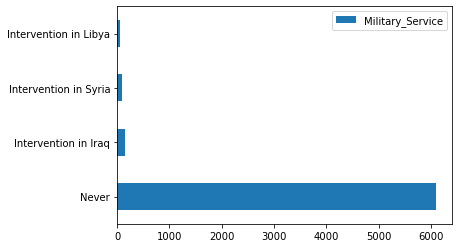

In [1996]:
training_dataset2['Military_Service'].value_counts().plot(kind='barh')
plt.legend()

### Area Residence

The variable "Area_Residence" is categorical, which means that we cannot plot the distribution, knowing that we proceed to do a value count to understand if the data was too sparse from each other. 

In [1997]:
training_dataset2['Area_Residence'].value_counts() 

City            5509
Country-side     891
Name: Area_Residence, dtype: int64

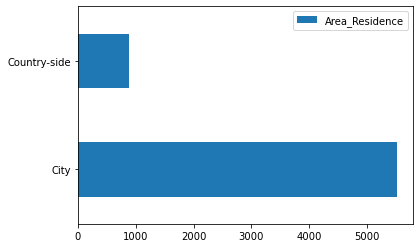

In [1998]:
training_dataset2['Area_Residence'].value_counts().plot(kind='barh')
plt.legend()

### Social Person

The variable "Social_Person" is categorical, which means that we cannot plot the distribution, knowing that we proceed to do a value count to understand if the data was too sparse from each other. 

In [1999]:
training_dataset2['Social_Person'].value_counts() 

No     4173
Yes    2227
Name: Social_Person, dtype: int64

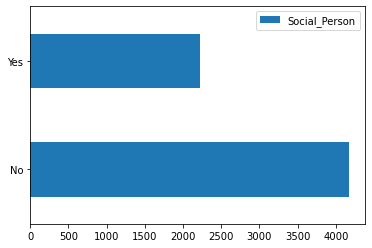

In [2000]:
training_dataset2['Social_Person'].value_counts().plot(kind='barh')
plt.legend()

### Political Participation

The variable "Political_Participation" is categorical, which means that we cannot plot the distribution, knowing that we proceed to do a value count to understand if the data was too sparse from each other. 

In [2001]:
training_dataset2['Political_Participation'].value_counts() 

No involvement        2605
Unknown               1970
Some involvement      1041
Strong involvement     784
Name: Political_Participation, dtype: int64

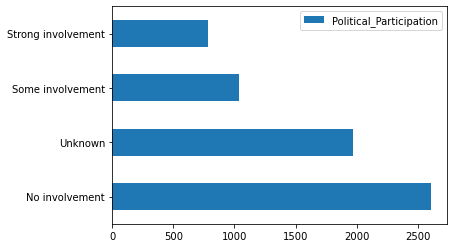

In [2002]:
training_dataset2['Political_Participation'].value_counts().plot(kind='barh')
plt.legend()

### Occupation

The variable "Occupation" is categorical, which means that we cannot plot the distribution, knowing that we proceed to do a value count to understand if the data was too sparse from each other. 

In [2003]:
training_dataset2['Occupation'].value_counts() 

Private company    4448
Government          542
Self-employed       498
Public company      487
Student             231
Nothing             194
Name: Occupation, dtype: int64

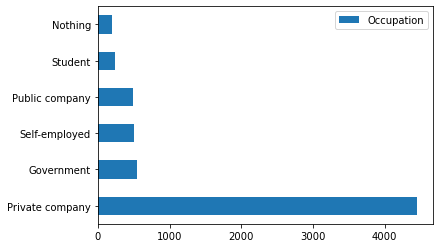

In [2004]:
training_dataset2['Occupation'].value_counts().plot(kind='barh')
plt.legend()

### Frequent Traveler

The variable "Frequent_Traveler" is categorical, which means that we cannot plot the distribution, knowing that we proceed to do a value count to understand if the data was too sparse from each other. 

In [2005]:
training_dataset2['Frequent_Traveler'].value_counts() 

Yes    3981
No     2419
Name: Frequent_Traveler, dtype: int64

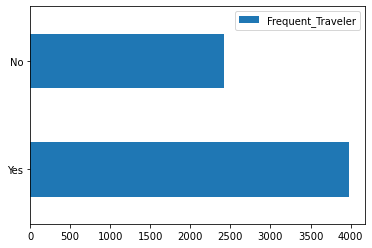

In [2006]:
training_dataset2['Frequent_Traveler'].value_counts().plot(kind='barh')
plt.legend()

### Foreign Citizenship

The variable "Foreign_Citizenship" is categorical, which means that we cannot plot the distribution, knowing that we proceed to do a value count to understand if the data was too sparse from each other. 

In [2007]:
training_dataset2['Foreign_Citizenship'].value_counts() 

Yes    3782
No     2618
Name: Foreign_Citizenship, dtype: int64

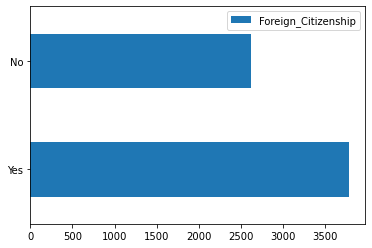

In [2008]:
training_dataset2['Foreign_Citizenship'].value_counts().plot(kind='barh')
plt.legend()

### Gender

The variable "Gender" is categorical, which means that we cannot plot the distribution, knowing that we proceed to do a value count to understand if the data was too sparse from each other. 

In [2009]:
training_dataset2['Gender'].value_counts() 

Male      3521
Female    2879
Name: Gender, dtype: int64

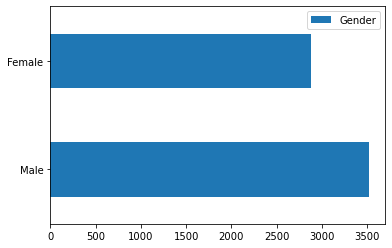

In [2010]:
training_dataset2['Gender'].value_counts().plot(kind='barh')
plt.legend()

### Cellphone Usage

The variable "Cellphone_Usage" is categorical, which means that we cannot plot the distribution, knowing that we proceed to do a value count to understand if the data was too sparse from each other. 

In [2011]:
training_dataset2['Cellphone_Usage'].value_counts() 

Low        3832
Average    1594
High        974
Name: Cellphone_Usage, dtype: int64

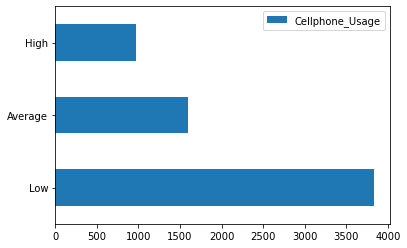

In [2012]:
training_dataset2['Cellphone_Usage'].value_counts().plot(kind='barh')
plt.legend()

## Numerical Variables

### Household Size

Boxplot

<AxesSubplot:xlabel='Household_Size'>

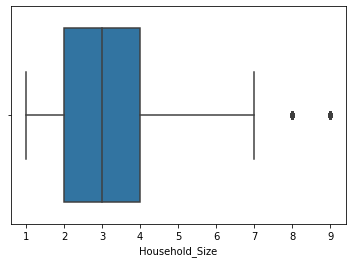

In [2013]:
sns.boxplot(x='Household_Size', data = training_dataset2) 

By looking at the boxplot, we can see that the variable Household_Size seems to have some outliers.

In [2014]:
#Lets see from which value we can consider a data point as an outlier (upper outlier) by calculating the IQR
q3 = training_dataset2.Household_Size.quantile(0.75)
q1 = training_dataset2.Household_Size.quantile(0.25)
IQR = q3 - q1
upper_outlier = q3 + (IQR*1.5)
upper_outlier

7.0

In [2015]:
#All the values above 7 will be considered as outliers

In [2016]:
size_drop =  training_dataset2[training_dataset2['Household_Size'] > upper_outlier].shape[0]
print('According to the IQR method, there are ' + str(size_drop)+ ' rows that are outliers for the "Household_Size" variable')

According to the IQR method, there are 74 rows that are outliers for the "Household_Size" variable


In [2017]:
#Given that our dataset has 6400, by deleting this 74 rows, we would be deleting less than 3% of the data. But we will avoid delete data. Let's look at the histogram for more insights. 

Histogram

<AxesSubplot:>

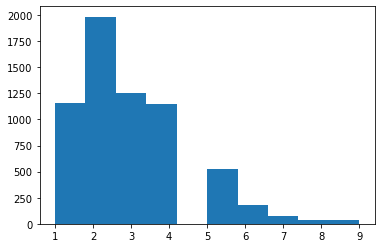

In [2018]:
training_dataset2['Household_Size'].hist(grid=False)

The histogram show us some skewness (right-skewed). Let's check the skew and kurtosis value


In [2019]:
training_dataset2['Household_Size'].agg(['skew', 'kurtosis']).transpose()

skew        0.986408
kurtosis    1.203282
Name: Household_Size, dtype: float64

We can conclude by looking at the skew value that the variable has a positive skew (skew>0). By looking at the histogram we can see that the distribution has a tail to the right. 
Regarding the kurtosis value, given that is lower than 3, we are dealing with a leptokurtic distribution.

<AxesSubplot:xlabel='Household_Size_Log'>

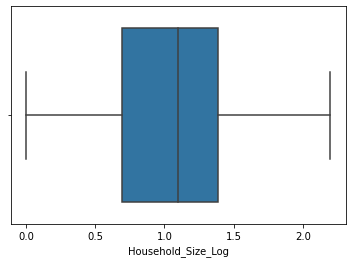

In [2021]:
#To correct the skewness of the variable we will apply the log transformation to the variable Household_Size
training_dataset_normalized['Household_Size_Log'] = np.log(training_dataset2['Household_Size'])
#Boxplot of Household_Size_log
sns.boxplot(x='Household_Size_Log', data = training_dataset_normalized) 

Once Normalized, It doesn't seem to have any outliers

### Satisfaction Level

Boxplot

<AxesSubplot:xlabel='Satisfaction_Level'>

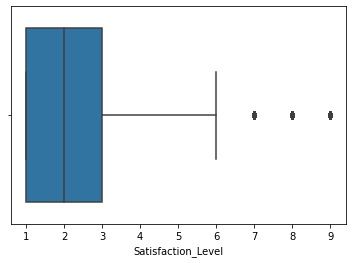

In [2022]:
sns.boxplot(x='Satisfaction_Level', data = training_dataset2)

By looking at the boxplot, we can see that the variable Satisfaction_Level seems to have some outliers. But, this variable is a scale from 1 to 9 therefore, we cannot consider this extreme values as outliers.

In [2023]:
training_dataset2['Satisfaction_Level'].value_counts()

2.0    2095
1.0    1818
3.0     933
4.0     743
5.0     419
6.0     146
7.0     100
9.0      78
8.0      68
Name: Satisfaction_Level, dtype: int64

<AxesSubplot:>

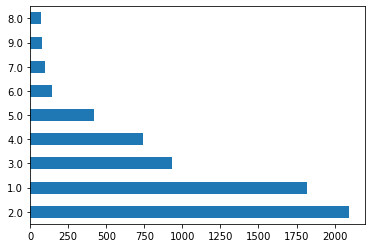

In [2024]:
training_dataset2['Satisfaction_Level'].value_counts().plot(kind='barh')

<AxesSubplot:xlabel='Satisfaction_Level_Log'>

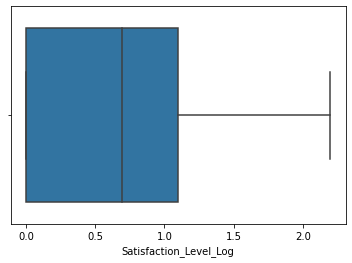

In [2025]:
#Apply the log transformation to the variable Satisfaction_Level (in order to have all the numerical variables normalized)
training_dataset_normalized['Satisfaction_Level_Log'] = np.log(training_dataset2['Satisfaction_Level'])
#Boxplot of Age_log
sns.boxplot(x='Satisfaction_Level_Log', data = training_dataset_normalized) 

### Age

Boxplot

<AxesSubplot:xlabel='Age'>

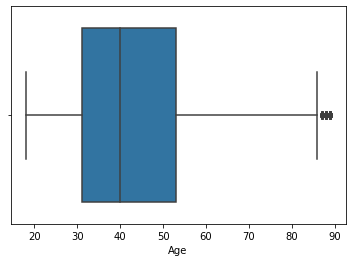

In [2026]:
sns.boxplot(x='Age', data = training_dataset2) 

By looking at the boxplot, the variable Age seems to have some outliers.

In [2027]:
#Lets see from which value we can consider a data point as an outlier (upper outlier) by calculating the IQR
q3 = training_dataset2.Age.quantile(0.75)
q1 = training_dataset2.Age.quantile(0.25)
IQR = q3 - q1
upper_outlier = q3 + (IQR*1.5)
upper_outlier

86.0

In [2028]:
#All the values above 86 will be considered as outliers

In [2029]:
size_drop =  training_dataset2[training_dataset2['Age'] > upper_outlier].shape[0]
print('According to the IQR method, there are ' + str(size_drop)+ ' rows that are outliers for the "Age" variable')

According to the IQR method, there are 80 rows that are outliers for the "Age" variable


In [2030]:
#Given that our dataset has 6400, by deleting this 80 rows, we would be deleting less than 3% of the data. But we will avoid delete data. Let's look at the histogram for more insights. 

Histogram

<AxesSubplot:>

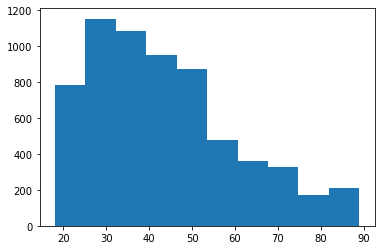

In [2031]:
training_dataset2['Age'].hist(grid=False)

By checking the histogram we can see that there are not extreme values, but we also see that the distribution is slightly right-skewed. Let us calculate the skewness:

In [2032]:
training_dataset2['Age'].agg(['skew', 'kurtosis']).transpose()

skew        0.691057
kurtosis   -0.164661
Name: Age, dtype: float64

We can conclude by looking at the skew value that the variable has a positive skew (skew>0). By looking at the histogram we can see that the distribution has a tail to the right. 
Regarding the kurtosis value, given that is lower than 3, we are dealing with a leptokurtic distribution.

<AxesSubplot:xlabel='Age_Log'>

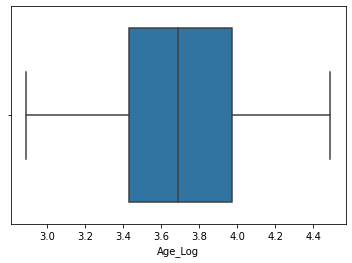

In [2034]:
#To correct the skewness of the variable we will apply the log transformation to the variable Age
training_dataset_normalized['Age_Log'] = np.log(training_dataset2['Age'])
#Boxplot of Age_log
sns.boxplot(x='Age_Log', data = training_dataset_normalized) 

Once normalised, it doesn't seem to have any outliers

### Household Income

Boxplot

<AxesSubplot:xlabel='Household_Income'>

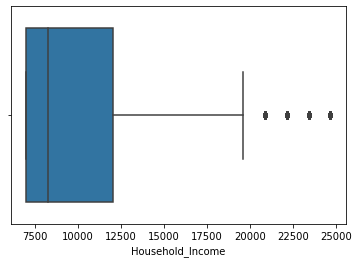

In [2035]:
sns.boxplot(x='Household_Income', data = training_dataset2) 

By looking at the boxplot, the variable Household_Income seems to have some outliers.

In [2036]:
#Lets see from which value we can consider a data point as an outlier (upper outlier) by calculating the IQR
q3 = training_dataset2.Household_Income.quantile(0.75)
q1 = training_dataset2.Household_Income.quantile(0.25)
IQR = q3 - q1
upper_outlier = q3 + (IQR*1.5)
upper_outlier

19610.0

In [2037]:
#All the values above 19610 will be considered as outliers

In [2038]:
size_drop =  training_dataset2[training_dataset2['Household_Income'] > upper_outlier].shape[0]
print('According to the IQR method, there are ' + str(size_drop)+ ' rows that are outliers for the "Household_Income" variable')

According to the IQR method, there are 154 rows that are outliers for the "Household_Income" variable


In [2039]:
#Given that our dataset has 6400, by deleting this 154 rows, we would be deleting less than 3% of the data. But we will avoid delete data. Let's look at the histogram for more insights. 

Histogram

<AxesSubplot:>

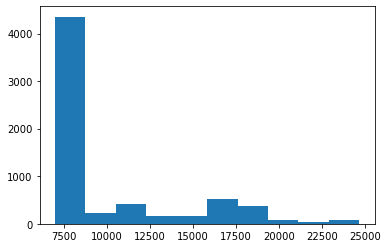

In [2040]:
training_dataset2['Household_Income'].hist(grid=False)

The histogram show us some skewness right-skewed. Let's check the skew and kurtosis value

In [2041]:
training_dataset2['Household_Income'].agg(['skew', 'kurtosis']).transpose()

skew        1.456286
kurtosis    0.977094
Name: Household_Income, dtype: float64

We can conclude by looking at the skew value that the variable has a positive skew (skew>0). By looking at the histogram we can see that the distribution has a tail to the right. 
Regarding the kurtosis value, given that is lower than 3, we are dealing with a leptokurtic distribution.

<AxesSubplot:xlabel='Household_Income_Log'>

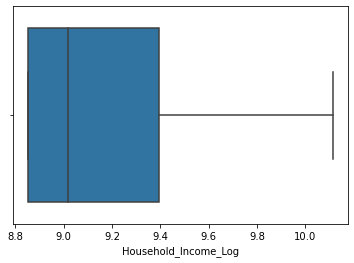

In [2043]:
#To correct the skewness of the variable we will apply the log transformation to the variable Household Income
training_dataset_normalized['Household_Income_Log'] = np.log(training_dataset2['Household_Income'])
#Boxplot of Household_Income_log
sns.boxplot(x='Household_Income_Log', data = training_dataset_normalized) 

Once Normalized, It doesn't seem to have any outliers

In [2044]:
training_dataset_normalized.head(10)

Gender  Age Cellphone_Usage  Household_Income  \
ID_ORIGINAL                                                  
465080         Male   70         Average             17088   
462698       Female   56         Average              8261   
465477         Male   31             Low              8261   
459236       Female   86            High              7000   
464465       Female   37         Average              7000   
463943         Male   71             Low              8261   
463321         Male   22             Low              8261   
467753       Female   69            High              7000   
462379       Female   60         Average              8261   
465050         Male   74            High              8261   

             Satisfaction_Level  Household_Size Foreign_Citizenship  \
ID_ORIGINAL                                                           
465080                      4.0             2.0                 Yes   
462698                      3.0             2.0                 Yes   
465477                      2.0             3.0                  No   
459236                      5.0             2.0                 Yes   
464465                      1.0             6.0                 Yes   
463943                      4.0             2.0                  No   
463321                      1.0             3.0                  No   
467753                      4.0             2.0                 Yes   
462379                      2.0             3.0                 Yes   
465050                      4.0             2.0                 Yes   

            Frequent_Traveler       Occupation Political_Participation  \
ID_ORIGINAL                                                              
465080                    Yes    Self-employed          No involvement   
462698                    Yes  Private company      Strong involvement   
465477                     No  Private company        Some involvement   
459236                     No    Self-employed          No involvement   
464465                    Yes  Private company                 Unknown   
463943                    Yes  Private company      Strong involvement   
463321                     No  Private company        Some involvement   
467753                     No  Private company                 Unknown   
462379                    Yes  Private company                 Unknown   
465050                    Yes    Self-employed          No involvement   

            Social_Person Area_Residence       Military_Service  \
ID_ORIGINAL                                                       
465080                 No           City                  Never   
462698                 No           City                  Never   
465477                Yes           City                  Never   
459236                 No           City                  Never   
464465                Yes           City                  Never   
463943                 No           City                  Never   
463321                Yes           City  Intervention in Syria   
467753                 No           City                  Never   
462379                 No           City                  Never   
465050                 No           City                  Never   

             Household_Size_Log  Satisfaction_Level_Log   Age_Log  \
ID_ORIGINAL                                                         
465080                 0.693147                1.386294  4.248495   
462698                 0.693147                1.098612  4.025352   
465477                 1.098612                0.693147  3.433987   
459236                 0.693147                1.609438  4.454347   
464465                 1.791759                0.000000  3.610918   
463943                 0.693147                1.386294  4.262680   
463321                 1.098612                0.000000  3.091042   
467753                 0.693147                1.386294  4.234107   
462379                 1.098612

In [2045]:
training_dataset_normalized.drop(columns=["Satisfaction_Level","Age","Household_Income","Household_Size"],axis=1,inplace=True)

# 3.5.2 Isolation Forest

To find some anomalies we will use the Isolation Forest.

In [2046]:
training_dataset_without_outliers= training_dataset2.copy()

### Variable Household_Income

This variable had the most extreme values and therefore it has a higher contamination

In [2047]:
#Applying the Isolation Forest for the variable "Household Income" with a contamination of 0.02
model_HI=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.02),max_features=1.0, random_state=42)
model_HI.fit(training_dataset_without_outliers[['Household_Income']])

training_dataset_without_outliers['scores']=model_HI.decision_function(training_dataset_without_outliers[['Household_Income']])
predicted_Household_Size = model_HI.predict(training_dataset_without_outliers[['Household_Income']])
training_dataset_without_outliers['anomaly']=predicted_Household_Size

training_dataset_without_outliers=training_dataset_without_outliers.loc[training_dataset_without_outliers['anomaly']!=-1]
training_dataset_without_outliers.drop('anomaly', axis=1, inplace=True)
training_dataset_without_outliers.drop('scores', axis=1, inplace=True)

print(f"For the variable Household_Income we deleted {training_dataset2.shape[0] - training_dataset_without_outliers.shape[0]} rows. Now the total of rows is {training_dataset_without_outliers.shape[0]}.")

For the variable Household_Income we deleted 115 rows. Now the total of rows is 6285.


In [2048]:
rows = training_dataset_without_outliers.shape[0]

### Variable Household_Size

This was the second variable with the most extreme values

In [2049]:
#Applying the Isolation Forest for the variable "Household Size" with a contamination of 0.01

model_HS=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.01),max_features=1.0, random_state=40)
model_HS.fit(training_dataset_without_outliers[['Household_Size']])

training_dataset_without_outliers['scores']=model_HS.decision_function(training_dataset_without_outliers[['Household_Size']])
predicted_Household_size = model_HS.predict(training_dataset_without_outliers[['Household_Size']])
training_dataset_without_outliers['anomaly']=predicted_Household_size

training_dataset_without_outliers=training_dataset_without_outliers.loc[training_dataset_without_outliers['anomaly']!=-1]
training_dataset_without_outliers.drop('anomaly', axis=1, inplace=True)
training_dataset_without_outliers.drop('scores', axis=1, inplace=True)

print(f"For the variable Household_Size we deleted {rows - training_dataset_without_outliers.shape[0]} rows. Now the total of rows is {training_dataset_without_outliers.shape[0]}.")

For the variable Household_Size we deleted 36 rows. Now the total of rows is 6249.


In [2050]:
rows = training_dataset_without_outliers.shape[0]

### Variable Age

This variable hadn't extreme values. However, with the Isolation Forest we apply a more strict approach to outliers.

In [2051]:
#Applying the Isolation Forest for the variable "Age" with a contamination of 0.005

model_A=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.005),max_features=1.0,random_state=43)
model_A.fit(training_dataset_without_outliers[['Age']])

training_dataset_without_outliers['scores']=model_A.decision_function(training_dataset_without_outliers[['Age']])
predicted_Age=model_A.predict(training_dataset_without_outliers[['Age']])
training_dataset_without_outliers['anomaly']=predicted_Age

training_dataset_without_outliers=training_dataset_without_outliers.loc[training_dataset_without_outliers['anomaly']!=-1]
training_dataset_without_outliers.drop('anomaly', axis=1, inplace=True)
training_dataset_without_outliers.drop('scores', axis=1, inplace=True)


print(f"For the variable Age we deleted {rows - training_dataset_without_outliers.shape[0]} rows. Now the total of rows is {training_dataset_without_outliers.shape[0]}.")

For the variable Age we deleted 30 rows. Now the total of rows is 6219.


### New Statistics

In [2052]:
all_deleted_rows = training_dataset2.shape[0] - training_dataset_without_outliers.shape[0]
original_rows = training_dataset2.shape[0]
percentage = round((all_deleted_rows/original_rows)*100, 3)
print('we deleted ' + str(percentage) + '% of all observations.')

we deleted 2.828% of all observations.


For the Models we have to try three different approaches:<br>
-No outliers treatment (training_dataset2) <br>
-The variables normalized (training_dataset_normalized)<br>
-With the Isolation Forest (training_dataset_without_outliers) <br>
Depending on the score we will choose the best path

In [2053]:
training_dataset2.describe()

Age  Household_Income  Satisfaction_Level  Household_Size
count  6400.000000       6400.000000         6400.000000     6400.000000
mean     43.612500      10004.135469            2.608750        2.869531
std      16.798489       4204.734354            1.687785        1.524200
min      18.000000       7000.000000            1.000000        1.000000
25%      31.000000       7000.000000            1.000000        2.000000
50%      40.000000       8261.000000            2.000000        3.000000
75%      53.000000      12044.000000            3.000000        4.000000
max      89.000000      24654.000000            9.000000        9.000000

In [2054]:
training_dataset_normalized.describe()

Household_Size_Log  Satisfaction_Level_Log      Age_Log  \
count         6400.000000             6400.000000  6400.000000   
mean             0.910078                0.773515     3.701782   
std              0.551733                0.604015     0.386572   
min              0.000000                0.000000     2.890372   
25%              0.693147                0.000000     3.433987   
50%              1.098612                0.693147     3.688879   
75%              1.386294                1.098612     3.970292   
max              2.197225                2.197225     4.488636   

       Household_Income_Log  
count           6400.000000  
mean               9.140845  
std                0.352777  
min                8.853665  
25%                8.853665  
50%                9.019301  
75%                9.396322  
max               10.112694

In [2055]:
training_dataset_without_outliers.describe()

Age  Household_Income  Satisfaction_Level  Household_Size
count  6219.000000       6219.000000         6219.000000     6219.000000
mean     43.565847       9765.116096            2.604438        2.846760
std      16.596026       3831.957700            1.676897        1.454077
min      18.000000       7000.000000            1.000000        1.000000
25%      31.000000       7000.000000            1.000000        2.000000
50%      41.000000       8261.000000            2.000000        3.000000
75%      53.000000      10783.000000            3.000000        4.000000
max      88.000000      20871.000000            9.000000        8.000000

# 3.6 Feature Engeneering - Dummy Variables

## 3.6.1 Training Dataset

### 3.6.1.1 Creating dummy variable on the training_dataset2

#### Gender, Foreign_Citizenship, Frequent_Traveler, Social_Person, Area_Residence - Dummy Encoding

In [2056]:
#Perform Dummy Encoding
training_dataset2=pd.get_dummies(training_dataset2, columns=['Gender', 'Foreign_Citizenship', 'Frequent_Traveler', 'Social_Person','Area_Residence'], drop_first = True)
training_dataset2

Age Cellphone_Usage  Household_Income  Satisfaction_Level  \
ID_ORIGINAL                                                              
465080        70         Average             17088                 4.0   
462698        56         Average              8261                 3.0   
465477        31             Low              8261                 2.0   
459236        86            High              7000                 5.0   
464465        37         Average              7000                 1.0   
...          ...             ...               ...                 ...   
465964        47             Low              9522                 5.0   
459670        39         Average             15827                 2.0   
461580        38             Low             15827                 1.0   
465987        20             Low              8261                 1.0   
463381        36         Average             17088                 1.0   

             Household_Size       Occupation Political_Participation  \
ID_ORIGINAL                                                            
465080                  2.0    Self-employed          No involvement   
462698                  2.0  Private company      Strong involvement   
465477                  3.0  Private company        Some involvement   
459236                  2.0    Self-employed          No involvement   
464465                  6.0  Private company                 Unknown   
...                     ...              ...                     ...   
465964                  1.0          Student          No involvement   
459670                  2.0  Private company      Strong involvement   
461580                  7.0  Private company                 Unknown   
465987                  3.0  Private company        Some involvement   
463381                  4.0       Government          No involvement   

            Military_Service  Gender_Male  Foreign_Citizenship_Yes  \
ID_ORIGINAL                                                          
465080                 Never            1                        1   
462698                 Never            0                        1   
465477                 Never            1                        0   
459236                 Never            0                        1   
464465                 Never            0                        1   
...                      ...          ...                      ...   
465964                 Never            0                        1   
459670                 Never            0                        1   
461580                 Never            0                        0   
465987                 Never            1                        0   
463381                 Never            1                        1   

             Frequent_Traveler_Yes  Social_Person_Yes  \
ID_ORIGINAL                                             
465080                           1                  0   
462698                           1                  0   
465477                           0                  1   
459236                           0                  0   
464465                           1                  1   
...                            ...                ...   
465964                           0                  0   
459670                           1                  0   
461580                           1                  1   
465987                           0                  1   
463381                           1                  1   

             Area_Residence_Country-side  
ID_ORIGINAL                               
465080                                 0  
462698                                 0  
465477                                 0  
459236                                 0  
464465                                 0  
...                                  ...  
465964                                 0  
459670                                 0  
461580                        

##### Military Service and Occupation - One-hot Encoding

In [2057]:
#Perform One-hot Encoding
training_dataset2=pd.get_dummies(training_dataset2, columns=['Military_Service','Occupation'])
training_dataset2

Age Cellphone_Usage  Household_Income  Satisfaction_Level  \
ID_ORIGINAL                                                              
465080        70         Average             17088                 4.0   
462698        56         Average              8261                 3.0   
465477        31             Low              8261                 2.0   
459236        86            High              7000                 5.0   
464465        37         Average              7000                 1.0   
...          ...             ...               ...                 ...   
465964        47             Low              9522                 5.0   
459670        39         Average             15827                 2.0   
461580        38             Low             15827                 1.0   
465987        20             Low              8261                 1.0   
463381        36         Average             17088                 1.0   

             Household_Size Political_Participation  Gender_Male  \
ID_ORIGINAL                                                        
465080                  2.0          No involvement            1   
462698                  2.0      Strong involvement            0   
465477                  3.0        Some involvement            1   
459236                  2.0          No involvement            0   
464465                  6.0                 Unknown            0   
...                     ...                     ...          ...   
465964                  1.0          No involvement            0   
459670                  2.0      Strong involvement            0   
461580                  7.0                 Unknown            0   
465987                  3.0        Some involvement            1   
463381                  4.0          No involvement            1   

             Foreign_Citizenship_Yes  Frequent_Traveler_Yes  \
ID_ORIGINAL                                                   
465080                             1                      1   
462698                             1                      1   
465477                             0                      0   
459236                             1                      0   
464465                             1                      1   
...                              ...                    ...   
465964                             1                      0   
459670                             1                      1   
461580                             0                      1   
465987                             0                      0   
463381                             1                      1   

             Social_Person_Yes  ...  Military_Service_Intervention in Iraq  \
ID_ORIGINAL                     ...                                          
465080                       0  ...                                      0   
462698                       0  ...                                      0   
465477                       1  ...                                      0   
459236                       0  ...                                      0   
464465                       1  ...                                      0   
...                        ...  ...                                    ...   
465964                       0  ...                                      0   
459670                       0  ...                                      0   
461580                       1  ...                                      0   
465987                       1  ...                                      0   
463381                       1  ...                                      0   

             Military_Service_Intervention in Libya  \
ID_ORIGINAL                                           
465080                                            0   
462698                                            0   
465477                                            0   
459236                                            0   


<AxesSubplot:>

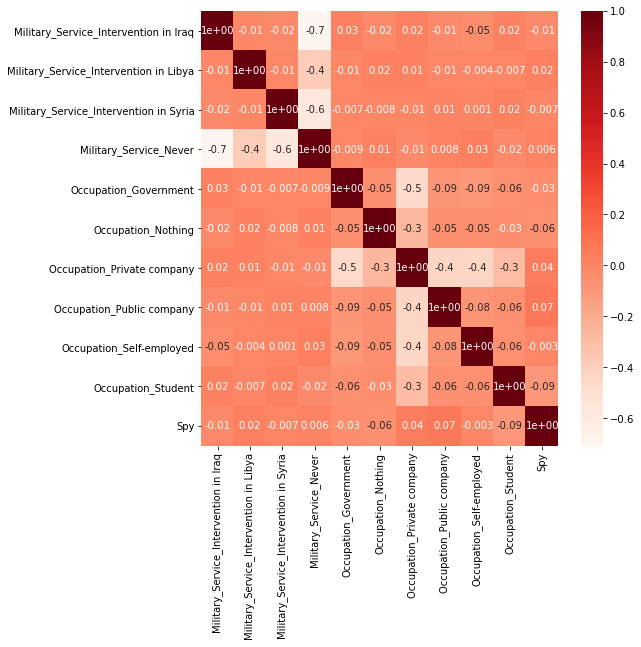

In [2058]:
#Get the correlation between all variables created with the target

merge = pd.merge(training_dataset2, training_target, left_index=True, right_index=True)

heat = merge[["Military_Service_Intervention in Iraq", "Military_Service_Intervention in Libya", "Military_Service_Intervention in Syria", "Military_Service_Never", "Occupation_Government", "Occupation_Nothing", "Occupation_Private company", "Occupation_Public company", "Occupation_Self-employed", "Occupation_Student", "Spy"]]

plt.figure(figsize=(8,8))
sns.heatmap(heat.corr(), annot=True, cmap = plt.cm.Reds, fmt='.1' )

In [2059]:
#Create an instance with all the variables from Occupation, before dropping any. So that we can use all of them when creating new variables
training_occupation = training_dataset2[["Occupation_Government", "Occupation_Nothing", "Occupation_Private company", "Occupation_Public company", "Occupation_Self-employed", "Occupation_Student"]]

In [2060]:
#Drop Column --> we can delete the column "Military_Service_Never" --> since it is the less correlated with the target
training_dataset2.drop('Military_Service_Never', axis=1, inplace=True)

#Drop Column --> we can delete the column "Occupation_Self-employed" --> since it is the less correlated with the target
training_dataset2.drop('Occupation_Self-employed', axis=1, inplace=True)

training_dataset2

Age Cellphone_Usage  Household_Income  Satisfaction_Level  \
ID_ORIGINAL                                                              
465080        70         Average             17088                 4.0   
462698        56         Average              8261                 3.0   
465477        31             Low              8261                 2.0   
459236        86            High              7000                 5.0   
464465        37         Average              7000                 1.0   
...          ...             ...               ...                 ...   
465964        47             Low              9522                 5.0   
459670        39         Average             15827                 2.0   
461580        38             Low             15827                 1.0   
465987        20             Low              8261                 1.0   
463381        36         Average             17088                 1.0   

             Household_Size Political_Participation  Gender_Male  \
ID_ORIGINAL                                                        
465080                  2.0          No involvement            1   
462698                  2.0      Strong involvement            0   
465477                  3.0        Some involvement            1   
459236                  2.0          No involvement            0   
464465                  6.0                 Unknown            0   
...                     ...                     ...          ...   
465964                  1.0          No involvement            0   
459670                  2.0      Strong involvement            0   
461580                  7.0                 Unknown            0   
465987                  3.0        Some involvement            1   
463381                  4.0          No involvement            1   

             Foreign_Citizenship_Yes  Frequent_Traveler_Yes  \
ID_ORIGINAL                                                   
465080                             1                      1   
462698                             1                      1   
465477                             0                      0   
459236                             1                      0   
464465                             1                      1   
...                              ...                    ...   
465964                             1                      0   
459670                             1                      1   
461580                             0                      1   
465987                             0                      0   
463381                             1                      1   

             Social_Person_Yes  Area_Residence_Country-side  \
ID_ORIGINAL                                                   
465080                       0                            0   
462698                       0                            0   
465477                       1                            0   
459236                       0                            0   
464465                       1                            0   
...                        ...                          ...   
465964                       0                            0   
459670                       0                            0   
461580                       1                            0   
465987                       1                            0   
463381                       1                            0   

             Military_Service_Intervention in Iraq  \
ID_ORIGINAL                                          
465080                                           0   
462698                                           0   
465477                                           0   
459236                                           0   
464465                                           0   
...                                            ...   
465964                                           0   
459670                                 

#### Cellphone_Usage - Label Encoding 

In [2061]:
#Create a dictionary with the values to be replaced: values to replace
replace_values = {"Low" : 1, "Average" : 2, "High" : 3 }

#Replace the values in the variable “Cellphone_Usage” according to the dict
training_dataset2 = training_dataset2.replace({"Cellphone_Usage": replace_values}) 

training_dataset2

Age  Cellphone_Usage  Household_Income  Satisfaction_Level  \
ID_ORIGINAL                                                               
465080        70                2             17088                 4.0   
462698        56                2              8261                 3.0   
465477        31                1              8261                 2.0   
459236        86                3              7000                 5.0   
464465        37                2              7000                 1.0   
...          ...              ...               ...                 ...   
465964        47                1              9522                 5.0   
459670        39                2             15827                 2.0   
461580        38                1             15827                 1.0   
465987        20                1              8261                 1.0   
463381        36                2             17088                 1.0   

             Household_Size Political_Participation  Gender_Male  \
ID_ORIGINAL                                                        
465080                  2.0          No involvement            1   
462698                  2.0      Strong involvement            0   
465477                  3.0        Some involvement            1   
459236                  2.0          No involvement            0   
464465                  6.0                 Unknown            0   
...                     ...                     ...          ...   
465964                  1.0          No involvement            0   
459670                  2.0      Strong involvement            0   
461580                  7.0                 Unknown            0   
465987                  3.0        Some involvement            1   
463381                  4.0          No involvement            1   

             Foreign_Citizenship_Yes  Frequent_Traveler_Yes  \
ID_ORIGINAL                                                   
465080                             1                      1   
462698                             1                      1   
465477                             0                      0   
459236                             1                      0   
464465                             1                      1   
...                              ...                    ...   
465964                             1                      0   
459670                             1                      1   
461580                             0                      1   
465987                             0                      0   
463381                             1                      1   

             Social_Person_Yes  Area_Residence_Country-side  \
ID_ORIGINAL                                                   
465080                       0                            0   
462698                       0                            0   
465477                       1                            0   
459236                       0                            0   
464465                       1                            0   
...                        ...                          ...   
465964                       0                            0   
459670                       0                            0   
461580                       1                            0   
465987                       1                            0   
463381                       1                            0   

             Military_Service_Intervention in Iraq  \
ID_ORIGINAL                                          
465080                                           0   
462698                                           0   
465477                                           0   
459236                                           0   
464465                                           0   
...                                            ...   
465964                                           0   
459670                    

#### Political_Participation - Creating a dataset where we used One-hot Encoding

In [2062]:
#Perform One-hot Encoding
training_dataset2_dummy=pd.get_dummies(training_dataset2, columns=['Political_Participation'])
training_dataset2_dummy

Age  Cellphone_Usage  Household_Income  Satisfaction_Level  \
ID_ORIGINAL                                                               
465080        70                2             17088                 4.0   
462698        56                2              8261                 3.0   
465477        31                1              8261                 2.0   
459236        86                3              7000                 5.0   
464465        37                2              7000                 1.0   
...          ...              ...               ...                 ...   
465964        47                1              9522                 5.0   
459670        39                2             15827                 2.0   
461580        38                1             15827                 1.0   
465987        20                1              8261                 1.0   
463381        36                2             17088                 1.0   

             Household_Size  Gender_Male  Foreign_Citizenship_Yes  \
ID_ORIGINAL                                                         
465080                  2.0            1                        1   
462698                  2.0            0                        1   
465477                  3.0            1                        0   
459236                  2.0            0                        1   
464465                  6.0            0                        1   
...                     ...          ...                      ...   
465964                  1.0            0                        1   
459670                  2.0            0                        1   
461580                  7.0            0                        0   
465987                  3.0            1                        0   
463381                  4.0            1                        1   

             Frequent_Traveler_Yes  Social_Person_Yes  \
ID_ORIGINAL                                             
465080                           1                  0   
462698                           1                  0   
465477                           0                  1   
459236                           0                  0   
464465                           1                  1   
...                            ...                ...   
465964                           0                  0   
459670                           1                  0   
461580                           1                  1   
465987                           0                  1   
463381                           1                  1   

             Area_Residence_Country-side  ...  \
ID_ORIGINAL                               ...   
465080                                 0  ...   
462698                                 0  ...   
465477                                 0  ...   
459236                                 0  ...   
464465                                 0  ...   
...                                  ...  ...   
465964                                 0  ...   
459670                                 0  ...   
461580                                 0  ...   
465987                                 0  ...   
463381                                 0  ...   

             Military_Service_Intervention in Syria  Occupation_Government  \
ID_ORIGINAL                                                                  
465080                                            0                      0   
462698                                            0                      0   
465477                                            0                      0   
459236                                            0                      0   
464465                                            0                      0   
...                                             ...                    ...   
465964                                            0                      0   
459670                                            0      

<AxesSubplot:>

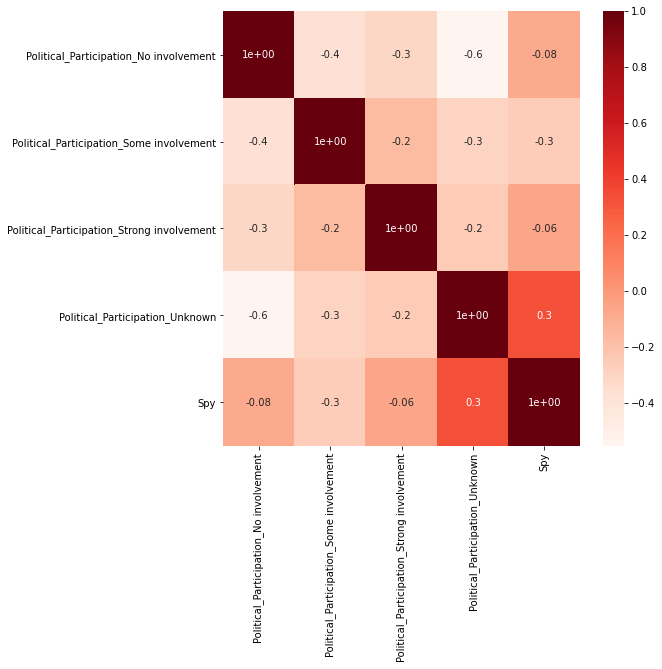

In [2063]:
#Get the correlation between all variables created with the target

merge = pd.merge(training_dataset2_dummy, training_target, left_index=True, right_index=True, how='outer')

heat = merge[["Political_Participation_No involvement", "Political_Participation_Some involvement", "Political_Participation_Strong involvement", "Political_Participation_Unknown","Spy"]]

plt.figure(figsize=(8,8))
sns.heatmap(heat.corr(), annot=True, cmap = plt.cm.Reds, fmt='.1' )

In [2064]:
#Drop Column --> we can delete the column "Political_Participation_Strong involvement" as it has the lowest correlation with the target
training_dataset2_dummy.drop('Political_Participation_Strong involvement', axis=1, inplace=True)
training_dataset2_dummy

Age  Cellphone_Usage  Household_Income  Satisfaction_Level  \
ID_ORIGINAL                                                               
465080        70                2             17088                 4.0   
462698        56                2              8261                 3.0   
465477        31                1              8261                 2.0   
459236        86                3              7000                 5.0   
464465        37                2              7000                 1.0   
...          ...              ...               ...                 ...   
465964        47                1              9522                 5.0   
459670        39                2             15827                 2.0   
461580        38                1             15827                 1.0   
465987        20                1              8261                 1.0   
463381        36                2             17088                 1.0   

             Household_Size  Gender_Male  Foreign_Citizenship_Yes  \
ID_ORIGINAL                                                         
465080                  2.0            1                        1   
462698                  2.0            0                        1   
465477                  3.0            1                        0   
459236                  2.0            0                        1   
464465                  6.0            0                        1   
...                     ...          ...                      ...   
465964                  1.0            0                        1   
459670                  2.0            0                        1   
461580                  7.0            0                        0   
465987                  3.0            1                        0   
463381                  4.0            1                        1   

             Frequent_Traveler_Yes  Social_Person_Yes  \
ID_ORIGINAL                                             
465080                           1                  0   
462698                           1                  0   
465477                           0                  1   
459236                           0                  0   
464465                           1                  1   
...                            ...                ...   
465964                           0                  0   
459670                           1                  0   
461580                           1                  1   
465987                           0                  1   
463381                           1                  1   

             Area_Residence_Country-side  ...  \
ID_ORIGINAL                               ...   
465080                                 0  ...   
462698                                 0  ...   
465477                                 0  ...   
459236                                 0  ...   
464465                                 0  ...   
...                                  ...  ...   
465964                                 0  ...   
459670                                 0  ...   
461580                                 0  ...   
465987                                 0  ...   
463381                                 0  ...   

             Military_Service_Intervention in Libya  \
ID_ORIGINAL                                           
465080                                            0   
462698                                            0   
465477                                            0   
459236                                            0   
464465                                            0   
...                                             ...   
465964                                            0   
459670                                            0   
461580                                            0   
465987                                            0   
463381                                            0   

             Military_Service_Intervention 

#### Political_Participation - Creating a dataset where we used Target Encoding

In [2065]:
#Perform Target Encoding
training_dataset2_spy= pd.merge(training_dataset2, training_target, left_index=True, right_index=True)
training_target2 = training_dataset2_spy['Spy']
tenc=ce.TargetEncoder() 
pol_part=tenc.fit_transform(training_dataset2['Political_Participation'],training_target2)

#Drop the variable with the categorical values and change it with the variable with new values
training_dataset2_enc = pol_part.join(training_dataset2.drop('Political_Participation',axis = 1))

In [2066]:
training_dataset2_enc

Political_Participation  Age  Cellphone_Usage  Household_Income  \
ID_ORIGINAL                                                                    
465080                      0.426871   70                2             17088   
462698                      0.395408   56                2              8261   
465477                      0.186359   31                1              8261   
459236                      0.426871   86                3              7000   
464465                      0.731472   37                2              7000   
...                              ...  ...              ...               ...   
465964                      0.426871   47                1              9522   
459670                      0.395408   39                2             15827   
461580                      0.731472   38                1             15827   
465987                      0.186359   20                1              8261   
463381                      0.426871   36                2             17088   

             Satisfaction_Level  Household_Size  Gender_Male  \
ID_ORIGINAL                                                    
465080                      4.0             2.0            1   
462698                      3.0             2.0            0   
465477                      2.0             3.0            1   
459236                      5.0             2.0            0   
464465                      1.0             6.0            0   
...                         ...             ...          ...   
465964                      5.0             1.0            0   
459670                      2.0             2.0            0   
461580                      1.0             7.0            0   
465987                      1.0             3.0            1   
463381                      1.0             4.0            1   

             Foreign_Citizenship_Yes  Frequent_Traveler_Yes  \
ID_ORIGINAL                                                   
465080                             1                      1   
462698                             1                      1   
465477                             0                      0   
459236                             1                      0   
464465                             1                      1   
...                              ...                    ...   
465964                             1                      0   
459670                             1                      1   
461580                             0                      1   
465987                             0                      0   
463381                             1                      1   

             Social_Person_Yes  Area_Residence_Country-side  \
ID_ORIGINAL                                                   
465080                       0                            0   
462698                       0                            0   
465477                       1                            0   
459236                       0                            0   
464465                       1                            0   
...                        ...                          ...   
465964                       0                            0   
459670                       0                            0   
461580                       1                            0   
465987                       1                            0   
463381                       1                            0   

             Military_Service_Intervention in Iraq  \
ID_ORIGINAL                                          
465080                                           0   
462698                                           0   
465477                                           0   
459236                                           0   
464465                                           0   
...                                            ...   
465964                                           0   
459670       

### 3.6.1.2 Creating dummy variable on the training_dataset_without_outliers

#### Gender, Foreign_Citizenship, Frequent_Traveler, Social_Person, Area_Residence - Dummy Encoding

In [2067]:
#Perform Dummy Encoding
training_dataset_without_outliers=pd.get_dummies(training_dataset_without_outliers, columns=['Gender', 'Foreign_Citizenship', 'Frequent_Traveler', 'Social_Person','Area_Residence'], drop_first = True)

##### Military Service and Occupation - One-hot Encoding

In [2068]:
#Perform One-hot Encoding
training_dataset_without_outliers=pd.get_dummies(training_dataset_without_outliers, columns=['Military_Service','Occupation'])

<AxesSubplot:>

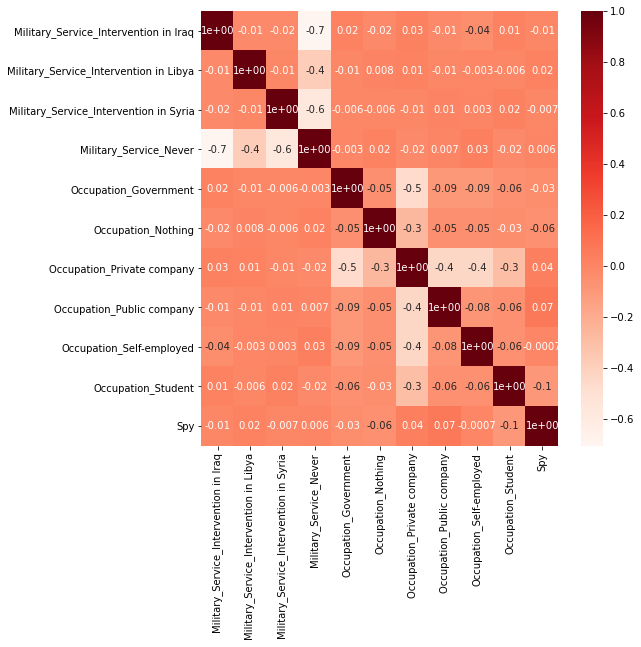

In [2069]:
#Get the correlation between all variables created with the target

merge = pd.merge(training_dataset_without_outliers, training_target, left_index=True, right_index=True, how='outer')

heat = merge[["Military_Service_Intervention in Iraq", "Military_Service_Intervention in Libya", "Military_Service_Intervention in Syria", "Military_Service_Never", "Occupation_Government", "Occupation_Nothing", "Occupation_Private company", "Occupation_Public company", "Occupation_Self-employed", "Occupation_Student", "Spy"]]

plt.figure(figsize=(8,8))
sns.heatmap(heat.corr(), annot=True, cmap = plt.cm.Reds, fmt='.1' )

In [2070]:
#Drop Column --> we can delete the column "Military_Service_Never" --> since it is the less correlated with the target
training_dataset_without_outliers.drop('Military_Service_Never', axis=1, inplace=True)

#Drop Column --> we can delete the column "Occupation_Self-employed" --> since it is the less correlated with the target
training_dataset_without_outliers.drop('Occupation_Self-employed', axis=1, inplace=True)

#### Cellphone_Usage - Label Encoding 

In [2071]:
#Create a dictionary with the values to be replaced: values to replace
replace_values = {"Low" : 1, "Average" : 2, "High" : 3 }

#Replace the values in the variable “Cellphone_Usage” according to the dictionary
training_dataset_without_outliers = training_dataset_without_outliers.replace({"Cellphone_Usage": replace_values}) 

#### Political_Participation - Creating a dataset where we used One-hot Encoding

In [2072]:
#Perform One-hot Encoding
training_dataset_without_outliers_dummy=pd.get_dummies(training_dataset_without_outliers, columns=['Political_Participation'])

<AxesSubplot:>

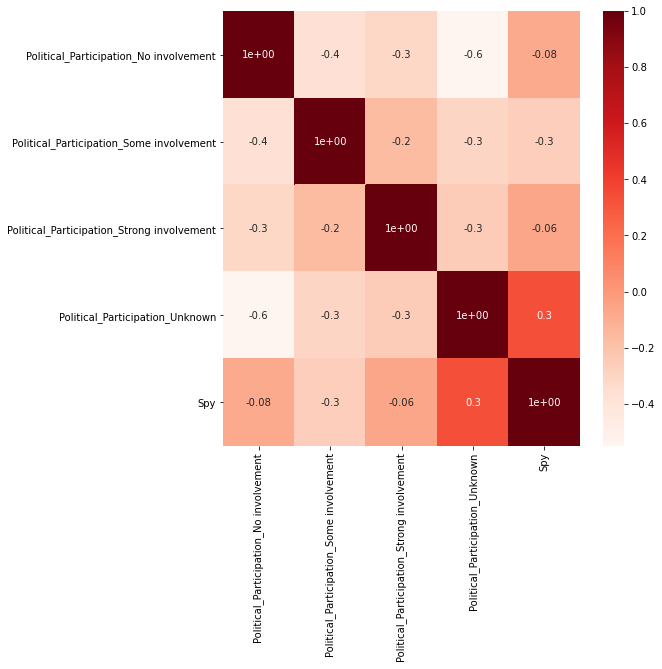

In [2073]:
#Get the correlation between all variables created with the target

merge = pd.merge(training_dataset_without_outliers_dummy, training_target, left_index=True, right_index=True, how='outer')

heat = merge[["Political_Participation_No involvement", "Political_Participation_Some involvement", "Political_Participation_Strong involvement", "Political_Participation_Unknown","Spy"]]

plt.figure(figsize=(8,8))
sns.heatmap(heat.corr(), annot=True, cmap = plt.cm.Reds, fmt='.1' )

In [2074]:
#Drop Column --> we can delete the column "Political_Participation_Strong involvement" as it has the lowest correlation with the target
training_dataset_without_outliers_dummy.drop('Political_Participation_Strong involvement', axis=1, inplace=True)

#### Political_Participation - Creating a dataset where we used Target Encoding

In [2075]:
#Perform Target Encoding
training_dataset_without_outliers_spy= pd.merge(training_dataset_without_outliers, training_target, left_index=True, right_index=True)
training_target2 = training_dataset_without_outliers_spy['Spy']
pol_part=tenc.fit_transform(training_dataset_without_outliers['Political_Participation'],training_target2)

#Drop the variable with the categorical values and change it with the variable with new values
training_dataset_without_outliers_enc = pol_part.join(training_dataset_without_outliers.drop('Political_Participation',axis = 1))

## 3.6.2 Validation Dataset

#### Gender, Foreign_Citizenship, Frequent_Traveler, Social_Person, Area_Residence - Dummy Encoding

In [2076]:
#Perform Dummy Encoding
validation_dataset2=pd.get_dummies(validation_dataset2, columns=['Gender', 'Foreign_Citizenship', 'Frequent_Traveler', 'Social_Person','Area_Residence'], drop_first = True)

##### Military Service and Occupation - One-hot Encoding

In [2077]:
#Perform One-hot Encoding
validation_dataset2=pd.get_dummies(validation_dataset2, columns=['Military_Service','Occupation'])

In [2078]:
#Create an instance with all the variables from Occupation, before dropping any. So that we can use all of them when creating new variables
validation_occupation = validation_dataset2[["Occupation_Government", "Occupation_Nothing", "Occupation_Private company", "Occupation_Public company", "Occupation_Self-employed", "Occupation_Student"]]

In [2079]:
#Drop Column --> to be consistent, we have to  delete the column "Military_Service_Never"
validation_dataset2.drop('Military_Service_Never', axis=1, inplace=True)

#Drop Column --> to be consistent, we have to  delete the column "Occupation_Self-employed"
validation_dataset2.drop('Occupation_Self-employed', axis=1, inplace=True)

#### Cellphone_Usage - Label Encoding 

In [2080]:
#Create a dictionary with the values to be replaced: values to replace
replace_values = {"Low" : 1, "Average" : 2, "High" : 3 }

#Replace the values in the variable “Cellphone_Usage” according to the dictionary
validation_dataset2 = validation_dataset2.replace({"Cellphone_Usage": replace_values}) 

#### Political_Participation - Creating a dataset where we used One-hot Encoding

In [2081]:
#Perform One-hot Encoding
validation_dataset2_dummy=pd.get_dummies(validation_dataset2, columns=['Political_Participation'])

In [2082]:
#Drop Column --> to be consistent, we have to  delete the column "Political_Participation_Strong involvement"
validation_dataset2_dummy.drop('Political_Participation_Strong involvement', axis=1, inplace=True)

#### Political_Participation - Creating a dataset where we used Target Encoding

In [2083]:
#Perform Target Encoding
pol_part=tenc.transform(validation_dataset2['Political_Participation'])

#Drop the variable with the categorical values and change it with the variable with new values
validation_dataset2_enc = pol_part.join(validation_dataset2.drop('Political_Participation',axis = 1))

# 3.7 Feature Engeneering - Data Transformation / New Variables

## 3.7.1 Training Dataset

### 3.7.1.1 Creating new variables on training_dataset2_dummy

In [2084]:
training_dataset2_dummy_var = training_dataset2_dummy.copy()

##### Creating variable Military_Service

In [2085]:
#creating a new variable containg information about whether a person did Military Service or not 
training_dataset2_dummy_var['Military_Service'] = training_dataset2_dummy_var['Military_Service_Intervention in Iraq'] +training_dataset2_dummy_var['Military_Service_Intervention in Libya'] + training_dataset2_dummy_var['Military_Service_Intervention in Syria']

##### Creating variable Public_Occupation

In [2086]:
# creating a variable containing information about whether a person is working in the public sector 
training_dataset2_dummy_var['Public_Occupation'] = training_dataset2_dummy_var['Occupation_Government'] + training_dataset2_dummy_var['Occupation_Public company']

##### Creating variable Employed

In [2087]:
# creating a variable containing information about whether a person is employed or not
train = pd.merge(training_dataset2_dummy_var, training_occupation["Occupation_Self-employed"], left_index=True, right_index=True)
training_dataset2_dummy_var['Employed'] = train['Occupation_Government'] + train['Occupation_Self-employed']+ train['Occupation_Private company']+ train['Occupation_Public company']

##### Creating variable Income_per_Person

In [2088]:
# creating a variable containing information about the income per person in one household
training_dataset2_dummy_var['Income_per_Person'] = round(training_dataset2_dummy_var['Household_Income'] / training_dataset2_dummy_var['Household_Size'], 0)

##### Creating variable: splitting the Age variable into different intervals

In [2090]:
training_dataset2_dummy_var.loc[(training_dataset2_dummy_var['Age'] <= 28) & (training_dataset2_dummy_var['Age'] >= 18), 'Young'] = 1
training_dataset2_dummy_var['Young'].fillna(value = 0, inplace = True)

training_dataset2_dummy_var.loc[(training_dataset2_dummy_var['Age'] <= 39) & (training_dataset2_dummy_var['Age'] >= 29), 'Young_Adult'] = 1
training_dataset2_dummy_var['Young_Adult'].fillna(value = 0, inplace = True)

training_dataset2_dummy_var.loc[(training_dataset2_dummy_var['Age'] <=50) & (training_dataset2_dummy_var['Age'] >= 40), 'Adult'] = 1
training_dataset2_dummy_var['Adult'].fillna(value = 0, inplace = True)

training_dataset2_dummy_var.loc[(training_dataset2_dummy_var['Age'] <=61) & (training_dataset2_dummy_var['Age'] >= 51), 'Adult_Senior'] = 1
training_dataset2_dummy_var['Adult_Senior'].fillna(value = 0, inplace = True)

training_dataset2_dummy_var.loc[(training_dataset2_dummy_var['Age'] <=72) & (training_dataset2_dummy_var['Age'] >= 62), 'Pre_Senior'] = 1
training_dataset2_dummy_var['Pre_Senior'].fillna(value = 0, inplace = True)

training_dataset2_dummy_var.loc[(training_dataset2_dummy_var['Age'] >= 73), 'Senior'] = 1
training_dataset2_dummy_var['Senior'].fillna(value = 0, inplace = True)

### 3.7.1.2 Creating new variables on training_dataset_without_outliers_dummy

In [2091]:
training_dataset_without_outliers_dummy_var = training_dataset_without_outliers_dummy.copy()

##### Creating variable Military_Service

In [2092]:
#creating a new variable containg information about whether a person did Military Service or not 
training_dataset_without_outliers_dummy_var['Military_Service'] = training_dataset_without_outliers_dummy_var['Military_Service_Intervention in Iraq'] +training_dataset_without_outliers_dummy_var['Military_Service_Intervention in Libya'] + training_dataset_without_outliers_dummy_var['Military_Service_Intervention in Syria']

##### Creating variable Public_Occupation

In [2093]:
# creating a variable containing information about whether a person is working in the public sector 
training_dataset_without_outliers_dummy_var['Public Occupation'] = training_dataset_without_outliers_dummy_var['Occupation_Government'] + training_dataset_without_outliers_dummy_var['Occupation_Public company']

##### Creating variable Employed

In [2094]:
# creating a variable containing information about whether a person is employed or not
train = pd.merge(training_dataset_without_outliers_dummy_var, training_occupation["Occupation_Self-employed"], left_index=True, right_index=True)
training_dataset_without_outliers_dummy_var['Employed'] = train['Occupation_Government'] + train['Occupation_Self-employed']+ train['Occupation_Private company']+ train['Occupation_Public company']

##### Creating variable Income_per_Person

In [2095]:
# creating a variable containing information about the income per person in one household
training_dataset_without_outliers_dummy_var['Income_per_Person'] = round(training_dataset_without_outliers_dummy['Household_Income'] / training_dataset_without_outliers_dummy['Household_Size'], 0)

##### Creating variables, splitting the Age variable into different intervals

In [2097]:
training_dataset_without_outliers_dummy_var.loc[(training_dataset_without_outliers_dummy_var['Age'] <= 28) & (training_dataset_without_outliers_dummy_var['Age'] >= 18), 'Young'] = 1
training_dataset_without_outliers_dummy_var['Young'].fillna(value = 0, inplace = True)

training_dataset_without_outliers_dummy_var.loc[(training_dataset_without_outliers_dummy_var['Age'] <= 39) & (training_dataset_without_outliers_dummy_var['Age'] >= 29), 'Young_Adult'] = 1
training_dataset_without_outliers_dummy_var['Young_Adult'].fillna(value = 0, inplace = True)

training_dataset_without_outliers_dummy_var.loc[(training_dataset_without_outliers_dummy_var['Age'] <=50) & (training_dataset_without_outliers_dummy_var['Age'] >= 40), 'Adult'] = 1
training_dataset_without_outliers_dummy_var['Adult'].fillna(value = 0, inplace = True)

training_dataset_without_outliers_dummy_var.loc[(training_dataset_without_outliers_dummy_var['Age'] <=61) & (training_dataset_without_outliers_dummy_var['Age'] >= 51), 'Adult_Senior'] = 1
training_dataset_without_outliers_dummy_var['Adult_Senior'].fillna(value = 0, inplace = True)

training_dataset_without_outliers_dummy_var.loc[(training_dataset_without_outliers_dummy_var['Age'] <=72) & (training_dataset_without_outliers_dummy_var['Age'] >= 62), 'Pre_Senior'] = 1
training_dataset_without_outliers_dummy_var['Pre_Senior'].fillna(value = 0, inplace = True)

training_dataset_without_outliers_dummy_var.loc[(training_dataset_without_outliers_dummy_var['Age'] >= 73), 'Senior'] = 1
training_dataset_without_outliers_dummy_var['Senior'].fillna(value = 0, inplace = True)

### 3.7.1.3 Creating new variables on training_dataset2_enc

In [2098]:
training_dataset2_enc_var = training_dataset2_enc.copy()

##### Creating variable Military_Service

In [2099]:
#creating a new variable containg information about whether a person did Military Service or not 
training_dataset2_enc_var['Military_Service'] = training_dataset2_enc_var['Military_Service_Intervention in Iraq'] +training_dataset2_enc_var['Military_Service_Intervention in Libya'] + training_dataset2_enc_var['Military_Service_Intervention in Syria']

##### Creating variable Public_Occupation

In [2100]:
# creating a variable containing information about whether a person is working in the public sector 
training_dataset2_enc_var['Public Occupation'] = training_dataset2_enc_var['Occupation_Government'] + training_dataset2_enc_var['Occupation_Public company']

##### Creating variable Employed

In [2101]:
# creating a variable containing information about whether a person is employed or not
train = pd.merge(training_dataset2_enc_var, training_occupation["Occupation_Self-employed"], left_index=True, right_index=True)
training_dataset2_enc_var['Employed'] = train['Occupation_Government'] + train['Occupation_Self-employed']+ train['Occupation_Private company']+ train['Occupation_Public company']

##### Creating variable Income_per_Person

In [2102]:
# creating a variable containing information about the income per person in one household
training_dataset2_enc_var['Income_per_Person'] = round(training_dataset2_enc_var['Household_Income'] / training_dataset2_enc_var['Household_Size'], 0)

##### Creating variables, splitting the Age variable into different intervals

In [2104]:
training_dataset2_enc_var.loc[(training_dataset2_enc_var['Age'] <= 28) & (training_dataset2_enc_var['Age'] >= 18), 'Young'] = 1
training_dataset2_enc_var['Young'].fillna(value = 0, inplace = True)

training_dataset2_enc_var.loc[(training_dataset2_enc_var['Age'] <= 39) & (training_dataset2_enc_var['Age'] >= 29), 'Young_Adult'] = 1
training_dataset2_enc_var['Young_Adult'].fillna(value = 0, inplace = True)

training_dataset2_enc_var.loc[(training_dataset2_enc_var['Age'] <=50) & (training_dataset2_enc_var['Age'] >= 40), 'Adult'] = 1
training_dataset2_enc_var['Adult'].fillna(value = 0, inplace = True)

training_dataset2_enc_var.loc[(training_dataset2_enc_var['Age'] <=61) & (training_dataset2_enc_var['Age'] >= 51), 'Adult_Senior'] = 1
training_dataset2_enc_var['Adult_Senior'].fillna(value = 0, inplace = True)

training_dataset2_enc_var.loc[(training_dataset2_enc_var['Age'] <=72) & (training_dataset2_enc_var['Age'] >= 62), 'Pre_Senior'] = 1
training_dataset2_enc_var['Pre_Senior'].fillna(value = 0, inplace = True)

training_dataset2_enc_var.loc[(training_dataset2_enc_var['Age'] >= 73), 'Senior'] = 1
training_dataset2_enc_var['Senior'].fillna(value = 0, inplace = True)

### 3.7.1.4 Creating new variables on training_dataset_without_outliers_enc

In [2105]:
training_dataset_without_outliers_enc_var = training_dataset_without_outliers_enc.copy()

##### Creating variable Military_Service

In [2106]:
#creating a new variable containg information about whether a person did Military Service or not 
training_dataset_without_outliers_enc_var['Military_Service'] = training_dataset_without_outliers_enc_var['Military_Service_Intervention in Iraq'] +training_dataset_without_outliers_enc_var['Military_Service_Intervention in Libya'] + training_dataset_without_outliers_enc_var['Military_Service_Intervention in Syria']

##### Creating variable Public_Occupation

In [2107]:
# creating a variable containing information about whether a person is working in the public sector 
training_dataset_without_outliers_enc_var['Public Occupation'] = training_dataset_without_outliers_enc_var['Occupation_Government'] + training_dataset_without_outliers_enc_var['Occupation_Public company']

##### Creating variable Employed

In [2108]:
# creating a variable containing information about whether a person is employed or not
train = pd.merge(training_dataset_without_outliers_enc_var, training_occupation["Occupation_Self-employed"], left_index=True, right_index=True)
training_dataset_without_outliers_enc_var['Employed'] = train['Occupation_Government'] + train['Occupation_Self-employed']+ train['Occupation_Private company']+ train['Occupation_Public company']

##### Creating variable Income_per_Person

In [2109]:
# creating a variable containing information about the income per person in one household
training_dataset_without_outliers_enc_var['Income_per_Person'] = round(training_dataset_without_outliers_enc_var['Household_Income'] / training_dataset_without_outliers_enc_var['Household_Size'], 0)

##### Creating variables, splitting the Age variable into different intervals

In [2111]:
training_dataset_without_outliers_enc_var.loc[(training_dataset_without_outliers_enc_var['Age'] <= 28) & (training_dataset_without_outliers_enc_var['Age'] >= 18), 'Young'] = 1
training_dataset_without_outliers_enc_var['Young'].fillna(value = 0, inplace = True)

training_dataset_without_outliers_enc_var.loc[(training_dataset_without_outliers_enc_var['Age'] <= 39) & (training_dataset_without_outliers_enc_var['Age'] >= 29), 'Young_Adult'] = 1
training_dataset_without_outliers_enc_var['Young_Adult'].fillna(value = 0, inplace = True)

training_dataset_without_outliers_enc_var.loc[(training_dataset_without_outliers_enc_var['Age'] <=50) & (training_dataset_without_outliers_enc_var['Age'] >= 40), 'Adult'] = 1
training_dataset_without_outliers_enc_var['Adult'].fillna(value = 0, inplace = True)

training_dataset_without_outliers_enc_var.loc[(training_dataset_without_outliers_enc_var['Age'] <=61) & (training_dataset_without_outliers_enc_var['Age'] >= 51), 'Adult_Senior'] = 1
training_dataset_without_outliers_enc_var['Adult_Senior'].fillna(value = 0, inplace = True)

training_dataset_without_outliers_enc_var.loc[(training_dataset_without_outliers_enc_var['Age'] <=72) & (training_dataset_without_outliers_enc_var['Age'] >= 62), 'Pre_Senior'] = 1
training_dataset_without_outliers_enc_var['Pre_Senior'].fillna(value = 0, inplace = True)

training_dataset_without_outliers_enc_var.loc[(training_dataset_without_outliers_enc_var['Age'] >= 73), 'Senior'] = 1
training_dataset_without_outliers_enc_var['Senior'].fillna(value = 0, inplace = True)

## 3.7.2 Validation Dataset

### 3.7.2.1 Creating new variables on validation_dataset2_dummy

In [2112]:
validation_dataset2_dummy_var = validation_dataset2_dummy.copy()

##### Creating variable Military_Service

In [2113]:
#creating a new variable containg information about whether a person did Military Service or not 
validation_dataset2_dummy_var['Military_Service'] = validation_dataset2_dummy_var['Military_Service_Intervention in Iraq'] +validation_dataset2_dummy_var['Military_Service_Intervention in Libya'] + validation_dataset2_dummy_var['Military_Service_Intervention in Syria']

##### Creating variable Public_Occupation

In [2114]:
# creating a variable containing information about whether a person is working in the public sector 
validation_dataset2_dummy_var['Public Occupation'] = validation_dataset2_dummy_var['Occupation_Government'] + validation_dataset2_dummy_var['Occupation_Public company']

##### Creating variable Employed

In [2115]:
# creating a variable containing information about whether a person is employed or not
train = pd.merge(validation_dataset2_dummy_var, validation_occupation["Occupation_Self-employed"], left_index=True, right_index=True)
validation_dataset2_dummy_var['Employed'] = train['Occupation_Government'] + train['Occupation_Self-employed']+ train['Occupation_Private company']+ train['Occupation_Public company']

##### Creating variable Income_per_Person

In [2116]:
# creating a variable containing information about the income per person in one household
validation_dataset2_dummy_var['Income_per_Person'] = round(validation_dataset2_dummy_var['Household_Income'] / validation_dataset2_dummy_var['Household_Size'], 0)

##### Creating variables, splitting the Age variable into different intervals

In [2118]:
validation_dataset2_dummy_var.loc[(validation_dataset2_dummy_var['Age'] <= 28) & (validation_dataset2_dummy_var['Age'] >= 18), 'Young'] = 1
validation_dataset2_dummy_var['Young'].fillna(value = 0, inplace = True)

validation_dataset2_dummy_var.loc[(validation_dataset2_dummy_var['Age'] <= 39) & (validation_dataset2_dummy_var['Age'] >= 29), 'Young_Adult'] = 1
validation_dataset2_dummy_var['Young_Adult'].fillna(value = 0, inplace = True)

validation_dataset2_dummy_var.loc[(validation_dataset2_dummy_var['Age'] <=50) & (validation_dataset2_dummy_var['Age'] >= 40), 'Adult'] = 1
validation_dataset2_dummy_var['Adult'].fillna(value = 0, inplace = True)

validation_dataset2_dummy_var.loc[(validation_dataset2_dummy_var['Age'] <=61) & (validation_dataset2_dummy_var['Age'] >= 51), 'Adult_Senior'] = 1
validation_dataset2_dummy_var['Adult_Senior'].fillna(value = 0, inplace = True)

validation_dataset2_dummy_var.loc[(validation_dataset2_dummy_var['Age'] <=72) & (validation_dataset2_dummy_var['Age'] >= 62), 'Pre_Senior'] = 1
validation_dataset2_dummy_var['Pre_Senior'].fillna(value = 0, inplace = True)

validation_dataset2_dummy_var.loc[(validation_dataset2_dummy_var['Age'] >= 73), 'Senior'] = 1
validation_dataset2_dummy_var['Senior'].fillna(value = 0, inplace = True)

### 3.7.2.2 Creating new variables on validation_dataset2_enc

In [2119]:
validation_dataset2_enc_var = validation_dataset2_enc.copy()

##### Creating variable Military_Service

In [2120]:
#creating a new variable containg information about whether a person did Military Service or not 
validation_dataset2_enc_var['Military_Service'] = validation_dataset2_enc_var['Military_Service_Intervention in Iraq'] +validation_dataset2_enc_var['Military_Service_Intervention in Libya'] + validation_dataset2_enc_var['Military_Service_Intervention in Syria']

##### Creating variable Public_Occupation

In [2121]:
# creating a variable containing information about whether a person is working in the public sector 
validation_dataset2_enc_var['Public Occupation'] = validation_dataset2_enc_var['Occupation_Government'] + validation_dataset2_enc_var['Occupation_Public company']

##### Creating variable Employed

In [2122]:
# creating a variable containing information about whether a person is employed or not
train = pd.merge(validation_dataset2_enc_var, validation_occupation["Occupation_Self-employed"], left_index=True, right_index=True)
validation_dataset2_enc_var['Employed'] = train['Occupation_Government'] + train['Occupation_Self-employed']+ train['Occupation_Private company']+ train['Occupation_Public company']

##### Creating variable Income_per_Person

In [2123]:
# creating a variable containing information about the income per person in one household
validation_dataset2_enc_var['Income_per_Person'] = round(validation_dataset2_enc_var['Household_Income'] / validation_dataset2_enc_var['Household_Size'], 0)

##### Creating variables, splitting the Age variable into different intervals

In [2125]:
validation_dataset2_enc_var.loc[(validation_dataset2_enc_var['Age'] <= 28) & (validation_dataset2_enc_var['Age'] >= 18), 'Young'] = 1
validation_dataset2_enc_var['Young'].fillna(value = 0, inplace = True)

validation_dataset2_enc_var.loc[(validation_dataset2_enc_var['Age'] <= 39) & (validation_dataset2_enc_var['Age'] >= 29), 'Young_Adult'] = 1
validation_dataset2_enc_var['Young_Adult'].fillna(value = 0, inplace = True)

validation_dataset2_enc_var.loc[(validation_dataset2_enc_var['Age'] <=50) & (validation_dataset2_enc_var['Age'] >= 40), 'Adult'] = 1
validation_dataset2_enc_var['Adult'].fillna(value = 0, inplace = True)

validation_dataset2_enc_var.loc[(validation_dataset2_enc_var['Age'] <=61) & (validation_dataset2_enc_var['Age'] >= 51), 'Adult_Senior'] = 1
validation_dataset2_enc_var['Adult_Senior'].fillna(value = 0, inplace = True)

validation_dataset2_enc_var.loc[(validation_dataset2_enc_var['Age'] <=72) & (validation_dataset2_enc_var['Age'] >= 62), 'Pre_Senior'] = 1
validation_dataset2_enc_var['Pre_Senior'].fillna(value = 0, inplace = True)

validation_dataset2_enc_var.loc[(validation_dataset2_enc_var['Age'] >= 73), 'Senior'] = 1
validation_dataset2_enc_var['Senior'].fillna(value = 0, inplace = True)

# 3.8 Feature Engeneering - Correlations

We are using the Spearman Correlation beacuse we are dealing with continuous and ordinal variables

In [2126]:
training_dataset2_dummy_var_spy = pd.merge(training_dataset2_dummy_var, training_target, left_index=True, right_index=True)
training_target_dummy_var = training_dataset2_dummy_var_spy['Spy']

training_dataset2_dummy_var_spy

Age  Cellphone_Usage  Household_Income  Satisfaction_Level  \
ID_ORIGINAL                                                               
465080        70                2             17088                 4.0   
462698        56                2              8261                 3.0   
465477        31                1              8261                 2.0   
459236        86                3              7000                 5.0   
464465        37                2              7000                 1.0   
...          ...              ...               ...                 ...   
465964        47                1              9522                 5.0   
459670        39                2             15827                 2.0   
461580        38                1             15827                 1.0   
465987        20                1              8261                 1.0   
463381        36                2             17088                 1.0   

             Household_Size  Gender_Male  Foreign_Citizenship_Yes  \
ID_ORIGINAL                                                         
465080                  2.0            1                        1   
462698                  2.0            0                        1   
465477                  3.0            1                        0   
459236                  2.0            0                        1   
464465                  6.0            0                        1   
...                     ...          ...                      ...   
465964                  1.0            0                        1   
459670                  2.0            0                        1   
461580                  7.0            0                        0   
465987                  3.0            1                        0   
463381                  4.0            1                        1   

             Frequent_Traveler_Yes  Social_Person_Yes  \
ID_ORIGINAL                                             
465080                           1                  0   
462698                           1                  0   
465477                           0                  1   
459236                           0                  0   
464465                           1                  1   
...                            ...                ...   
465964                           0                  0   
459670                           1                  0   
461580                           1                  1   
465987                           0                  1   
463381                           1                  1   

             Area_Residence_Country-side  ...  Public_Occupation  Employed  \
ID_ORIGINAL                               ...                                
465080                                 0  ...                  0         1   
462698                                 0  ...                  0         1   
465477                                 0  ...                  0         1   
459236                                 0  ...                  0         1   
464465                                 0  ...                  0         1   
...                                  ...  ...                ...       ...   
465964                                 0  ...                  0         0   
459670                                 0  ...                  0         1   
461580                                 0  ...                  0         1   
465987                                 0  ...                  0         1   
463381                                 0  ...                  1         1   

             Income_per_Person  Young  Young_Adult  Adult  Adult_Senior  \
ID_ORIGINAL                                                               
465080                  8544.0    0.0          0.0    0.0           0.0   
462698                  4130.0    0.0          0.0    0.0           1.0   
465477                  2754.0    0.0          1.0    0.0           0.0   
459236 

In [2127]:
#Using, for the correlation, the training dataset 2 merged with the target variable "Spy"
cor_spearman = training_dataset2_dummy_var_spy.corr(method ='spearman')
cor_spearman

Age  Cellphone_Usage  \
Age                                       1.000000         0.429981   
Cellphone_Usage                           0.429981         1.000000   
Household_Income                         -0.121930        -0.053120   
Satisfaction_Level                        0.672032         0.073392   
Household_Size                           -0.234715         0.143339   
Gender_Male                               0.027970         0.067096   
Foreign_Citizenship_Yes                   0.603813         0.660511   
Frequent_Traveler_Yes                     0.292560         0.123810   
Social_Person_Yes                        -0.194160        -0.081770   
Area_Residence_Country-side              -0.104926        -0.018803   
Military_Service_Intervention in Iraq    -0.045799        -0.018480   
Military_Service_Intervention in Libya    0.006100         0.012491   
Military_Service_Intervention in Syria   -0.023533         0.000517   
Occupation_Government                    -0.109358        -0.073130   
Occupation_Nothing                       -0.062857        -0.021132   
Occupation_Private company               -0.206778        -0.181749   
Occupation_Public company                 0.141968         0.296563   
Occupation_Student                       -0.089770        -0.078720   
Political_Participation_No involvement    0.182103         0.160433   
Political_Participation_Some involvement -0.489998        -0.283898   
Political_Participation_Unknown           0.189975         0.083253   
Military_Service                         -0.044512        -0.008066   
Public_Occupation                         0.019589         0.158638   
Employed                                  0.110529         0.073521   
Income_per_Person                         0.119634        -0.162411   
Young                                    -0.693796        -0.298456   
Young_Adult                              -0.346098        -0.142005   
Adult                                     0.161810         0.080593   
Adult_Senior                              0.385760         0.168828   
Pre_Senior                                0.410693         0.177566   
Senior                                    0.443399         0.155856   
Spy                                       0.354791         0.359951   

                                          Household_Income  \
Age                                              -0.121930   
Cellphone_Usage                                  -0.053120   
Household_Income                                  1.000000   
Satisfaction_Level                               -0.013595   
Household_Size                                   -0.069242   
Gender_Male                                      -0.034480   
Foreign_Citizenship_Yes                          -0.060710   
Frequent_Traveler_Yes                             0.055811   
Social_Person_Yes                                -0.030379   
Area_Residence_Country-side                      -0.034141   
Military_Service_Intervention in Iraq             0.002915   
Military_Service_Intervention in Libya           -0.000358   
Military_Service_Intervention in Syria           -0.025518   
Occupation_Government                            -0.003837   
Occupation_Nothing                                0.127669   
Occupation_Private company                        0.036855   
Occupation_Public company                        -0.017468   
Occupation_Student                               -0.020446   
Political_Participation_No involvement           -0.043109   
Political_Participation_Some involvement         -0.003199   
Political_Participation_Unknown                   0.030137   
Military_Service                                 -0.012956   
Public_Occupation                                -0.015518   
Employed                                         -0.072592   
Income_per_Person                                 0.528154   
Young                                             0.021785   
Young_Adult                  

<AxesSubplot:>

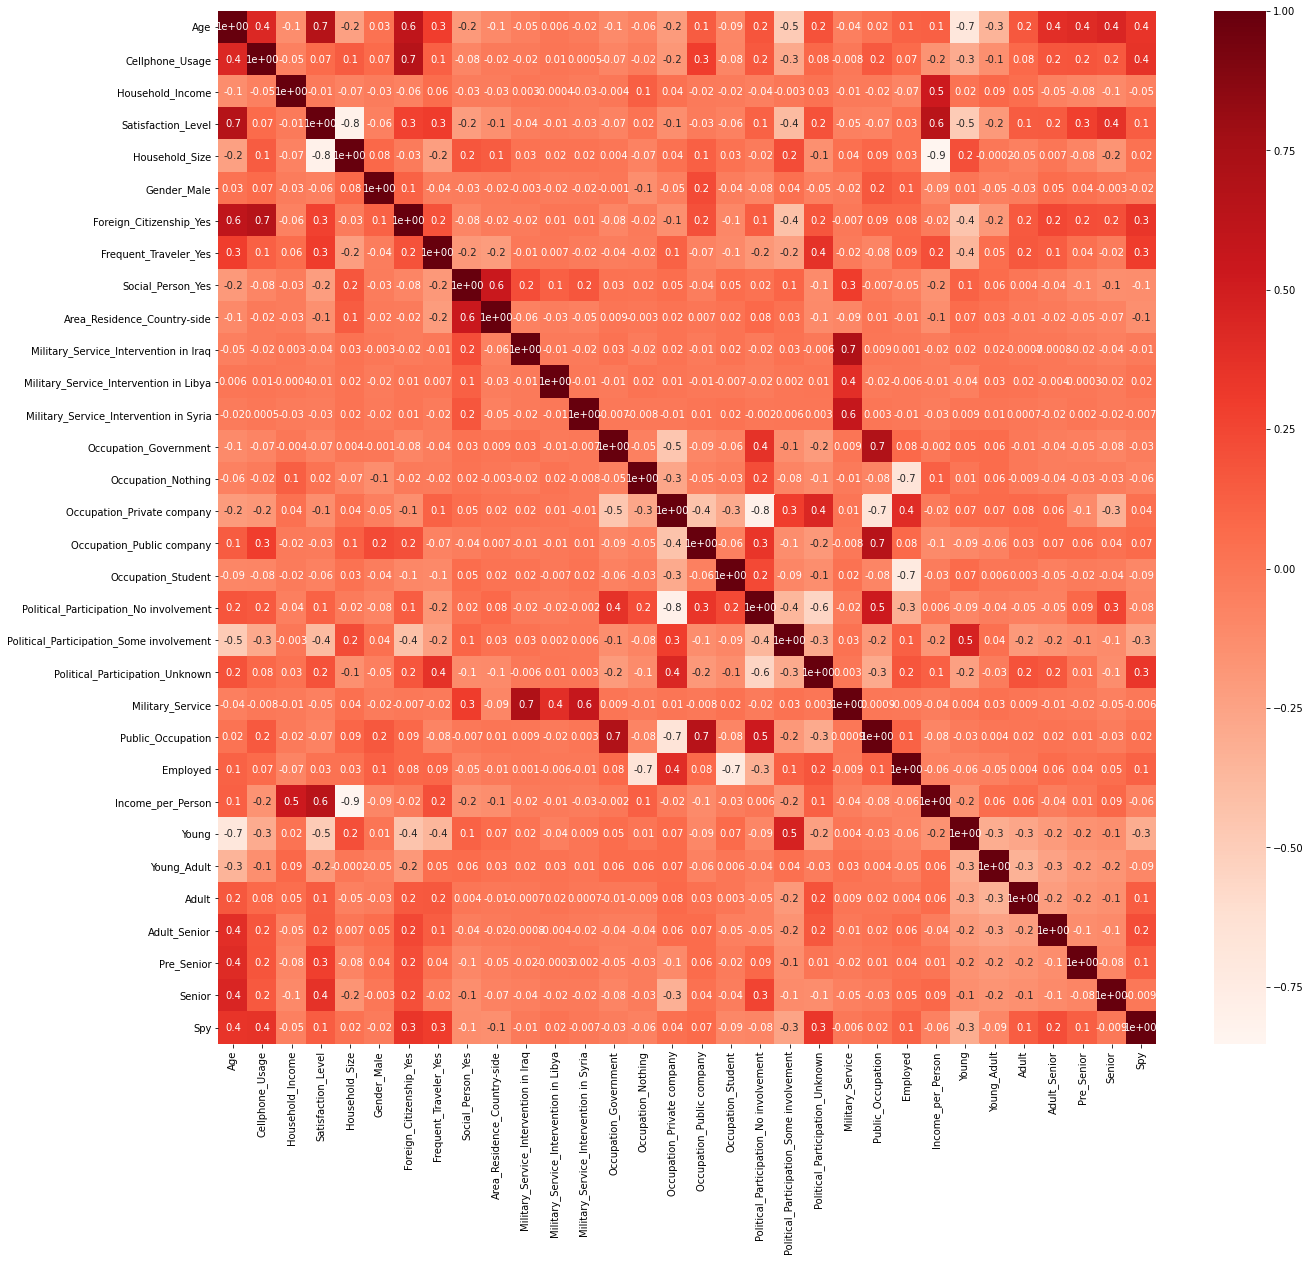

In [2128]:
#plot correlation heatmap
plt.figure(figsize=(21,19))
sns.heatmap(data=cor_spearman, annot=True, cmap = plt.cm.Reds, fmt='.1')

From the correlation matrix, one can conclude that the following variables pairs are correlated: 

1. the variables with the strongest correlations are "Household_Size" and "Income_per_Person" with a correlation of -0.9.

2. the variables "Household_Size" and "Satisfaction_Level" also show a high correlation of -0.8.

3. the variables "Occupation_Private company" and "Political_Participation_No involvement" are significantly correlated as well with correlation of -0.8.

Therefore, one of these variables must be deleted, specifically the one that is least correlated with the target variable ("spy"). 

1. In this case, "Household_Size" is the variable that is least correlated (0.02) with the target.

2. In this case, "Household_Size" is the variable that is least correlated (0.02) with the target.

3. In this case, "Occupation_Private company" is the variable that is least correlated (0.04) with the target.

--> Therefore the variables "Household_Size" and "Occupation_Private company" will be deleted.

Additionally, to delete one of the variables regarding age sector we observe that the senior is the least correlated with the target and because of that is the one that needs to be deleted. (This is the same than the dummy variables)

### REMOVING THE VARIABLES FROM THE TRAINING DATASET

Removing the variable "Household_Size" and "Occupation_Private company" from the Training Dataset2  + SPY

In [2129]:
training_dataset2_dummy_var_spy.drop(columns=['Household_Size','Occupation_Private company', 'Senior'], axis=1, inplace =True)
training_dataset2_dummy_var_spy

Age  Cellphone_Usage  Household_Income  Satisfaction_Level  \
ID_ORIGINAL                                                               
465080        70                2             17088                 4.0   
462698        56                2              8261                 3.0   
465477        31                1              8261                 2.0   
459236        86                3              7000                 5.0   
464465        37                2              7000                 1.0   
...          ...              ...               ...                 ...   
465964        47                1              9522                 5.0   
459670        39                2             15827                 2.0   
461580        38                1             15827                 1.0   
465987        20                1              8261                 1.0   
463381        36                2             17088                 1.0   

             Gender_Male  Foreign_Citizenship_Yes  Frequent_Traveler_Yes  \
ID_ORIGINAL                                                                
465080                 1                        1                      1   
462698                 0                        1                      1   
465477                 1                        0                      0   
459236                 0                        1                      0   
464465                 0                        1                      1   
...                  ...                      ...                    ...   
465964                 0                        1                      0   
459670                 0                        1                      1   
461580                 0                        0                      1   
465987                 1                        0                      0   
463381                 1                        1                      1   

             Social_Person_Yes  Area_Residence_Country-side  \
ID_ORIGINAL                                                   
465080                       0                            0   
462698                       0                            0   
465477                       1                            0   
459236                       0                            0   
464465                       1                            0   
...                        ...                          ...   
465964                       0                            0   
459670                       0                            0   
461580                       1                            0   
465987                       1                            0   
463381                       1                            0   

             Military_Service_Intervention in Iraq  ...  Military_Service  \
ID_ORIGINAL                                         ...                     
465080                                           0  ...                 0   
462698                                           0  ...                 0   
465477                                           0  ...                 0   
459236                                           0  ...                 0   
464465                                           0  ...                 0   
...                                            ...  ...               ...   
465964                                           0  ...                 0   
459670                                           0  ...                 0   
461580                                           0  ...                 0   
465987                                           0  ...                 0   
463381                                           0  ...                 0   

             Public_Occupation  Employed  Income_per_Person  Young  \
ID_ORIGINAL                                                          
465080                       0         1             8544.0    0.0   
462698          

Removing the variable "Household_Size" and "Occupation_Private company" from the Training Dataset2

In [2130]:
training_dataset2_dummy_var.drop(columns=['Household_Size','Occupation_Private company', 'Senior'], axis=1, inplace =True)
training_dataset2_dummy_var

Age  Cellphone_Usage  Household_Income  Satisfaction_Level  \
ID_ORIGINAL                                                               
465080        70                2             17088                 4.0   
462698        56                2              8261                 3.0   
465477        31                1              8261                 2.0   
459236        86                3              7000                 5.0   
464465        37                2              7000                 1.0   
...          ...              ...               ...                 ...   
465964        47                1              9522                 5.0   
459670        39                2             15827                 2.0   
461580        38                1             15827                 1.0   
465987        20                1              8261                 1.0   
463381        36                2             17088                 1.0   

             Gender_Male  Foreign_Citizenship_Yes  Frequent_Traveler_Yes  \
ID_ORIGINAL                                                                
465080                 1                        1                      1   
462698                 0                        1                      1   
465477                 1                        0                      0   
459236                 0                        1                      0   
464465                 0                        1                      1   
...                  ...                      ...                    ...   
465964                 0                        1                      0   
459670                 0                        1                      1   
461580                 0                        0                      1   
465987                 1                        0                      0   
463381                 1                        1                      1   

             Social_Person_Yes  Area_Residence_Country-side  \
ID_ORIGINAL                                                   
465080                       0                            0   
462698                       0                            0   
465477                       1                            0   
459236                       0                            0   
464465                       1                            0   
...                        ...                          ...   
465964                       0                            0   
459670                       0                            0   
461580                       1                            0   
465987                       1                            0   
463381                       1                            0   

             Military_Service_Intervention in Iraq  ...  \
ID_ORIGINAL                                         ...   
465080                                           0  ...   
462698                                           0  ...   
465477                                           0  ...   
459236                                           0  ...   
464465                                           0  ...   
...                                            ...  ...   
465964                                           0  ...   
459670                                           0  ...   
461580                                           0  ...   
465987                                           0  ...   
463381                                           0  ...   

             Political_Participation_Unknown  Military_Service  \
ID_ORIGINAL                                                      
465080                                     0                 0   
462698                                     0                 0   
465477                                     0                 0   
459236                                     0                 0   
464465                                     1                 0  

Removing the variable "Household_Size" and "Occupation_Private company" from the Training Dataset without Outliers 

In [2131]:
training_dataset_without_outliers_dummy_var.drop(columns=['Household_Size', 'Occupation_Private company', 'Senior'], axis=1, inplace =True)
training_dataset_without_outliers_dummy_var

Age  Cellphone_Usage  Household_Income  Satisfaction_Level  \
ID_ORIGINAL                                                               
465080        70                2             17088                 4.0   
462698        56                2              8261                 3.0   
465477        31                1              8261                 2.0   
459236        86                3              7000                 5.0   
464465        37                2              7000                 1.0   
...          ...              ...               ...                 ...   
465964        47                1              9522                 5.0   
459670        39                2             15827                 2.0   
461580        38                1             15827                 1.0   
465987        20                1              8261                 1.0   
463381        36                2             17088                 1.0   

             Gender_Male  Foreign_Citizenship_Yes  Frequent_Traveler_Yes  \
ID_ORIGINAL                                                                
465080                 1                        1                      1   
462698                 0                        1                      1   
465477                 1                        0                      0   
459236                 0                        1                      0   
464465                 0                        1                      1   
...                  ...                      ...                    ...   
465964                 0                        1                      0   
459670                 0                        1                      1   
461580                 0                        0                      1   
465987                 1                        0                      0   
463381                 1                        1                      1   

             Social_Person_Yes  Area_Residence_Country-side  \
ID_ORIGINAL                                                   
465080                       0                            0   
462698                       0                            0   
465477                       1                            0   
459236                       0                            0   
464465                       1                            0   
...                        ...                          ...   
465964                       0                            0   
459670                       0                            0   
461580                       1                            0   
465987                       1                            0   
463381                       1                            0   

             Military_Service_Intervention in Iraq  ...  \
ID_ORIGINAL                                         ...   
465080                                           0  ...   
462698                                           0  ...   
465477                                           0  ...   
459236                                           0  ...   
464465                                           0  ...   
...                                            ...  ...   
465964                                           0  ...   
459670                                           0  ...   
461580                                           0  ...   
465987                                           0  ...   
463381                                           0  ...   

             Political_Participation_Unknown  Military_Service  \
ID_ORIGINAL                                                      
465080                                     0                 0   
462698                                     0                 0   
465477                                     0                 0   
459236                                     0                 0   
464465                                     1                 0  

Removing the variable "Household_Size" and "Occupation_Private company" from the Training Dataset with target Enconding

In [2132]:
training_dataset2_enc_var.drop(columns=['Household_Size', 'Occupation_Private company', 'Senior'], axis=1, inplace =True)
training_dataset2_enc_var

Political_Participation  Age  Cellphone_Usage  Household_Income  \
ID_ORIGINAL                                                                    
465080                      0.426871   70                2             17088   
462698                      0.395408   56                2              8261   
465477                      0.186359   31                1              8261   
459236                      0.426871   86                3              7000   
464465                      0.731472   37                2              7000   
...                              ...  ...              ...               ...   
465964                      0.426871   47                1              9522   
459670                      0.395408   39                2             15827   
461580                      0.731472   38                1             15827   
465987                      0.186359   20                1              8261   
463381                      0.426871   36                2             17088   

             Satisfaction_Level  Gender_Male  Foreign_Citizenship_Yes  \
ID_ORIGINAL                                                             
465080                      4.0            1                        1   
462698                      3.0            0                        1   
465477                      2.0            1                        0   
459236                      5.0            0                        1   
464465                      1.0            0                        1   
...                         ...          ...                      ...   
465964                      5.0            0                        1   
459670                      2.0            0                        1   
461580                      1.0            0                        0   
465987                      1.0            1                        0   
463381                      1.0            1                        1   

             Frequent_Traveler_Yes  Social_Person_Yes  \
ID_ORIGINAL                                             
465080                           1                  0   
462698                           1                  0   
465477                           0                  1   
459236                           0                  0   
464465                           1                  1   
...                            ...                ...   
465964                           0                  0   
459670                           1                  0   
461580                           1                  1   
465987                           0                  1   
463381                           1                  1   

             Area_Residence_Country-side  ...  Occupation_Student  \
ID_ORIGINAL                               ...                       
465080                                 0  ...                   0   
462698                                 0  ...                   0   
465477                                 0  ...                   0   
459236                                 0  ...                   0   
464465                                 0  ...                   0   
...                                  ...  ...                 ...   
465964                                 0  ...                   1   
459670                                 0  ...                   0   
461580                                 0  ...                   0   
465987                                 0  ...                   0   
463381                                 0  ...                   0   

             Military_Service  Public Occupation  Employed  Income_per_Person  \
ID_ORIGINAL                                                                     
465080                      0                  0         1             8544.0   
462698                      0                  0         1             4130.0   
465477                      0                  0         1

### REMOVING THE VARIABLES FROM THE VALIDATION DATASET

Removing the variable "Household_Size" and "Occupation_Private company" from the Validation Dataset 2 

In [2133]:
validation_dataset2_dummy_var.drop(columns=['Household_Size', 'Occupation_Private company', 'Senior'], axis=1, inplace =True)
validation_dataset2_dummy_var

Age  Cellphone_Usage  Household_Income  Satisfaction_Level  \
ID_ORIGINAL                                                               
459748        46                3              7000                 3.0   
459201        66                2              7000                 4.0   
459454        38                2              7000                 2.0   
466474        29                1             14566                 1.0   
464502        35                2             14566                 2.0   
...          ...              ...               ...                 ...   
466576        20                1              7000                 1.0   
464810        27                1              8261                 3.0   
465206        47                1             23393                 5.0   
459464        29                1              7000                 2.0   
465404        25                2              7000                 2.0   

             Gender_Male  Foreign_Citizenship_Yes  Frequent_Traveler_Yes  \
ID_ORIGINAL                                                                
459748                 1                        1                      0   
459201                 0                        1                      1   
459454                 1                        1                      0   
466474                 1                        0                      1   
464502                 1                        1                      1   
...                  ...                      ...                    ...   
466576                 0                        0                      0   
464810                 0                        0                      0   
465206                 1                        1                      1   
459464                 1                        0                      1   
465404                 0                        1                      1   

             Social_Person_Yes  Area_Residence_Country-side  \
ID_ORIGINAL                                                   
459748                       0                            0   
459201                       0                            0   
459454                       0                            0   
466474                       0                            0   
464502                       0                            0   
...                        ...                          ...   
466576                       0                            0   
464810                       1                            1   
465206                       0                            0   
459464                       0                            0   
465404                       1                            0   

             Military_Service_Intervention in Iraq  ...  \
ID_ORIGINAL                                         ...   
459748                                           0  ...   
459201                                           0  ...   
459454                                           0  ...   
466474                                           0  ...   
464502                                           0  ...   
...                                            ...  ...   
466576                                           0  ...   
464810                                           0  ...   
465206                                           0  ...   
459464                                           0  ...   
465404                                           0  ...   

             Political_Participation_Unknown  Military_Service  \
ID_ORIGINAL                                                      
459748                                     0                 0   
459201                                     1                 0   
459454                                     1                 0   
466474                                     0                 0   
464502                                     0                 0  

Removing the variable "Household_Size" and "Occupation_Private company" from the Validation Dataset 2 + Target Encoding

In [2134]:
validation_dataset2_enc_var.drop(columns=['Household_Size', 'Occupation_Private company', 'Senior'], axis=1, inplace =True)

In [2135]:
validation_dataset2_enc_var

Political_Participation  Age  Cellphone_Usage  Household_Income  \
ID_ORIGINAL                                                                    
459748                      0.432723   46                3              7000   
459201                      0.735034   66                2              7000   
459454                      0.735034   38                2              7000   
466474                      0.402089   29                1             14566   
464502                      0.187255   35                2             14566   
...                              ...  ...              ...               ...   
466576                      0.187255   20                1              7000   
464810                      0.432723   27                1              8261   
465206                      0.735034   47                1             23393   
459464                      0.735034   29                1              7000   
465404                      0.402089   25                2              7000   

             Satisfaction_Level  Gender_Male  Foreign_Citizenship_Yes  \
ID_ORIGINAL                                                             
459748                      3.0            1                        1   
459201                      4.0            0                        1   
459454                      2.0            1                        1   
466474                      1.0            1                        0   
464502                      2.0            1                        1   
...                         ...          ...                      ...   
466576                      1.0            0                        0   
464810                      3.0            0                        0   
465206                      5.0            1                        1   
459464                      2.0            1                        0   
465404                      2.0            0                        1   

             Frequent_Traveler_Yes  Social_Person_Yes  \
ID_ORIGINAL                                             
459748                           0                  0   
459201                           1                  0   
459454                           0                  0   
466474                           1                  0   
464502                           1                  0   
...                            ...                ...   
466576                           0                  0   
464810                           0                  1   
465206                           1                  0   
459464                           1                  0   
465404                           1                  1   

             Area_Residence_Country-side  ...  Occupation_Student  \
ID_ORIGINAL                               ...                       
459748                                 0  ...                   0   
459201                                 0  ...                   0   
459454                                 0  ...                   0   
466474                                 0  ...                   0   
464502                                 0  ...                   0   
...                                  ...  ...                 ...   
466576                                 0  ...                   0   
464810                                 1  ...                   0   
465206                                 0  ...                   0   
459464                                 0  ...                   0   
465404                                 0  ...                   0   

             Military_Service  Public Occupation  Employed  Income_per_Person  \
ID_ORIGINAL                                                                     
459748                      0                  1         1             3500.0   
459201                      0                  0         1             3500.0   
459454                      0                  0         1

# 4. Treat the Test Dataset

In [2136]:
test = pd.read_csv(r'data/espionage_data_test.csv')

In [2137]:
test.describe()

ID    ID_ORIGINAL         Age  Household_Size  \
count   493.000000     493.000000  493.000000      476.000000   
mean   9246.000000  466423.752535   42.432049        2.955882   
std     142.461106    5122.591784   16.949769        1.592134   
min    9000.000000  459005.000000   18.000000        1.000000   
25%    9123.000000  462368.000000   29.000000        2.000000   
50%    9246.000000  465546.000000   40.000000        3.000000   
75%    9369.000000  469232.000000   51.000000        4.000000   
max    9492.000000  477959.000000   88.000000        9.000000   

       Satisfaction_Level  Household_Income  
count          476.000000        457.000000  
mean             2.493697       3123.527352  
std              1.599330       3948.088253  
min              1.000000          0.000000  
25%              1.000000          0.000000  
50%              2.000000       1261.000000  
75%              3.000000       5044.000000  
max              9.000000      17654.000000

In [2138]:
test.set_index('ID_ORIGINAL', inplace = True)
test.drop('ID', axis= 1, inplace=True)
test.isna().sum()

Gender                      0
Foreign_Citizenship         7
Age                         0
Frequent_Traveler           3
Cellphone_Usage             0
Household_Size             17
Satisfaction_Level         17
Occupation                  4
Political_Participation     4
Social_Person               8
Area_Residence              8
Military_Service            8
Household_Income           36
dtype: int64

## 4.1 Missing Values

In [ ]:
#This chapter follows the same approach as treating the missing values for the trai and valdidation dataset.

#### NUMERCIAL VARIABLES:

#### Imput Household_Size for the TEST DATASET

In [2139]:
incomplete_val = test.loc[test.Household_Size.isnull()]

In [2140]:
complete_val = test.loc[~test.Household_Size.isnull()]

In [2141]:
predict =incomplete_val.copy()
predict = predict.drop('Household_Size', 1)
predict = predict.fillna(training_dataset_temp.median())
predict = predict.fillna(training_dataset_temp.mode())
predict = pd.get_dummies(predict, drop_first=True)
predict['Military_Service_Intervention in Libya'] = 0
predict['Cellphone_Usage_High'] =0

In [2142]:
#Using the training model to predict the values for the missing values in "Household_Size"
incomplete_val['Household_Size'] = trained_model_Household_Size.predict(predict)
incomplete_val['Household_Size'] =  np.ceil(incomplete_val['Household_Size'])
Household_Size = pd.concat([incomplete_val['Household_Size'], complete_val['Household_Size']])

In [2143]:
#Adding the other variables with no missing values to the "imputed" dataset
imputed_val=test[['Gender','Age','Cellphone_Usage']]
imputed_val['Household_Size'] = Household_Size
imputed_val.isna().sum()

Gender             0
Age                0
Cellphone_Usage    0
Household_Size     0
dtype: int64

#### Imput Satisfaction_Level for the VALIDATION DATASET

In [2144]:
incomplete_val = test.loc[test.Satisfaction_Level.isnull()]

In [2145]:
complete_val = test.loc[~test.Satisfaction_Level.isnull()]

In [2146]:
predict =incomplete_val.copy()
predict = predict.drop('Satisfaction_Level', 1)
predict = predict.fillna(training_dataset_temp.median())
predict = predict.fillna(training_dataset_temp.mode())
predict = pd.get_dummies(predict, drop_first=True)
predict['Military_Service_Intervention in Libya'] = 0
predict['Cellphone_Usage_High'] =0

In [2147]:
#Using the training model to predict the values for the missing values in "Satisfaction_Level"
incomplete_val['Satisfaction_Level'] = trained_model_Satisfaction_Level.predict(predict)
incomplete_val['Satisfaction_Level'] =  np.ceil(incomplete_val['Satisfaction_Level'])
Satisfaction_Level = pd.concat([incomplete_val['Satisfaction_Level'], complete_val['Satisfaction_Level']])

In [2148]:
#Adding the other variables with no missing values to the "imputed" dataset
imputed_val['Satisfaction_Level'] = Satisfaction_Level
imputed_val.isna().sum()

Gender                0
Age                   0
Cellphone_Usage       0
Household_Size        0
Satisfaction_Level    0
dtype: int64

#### Imput Household_Income for the TEST DATASET

In [2149]:
predictors= training_dataset_temp.copy()
predictors = predictors.drop('Household_Income', 1)
predictors= pd.get_dummies(predictors, drop_first=True)

In [2150]:
incomplete_val = test.loc[test.Household_Income.isnull()]
complete_val = test.loc[~test.Household_Income.isnull()]

In [2151]:
predict =incomplete_val.copy()
predict = predict.drop('Satisfaction_Level', 1)
predict = predict.fillna(training_dataset_temp.median())
predict = predict.fillna(training_dataset_temp.mode())
predict = pd.get_dummies(predict, drop_first=True)
predict['Occupation_Nothing']=0

In [2152]:
rf = RandomForestRegressor(n_estimators = 1000, max_depth = 9, random_state = 42)
trained_model_HI = rf.fit(predictors, training_dataset_temp["Household_Income"])

In [2153]:
#Using the training model to predict the values for the missing values in "Household_Income"
incomplete_val['Household_Income'] = trained_model_HI.predict(predict)
incomplete_val['Household_Income'] =  np.ceil(incomplete_val['Household_Income'])
Household_Income = pd.concat([incomplete_val['Household_Income'], complete_val['Household_Income']])

In [2154]:
#Adding the other variables with no missing values to the "imputed" dataset
imputed_val['Household_Income'] = Household_Income
imputed_val.isna().sum()

Gender                0
Age                   0
Cellphone_Usage       0
Household_Size        0
Satisfaction_Level    0
Household_Income      0
dtype: int64

#### CATEGORICAL VARIABLES:

#### Imput Foreign_Citizenship for the VALIDATION DATASET

In [2155]:

temp = test.copy()
temp = temp.fillna(training_dataset_temp.median())
temp = pd.concat([temp.pop('Foreign_Citizenship'), temp.fillna(training_dataset_temp.mode())], axis=1)
temp = pd.get_dummies(temp, columns=['Gender', 'Cellphone_Usage', 'Frequent_Traveler', 'Political_Participation', 'Occupation', 'Social_Person', 'Area_Residence','Military_Service'])

In [2156]:
incomplete_val = test.loc[test.Foreign_Citizenship.isnull()]

In [2157]:
complete_val = test.loc[~test.Foreign_Citizenship.isnull()]

In [2158]:
predict = temp.loc[temp.Foreign_Citizenship.isnull()]
predict = predict.drop('Foreign_Citizenship', 1)

In [2159]:
#Using the training model to predict the values for the missing values in "Foreign_Citizenship"
incomplete_val['Foreign_Citizenship'] = trained_model_Foreign_Citizenship.predict(predict)
Foreign_Citizenship = pd.concat([incomplete_val['Foreign_Citizenship'], complete_val['Foreign_Citizenship']])

In [2160]:
#Adding the other variables with no missing values to the "imputed" dataset
imputed_val['Foreign_Citizenship'] = Foreign_Citizenship
imputed_val.isna().sum()

Gender                 0
Age                    0
Cellphone_Usage        0
Household_Size         0
Satisfaction_Level     0
Household_Income       0
Foreign_Citizenship    0
dtype: int64

#### Imput Frequent_Traveler for the VALIDATION DATASET

In [2161]:
temp = test.copy()
temp = temp.fillna(training_dataset_temp.median())
temp = pd.concat([temp.pop('Frequent_Traveler'), temp.fillna(training_dataset_temp.mode())], axis=1)
temp = pd.get_dummies(temp, columns=['Gender', 'Cellphone_Usage', 'Foreign_Citizenship', 'Political_Participation', 'Occupation', 'Social_Person', 'Area_Residence','Military_Service'])

In [2162]:
incomplete_val = test.loc[test.Frequent_Traveler.isnull()]

In [2163]:
complete_val = test.loc[~test.Frequent_Traveler.isnull()]

In [2164]:
predict = temp.loc[temp.Frequent_Traveler.isnull()]
predict = predict.drop('Frequent_Traveler', 1)

In [2165]:
#Using the training model to predict the values for the missing values in "Frequent_Traveler"
incomplete_val['Frequent_Traveler'] = trained_model_Frequent_Traveler.predict(predict)
Frequent_Traveler = pd.concat([incomplete_val['Frequent_Traveler'], complete_val['Frequent_Traveler']])

In [2166]:
#Adding the other variables with no missing values to the "imputed" dataset
imputed_val['Frequent_Traveler'] = Frequent_Traveler
imputed_val.isna().sum()

Gender                 0
Age                    0
Cellphone_Usage        0
Household_Size         0
Satisfaction_Level     0
Household_Income       0
Foreign_Citizenship    0
Frequent_Traveler      0
dtype: int64

#### Imput Occupation for the VALIDATION DATASET

In [2167]:
temp = test.copy()
temp = temp.fillna(training_dataset_temp.median())
temp = pd.concat([temp.pop('Occupation'), temp.fillna(training_dataset_temp.mode())], axis=1)
temp = pd.get_dummies(temp, columns=['Gender', 'Cellphone_Usage', 'Foreign_Citizenship', 'Political_Participation', 'Frequent_Traveler', 'Social_Person', 'Area_Residence','Military_Service'])

In [2168]:
incomplete_val = test.loc[test.Occupation.isnull()]

In [2169]:
complete_val = test.loc[~test.Occupation.isnull()]

In [2170]:
predict = temp.loc[temp.Occupation.isnull()]
predict = predict.drop('Occupation', 1)

In [2171]:
#Using the training model to predict the values for the missing values in "Occupation"
incomplete_val['Occupation'] = trained_model_Occupation.predict(predict)
Occupation = pd.concat([incomplete_val['Occupation'], complete_val['Occupation']])

In [2172]:
#Adding the other variables with no missing values to the "imputed" dataset
imputed_val['Occupation'] = Occupation
imputed_val.isna().sum()

Gender                 0
Age                    0
Cellphone_Usage        0
Household_Size         0
Satisfaction_Level     0
Household_Income       0
Foreign_Citizenship    0
Frequent_Traveler      0
Occupation             0
dtype: int64

#### Imput Political_Participation for the VALIDATION DATASET

In [2173]:
temp = test.copy()
temp = temp.fillna(training_dataset_temp.median())
temp = pd.concat([temp.pop('Political_Participation'), temp.fillna(training_dataset_temp.mode())], axis=1)
temp = pd.get_dummies(temp, columns=['Gender', 'Cellphone_Usage', 'Foreign_Citizenship', 'Occupation', 'Frequent_Traveler', 'Social_Person', 'Area_Residence','Military_Service'],  drop_first=True)

In [2174]:
incomplete_val = test.loc[test.Political_Participation.isnull()]

In [2175]:
complete_val = test.loc[~test.Political_Participation.isnull()]

In [2176]:
predict = temp.loc[temp.Political_Participation.isnull()]
predict = predict.drop('Political_Participation', 1)

In [2177]:
#Using the training model to predict the values for the missing values in "Political_Participation"
incomplete_val['Political_Participation'] = trained_model_Political_Participation.predict(predict)
Political_Participation = pd.concat([incomplete_val['Political_Participation'], complete_val['Political_Participation']])

In [2178]:
#Adding the other variables with no missing values to the "imputed" dataset
imputed_val['Political_Participation'] = Political_Participation
imputed_val.isna().sum()

Gender                     0
Age                        0
Cellphone_Usage            0
Household_Size             0
Satisfaction_Level         0
Household_Income           0
Foreign_Citizenship        0
Frequent_Traveler          0
Occupation                 0
Political_Participation    0
dtype: int64

#### Imput Social_Person for the VALIDATION DATASET

In [2179]:
temp = test.copy()
temp = temp.fillna(training_dataset_temp.median())
temp = pd.concat([temp.pop('Social_Person'), temp.fillna(training_dataset_temp.mode())], axis=1)
temp = pd.get_dummies(temp, columns=['Gender', 'Cellphone_Usage', 'Foreign_Citizenship', 'Occupation', 'Frequent_Traveler', 'Political_Participation', 'Area_Residence','Military_Service'])

In [2180]:
incomplete_val = test.loc[test.Social_Person.isnull()]

In [2181]:
complete_val = test.loc[~test.Social_Person.isnull()]

In [2182]:
predict = temp.loc[temp.Social_Person.isnull()]
predict = predict.drop('Social_Person', 1)

In [2183]:
#Using the training model to predict the values for the missing values in "Social_Person"
incomplete_val['Social_Person'] = trained_model_Social_Person.predict(predict)
Social_Person = pd.concat([incomplete_val['Social_Person'], complete_val['Social_Person']])

In [2184]:
#Adding the other variables with no missing values to the "imputed" dataset
imputed_val['Social_Person'] = Social_Person
imputed_val.isna().sum()

Gender                     0
Age                        0
Cellphone_Usage            0
Household_Size             0
Satisfaction_Level         0
Household_Income           0
Foreign_Citizenship        0
Frequent_Traveler          0
Occupation                 0
Political_Participation    0
Social_Person              0
dtype: int64

#### Imput Military_Service for the VALIDATION DATASET

In [2185]:
temp = test.copy()
temp = temp.fillna(training_dataset_temp.median())
temp = pd.concat([temp.pop('Military_Service'), temp.fillna(training_dataset_temp.mode())], axis=1)
temp = pd.get_dummies(temp, columns=['Gender', 'Cellphone_Usage', 'Foreign_Citizenship', 'Occupation', 'Frequent_Traveler', 'Political_Participation', 'Area_Residence','Social_Person'])

In [2186]:
incomplete_val = test.loc[test.Military_Service.isnull()]

In [2187]:
complete_val = test.loc[~test.Military_Service.isnull()]

In [2188]:
predict = temp.loc[temp.Military_Service.isnull()]
predict = predict.drop('Military_Service', 1)

In [2189]:
#Using the training model to predict the values for the missing values in "Military_Service"
incomplete_val['Military_Service'] = trained_model_Military_Service.predict(predict)
Military_Service = pd.concat([incomplete_val['Military_Service'], complete_val['Military_Service']])

In [2190]:
#Adding the other variables with no missing values to the "imputed" dataset
imputed_val['Military_Service'] = Military_Service
imputed_val.isna().sum()

Gender                     0
Age                        0
Cellphone_Usage            0
Household_Size             0
Satisfaction_Level         0
Household_Income           0
Foreign_Citizenship        0
Frequent_Traveler          0
Occupation                 0
Political_Participation    0
Social_Person              0
Military_Service           0
dtype: int64

#### Imput Area_Residence for the VALIDATION DATASET

In [2191]:
temp = test.copy()
temp = temp.fillna(training_dataset_temp.median())
temp = pd.concat([temp.pop('Area_Residence'), temp.fillna(training_dataset_temp.mode())], axis=1)
temp = pd.get_dummies(temp, columns=['Gender', 'Cellphone_Usage', 'Foreign_Citizenship', 'Occupation', 'Frequent_Traveler', 'Political_Participation', 'Military_Service','Social_Person'])

In [2192]:
incomplete_val = test.loc[test.Area_Residence.isnull()]

In [2193]:
complete_val = test.loc[~test.Area_Residence.isnull()]

In [2194]:
predict = temp.loc[temp.Area_Residence.isnull()]
predict = predict.drop('Area_Residence', 1)

In [2195]:
#Using the training model to predict the values for the missing values in "Area_Residence"
incomplete_val['Area_Residence'] = trained_model_Area_Residence.predict(predict)
Area_Residence = pd.concat([incomplete_val['Area_Residence'], complete_val['Area_Residence']])

In [2196]:
#Adding the other variables with no missing values to the "imputed" dataset
imputed_val['Area_Residence'] = Area_Residence
imputed_val.isna().sum()

Gender                     0
Age                        0
Cellphone_Usage            0
Household_Size             0
Satisfaction_Level         0
Household_Income           0
Foreign_Citizenship        0
Frequent_Traveler          0
Occupation                 0
Political_Participation    0
Social_Person              0
Military_Service           0
Area_Residence             0
dtype: int64

In [2197]:
test = imputed_val.copy()

## 4.2 Feature Engenering

In [2198]:
test=pd.get_dummies(test, columns=['Gender', 'Foreign_Citizenship', 'Frequent_Traveler', 'Social_Person','Area_Residence'], drop_first = True)

In [2199]:
#test=pd.get_dummies(test, columns=['Military_Service','Occupation', 'Political_Participation'])
test=pd.get_dummies(test, columns=['Military_Service','Occupation'])

In [2200]:
aux= test.copy()

In [2201]:
#Drop Column --> we can delete the column "Military_Service_Never" --> if you have never done military service in one of the countries = never
test.drop('Military_Service_Never', axis=1, inplace=True)

#Drop Column --> we can delete the column "Occupation_Self-employed" --> if you have never worked = never
test.drop('Occupation_Self-employed', axis=1, inplace=True)

In [2202]:
#Create dummy variables for variable "Cellphone_Usage"
#Create a dictionary with the values to be replaced: values to replace
replace_values = {"Low" : 1, "Average" : 2, "High" : 3 }
#Replace the values in the variable “Cellphone_Usage” according to the dict
test = test.replace({"Cellphone_Usage": replace_values}) 

In [2203]:
#Drop Column --> we can delete the column "Political_Participation_Strong involvement" as it has the lowest correlation with the target
#test.drop('Political_Participation_Strong involvement', axis=1, inplace=True)

In [2204]:
# target encoder for "Political_Participation"
pol_part=tenc.transform(test['Political_Participation'])

test = pol_part.join(test.drop('Political_Participation',axis = 1))

In [2205]:
#creating a new variable containg information about whether a person did Military Service or not 
test['Military_Service'] = test['Military_Service_Intervention in Iraq'] +test['Military_Service_Intervention in Libya'] + test['Military_Service_Intervention in Syria']

# creating a variable containing information about whether a person is working in the public sector 
test['Public Occupation'] = test['Occupation_Government'] + test['Occupation_Public company']

# creating a variable containing information about whether a person is employed or not
temp = pd.merge(test, aux["Occupation_Self-employed"], left_index=True, right_index=True)
test['Employed'] = temp['Occupation_Government'] + temp['Occupation_Self-employed']+ temp['Occupation_Private company']+ temp['Occupation_Public company']

# creating a variable containing information about the income per person in one household
test['Income_per_Person'] = round(test['Household_Income'] / test['Household_Size'], 0)

In [2206]:
test.loc[(test['Age'] <= 28) & (test['Age'] >= 18), 'Young'] = 1
test['Young'].fillna(value = 0, inplace = True)

test.loc[(test['Age'] <= 39) & (test['Age'] >= 29), 'Young_Adult'] = 1
test['Young_Adult'].fillna(value = 0, inplace = True)

test.loc[(test['Age'] <=50) & (test['Age'] >= 40), 'Adult'] = 1
test['Adult'].fillna(value = 0, inplace = True)

test.loc[(test['Age'] <=61) & (test['Age'] >= 51), 'Adult_Senior'] = 1
test['Adult_Senior'].fillna(value = 0, inplace = True)

test.loc[(test['Age'] <=72) & (test['Age'] >= 62), 'Pre_Senior'] = 1
test['Pre_Senior'].fillna(value = 0, inplace = True)

test.loc[(test['Age'] >= 73), 'Senior'] = 1
test['Senior'].fillna(value = 0, inplace = True)

In [2207]:
#Deleting the variables that were correlated
test.drop(columns=['Household_Size','Occupation_Private company', 'Senior'], axis=1, inplace =True)

# 5. Export Datasets Preprocessed

### Test

In [2208]:
test

Political_Participation  Age  Cellphone_Usage  \
ID_ORIGINAL                                                  
460139                      0.735034   26                1   
460648                      0.432723   29                1   
460835                      0.735034   28                1   
461613                      0.187255   25                1   
461721                      0.402089   26                1   
...                              ...  ...              ...   
473596                      0.187255   34                1   
477769                      0.432723   62                2   
475292                      0.735034   47                2   
472997                      0.432723   51                2   
475302                      0.735034   42                1   

             Satisfaction_Level  Household_Income  Gender_Male  \
ID_ORIGINAL                                                      
460139                      1.0            7566.0            1   
460648                      3.0           10088.0            0   
460835                      3.0               0.0            0   
461613                      1.0           10088.0            0   
461721                      1.0            8827.0            1   
...                         ...               ...          ...   
473596                      1.0            1261.0            0   
477769                      4.0               0.0            1   
475292                      2.0            6305.0            0   
472997                      2.0           11349.0            0   
475302                      2.0               0.0            0   

             Foreign_Citizenship_Yes  Frequent_Traveler_Yes  \
ID_ORIGINAL                                                   
460139                             0                      0   
460648                             0                      0   
460835                             1                      1   
461613                             0                      1   
461721                             0                      1   
...                              ...                    ...   
473596                             0                      0   
477769                             1                      1   
475292                             1                      1   
472997                             1                      1   
475302                             1                      1   

             Social_Person_Yes  Area_Residence_Country-side  ...  \
ID_ORIGINAL                                                  ...   
460139                       1                            0  ...   
460648                       1                            0  ...   
460835                       1                            0  ...   
461613                       1                            0  ...   
461721                       1                            0  ...   
...                        ...                          ...  ...   
473596                       1                            0  ...   
477769                       0                            0  ...   
475292                       0                            0  ...   
472997                       0                            0  ...   
475302                       1                            0  ...   

             Occupation_Student  Military_Service  Public Occupation  \
ID_ORIGINAL                                                            
460139                        0                 1                  0   
460648                        0                 1                  0   
460835                        0                 1                  0   
461613                        0                 1                  0   
461721                        0                 1                  0   
...                         ...               ...                ...   
473596                        0                 0                 

In [2209]:
test.to_csv("data/test_enc.csv")

### Training dataset2

In [2210]:
#Export the training dataset
training_dataset_dummy_var_spy.to_csv("data/training_data2.csv")

In [2211]:
#Export the validation dataset
validation_dataset2_dummy_var = pd.merge(validation_dataset2_dummy_var, validation_target, left_index=True, right_index=True)
validation_dataset2_dummy_var.to_csv("data/validation_data2.csv")

In [2212]:
validation_dataset_enc_var_spy = pd.merge(validation_dataset2_enc_var, validation_target, left_index=True, right_index=True)
validation_dataset_enc_var_spy.to_csv("data/validation_data_enc.csv")

In [2213]:
training_dataset2_enc_var_spy = pd.merge(training_dataset2_enc_var, training_target, left_index=True, right_index=True)
training_dataset2_enc_var_spy.to_csv("data/training_data_enc.csv")

### Datset without Outliers

In [2214]:
training_dataset_without_outliers_dummy_var = pd.merge(training_dataset_without_outliers_dummy_var, training_target, left_index=True, right_index=True)
training_dataset_without_outliers_dummy_var.to_csv("data/training_dataset_without_outliers.csv")

# 6. Import Datsets Preprocessed

In [2]:
aux_train_enc = pd.read_csv(r'data/training_data_enc.csv')
aux_train_enc.set_index('ID_ORIGINAL', inplace = True)

aux_val_enc = pd.read_csv(r'data/validation_data_enc.csv')
aux_val_enc.set_index('ID_ORIGINAL', inplace = True)

In [3]:
#Import the train dataset and its target
train_enc = aux_train_enc.drop(columns=['Spy'], axis=1)
target_train = aux_train_enc['Spy']

In [4]:
#Import the validation dataset and its target
validation_enc = aux_val_enc.drop(columns=['Spy'], axis=1)
validation_target = aux_val_enc['Spy']

In [5]:
#Import the test dataset
test_enc = pd.read_csv(r'data/test_enc.csv')
test_enc.set_index('ID_ORIGINAL', inplace = True)
test = test_enc.copy()

# 7. Models

## 7.1 Feature Selection

### RFE With Random Forest

In [158]:
#Applying RFE using the RandomForestClassifier as a model with 19 iterations

rfes=[]
itr = 0
model = RandomForestClassifier()
for n in range(10,29):
    rfe = RFECV(estimator = model, min_features_to_select = n, scoring='f1', cv=5)
    rfes.append(rfe)
    X_rfe = rfe.fit_transform(X = train_enc, y = target_train)
    score= rfe.score(train_enc, target_train)
    print('Iteration ' + str(itr) + ' : for ' + str(n) + ' variables the score is ' + str(score)  )
    itr = itr + 1

Iteration 0 : for 10 variables the score is 0.97546875
Iteration 1 : for 11 variables the score is 0.97546875
Iteration 2 : for 12 variables the score is 0.97546875
Iteration 3 : for 13 variables the score is 0.97546875
Iteration 4 : for 14 variables the score is 0.97546875
Iteration 5 : for 15 variables the score is 0.97546875
Iteration 6 : for 16 variables the score is 0.97546875
Iteration 7 : for 17 variables the score is 0.97546875
Iteration 8 : for 18 variables the score is 0.9753125
Iteration 9 : for 19 variables the score is 0.97546875
Iteration 10 : for 20 variables the score is 0.97546875
Iteration 11 : for 21 variables the score is 0.97546875
Iteration 12 : for 22 variables the score is 0.97546875
Iteration 13 : for 23 variables the score is 0.97546875
Iteration 14 : for 24 variables the score is 0.97546875
Iteration 15 : for 25 variables the score is 0.97546875
Iteration 16 : for 26 variables the score is 0.97546875
Iteration 17 : for 27 variables the score is 0.97546875
Ite

In [167]:
# get the data columns names and the support_ attribute as value
selected_features = pd.Series(rfes[0].support_, index = train_enc.columns)
selected_features

Political_Participation                    True
Age                                        True
Cellphone_Usage                            True
Household_Income                           True
Satisfaction_Level                         True
Gender_Male                                True
Foreign_Citizenship_Yes                    True
Frequent_Traveler_Yes                      True
Social_Person_Yes                          True
Area_Residence_Country-side                True
Military_Service_Intervention in Iraq      True
Military_Service_Intervention in Libya    False
Military_Service_Intervention in Syria    False
Occupation_Government                      True
Occupation_Nothing                        False
Occupation_Public company                  True
Occupation_Student                         True
Military_Service                           True
Public Occupation                          True
Employed                                   True
Income_per_Household                    

### RFE with Gradient Boosting

In [62]:
#Applying RFE using the GradientBoostingClassifier as a model with 19 iterations
rfes=[]
itr = 0
model = GradientBoostingClassifier()
for n in range(10,29):
    rfe = RFECV(estimator = model, min_features_to_select = n, scoring='f1', cv=5)
    rfes.append(rfe)
    X_rfe = rfe.fit_transform(X = train_enc, y = target_train)
    score= rfe.score(train_enc, target_train)
    print('Iteration ' + str(itr) + ' : for ' + str(n) + ' variables the score is ' + str(score)  )
    itr = itr + 1

Iteration 0 : for 10 variables the score is 0.77546875
Iteration 1 : for 11 variables the score is 0.77546875
Iteration 2 : for 12 variables the score is 0.77546875
Iteration 3 : for 13 variables the score is 0.77546875
Iteration 4 : for 14 variables the score is 0.77609375
Iteration 5 : for 15 variables the score is 0.77609375
Iteration 6 : for 16 variables the score is 0.77546875
Iteration 7 : for 17 variables the score is 0.77546875
Iteration 8 : for 18 variables the score is 0.77546875
Iteration 9 : for 19 variables the score is 0.77546875
Iteration 10 : for 20 variables the score is 0.77546875
Iteration 11 : for 21 variables the score is 0.77546875
Iteration 12 : for 22 variables the score is 0.77546875
Iteration 13 : for 23 variables the score is 0.77546875
Iteration 14 : for 24 variables the score is 0.77546875
Iteration 15 : for 25 variables the score is 0.77546875
Iteration 16 : for 26 variables the score is 0.77546875
Iteration 17 : for 27 variables the score is 0.77546875
It

In [65]:
# get the data columns names and the support_ attribute as value
selected_features = pd.Series(rfes[5].support_, index = train_enc.columns)
selected_features

Political_Participation                    True
Age                                        True
Cellphone_Usage                            True
Household_Income                           True
Satisfaction_Level                         True
Gender_Male                                True
Foreign_Citizenship_Yes                    True
Frequent_Traveler_Yes                      True
Social_Person_Yes                          True
Area_Residence_Country-side                True
Military_Service_Intervention in Iraq      True
Military_Service_Intervention in Libya    False
Military_Service_Intervention in Syria     True
Occupation_Government                      True
Occupation_Nothing                         True
Occupation_Public company                  True
Occupation_Student                         True
Military_Service                          False
Public Occupation                          True
Employed                                   True
Income_per_Household                    

### RFE With Adaboost

In [82]:
#Applying RFE using the AdaBoostClassifier as a model with 19 iterations

rfes=[]
itr = 0
model = AdaBoostClassifier()
for n in range(10,29):
    rfe = RFECV(estimator = model, min_features_to_select = n, scoring='f1', cv=5)
    rfes.append(rfe)
    X_rfe = rfe.fit_transform(X = train_enc, y = target_train)
    score= rfe.score(train_enc, target_train)
    print('Iteration ' + str(itr) + ' : for ' + str(n) + ' variables the score is ' + str(score)  )
    itr = itr + 1

Iteration 0 : for 10 variables the score is 0.74640625
Iteration 1 : for 11 variables the score is 0.75
Iteration 2 : for 12 variables the score is 0.75
Iteration 3 : for 13 variables the score is 0.75
Iteration 4 : for 14 variables the score is 0.74953125
Iteration 5 : for 15 variables the score is 0.74953125
Iteration 6 : for 16 variables the score is 0.74953125
Iteration 7 : for 17 variables the score is 0.74953125
Iteration 8 : for 18 variables the score is 0.74953125
Iteration 9 : for 19 variables the score is 0.74953125
Iteration 10 : for 20 variables the score is 0.74953125
Iteration 11 : for 21 variables the score is 0.74953125
Iteration 12 : for 22 variables the score is 0.74953125
Iteration 13 : for 23 variables the score is 0.74953125
Iteration 14 : for 24 variables the score is 0.74953125
Iteration 15 : for 25 variables the score is 0.74953125
Iteration 16 : for 26 variables the score is 0.74953125
Iteration 17 : for 27 variables the score is 0.74953125
Iteration 18 : for 2

In [84]:
# get the data columns names and the support_ attribute as value
selected_features = pd.Series(rfes[1].support_, index = train_enc.columns)
selected_features

Political_Participation                    True
Age                                        True
Cellphone_Usage                            True
Household_Income                          False
Satisfaction_Level                         True
Gender_Male                                True
Foreign_Citizenship_Yes                   False
Frequent_Traveler_Yes                      True
Social_Person_Yes                         False
Area_Residence_Country-side                True
Military_Service_Intervention in Iraq     False
Military_Service_Intervention in Libya     True
Military_Service_Intervention in Syria    False
Occupation_Government                      True
Occupation_Nothing                         True
Occupation_Public company                  True
Occupation_Student                        False
Military_Service                           True
Public Occupation                         False
Employed                                  False
Income_per_Household                    

### Feature Importance

In [66]:
RF= RandomForestClassifier()
RF_importance = RF.fit(train_enc, target_train).feature_importances_

XGB= xgb.XGBClassifier()
XGB_importance = XGB.fit(train_enc, target_train).feature_importances_

GBC = GradientBoostingClassifier()
GBC_importance = GBC.fit(train_enc, target_train).feature_importances_

ABC = AdaBoostClassifier()
ABC_importance = ABC.fit(train_enc, target_train).feature_importances_

ET= ExtraTreesClassifier()
ET_importance = ET.fit(train_enc, target_train).feature_importances_

In [67]:
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': train_enc.columns.values ,
     'Random Forest feature importances': RF_importance,
     'Extra Trees  feature importances': ET_importance,
     'AdaBoost feature importances': ABC_importance,
     'Gradient Boost feature importances': GBC_importance,
     'XGBC feature importances': XGB_importance                             
    })
feature_dataframe['mean'] = feature_dataframe.mean(axis= 1)

In [69]:
#Defining and plotting an averaged feture importance graph

y = feature_dataframe['mean'].values
x = feature_dataframe['features'].values
data = [go.Bar(
            x= x,
             y= y,
            width = 0.5,
            marker=dict(
               color = feature_dataframe['mean'].values,
            colorscale='Portland',
            showscale=True,
            reversescale = False
            ),
            opacity=0.6
        )]

layout= go.Layout(
    autosize= True,
    title= 'Barplots of Mean Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')

### Deletion of the least Important Features

Based on the two methods (RFE and Feature Importance) we decided to delete the variables: <br>
 &emsp;&emsp;1) Military_Service_Intervention in Iraq <br>
 &emsp;&emsp;2) Military_Service_Intervention in Syria <br>
 &emsp;&emsp;3) Military_Service_Intervention in Lybia <br>
 &emsp;&emsp;4) Occupation_Nothing 

In [5]:
selected_train_enc = train_enc.drop(columns=['Military_Service_Intervention in Libya', 'Military_Service_Intervention in Syria', 'Military_Service_Intervention in Iraq','Occupation_Nothing' ], axis=1)
selected_val_enc = validation_enc.drop(columns=['Military_Service_Intervention in Libya', 'Military_Service_Intervention in Syria' , 'Military_Service_Intervention in Iraq', 'Occupation_Nothing'], axis=1)

In [6]:
selected_test_enc = test_enc.drop(columns=['Military_Service_Intervention in Iraq','Military_Service_Intervention in Libya', 'Military_Service_Intervention in Syria', 'Occupation_Nothing'], axis=1)

In [7]:
selected_train_enc

Political_Participation  Age  Cellphone_Usage  Household_Income  \
ID_ORIGINAL                                                                    
465080                      0.426871   70                2             17088   
462698                      0.395408   56                2              8261   
465477                      0.186359   31                1              8261   
459236                      0.426871   86                3              7000   
464465                      0.731472   37                2              7000   
...                              ...  ...              ...               ...   
465964                      0.426871   47                1              9522   
459670                      0.395408   39                2             15827   
461580                      0.731472   38                1             15827   
465987                      0.186359   20                1              8261   
463381                      0.426871   36                2             17088   

             Satisfaction_Level  Gender_Male  Foreign_Citizenship_Yes  \
ID_ORIGINAL                                                             
465080                      4.0            1                        1   
462698                      3.0            0                        1   
465477                      2.0            1                        0   
459236                      5.0            0                        1   
464465                      1.0            0                        1   
...                         ...          ...                      ...   
465964                      5.0            0                        1   
459670                      2.0            0                        1   
461580                      1.0            0                        0   
465987                      1.0            1                        0   
463381                      1.0            1                        1   

             Frequent_Traveler_Yes  Social_Person_Yes  \
ID_ORIGINAL                                             
465080                           1                  0   
462698                           1                  0   
465477                           0                  1   
459236                           0                  0   
464465                           1                  1   
...                            ...                ...   
465964                           0                  0   
459670                           1                  0   
461580                           1                  1   
465987                           0                  1   
463381                           1                  1   

             Area_Residence_Country-side  ...  Occupation_Student  \
ID_ORIGINAL                               ...                       
465080                                 0  ...                   0   
462698                                 0  ...                   0   
465477                                 0  ...                   0   
459236                                 0  ...                   0   
464465                                 0  ...                   0   
...                                  ...  ...                 ...   
465964                                 0  ...                   1   
459670                                 0  ...                   0   
461580                                 0  ...                   0   
465987                                 0  ...                   0   
463381                                 0  ...                   0   

             Military_Service  Public Occupation  Employed  \
ID_ORIGINAL                                                  
465080                      0                  0         1   
462698                      0                  0         1   
465477                      0                  0         1   
459236                      0                  0         1   
464465    

## 7.2 Random Forest

### Random Search 1

In [71]:
# Defining the model
rf = RandomForestClassifier(random_state=610)

In [72]:
# Defining the parameter ranges 
parameters = {'n_estimators': dists.randint(20,2000), 
              'criterion': ["gini", "entropy", "log_loss"],
              'max_depth': dists.randint(2,30),
              'max_features':["sqrt", "log2"],
              'min_samples_leaf': dists.randint(1,200),
              'min_samples_split': dists.uniform(0,1),
              'max_samples': dists.uniform(0,1),
              'max_leaf_nodes':dists.randint(2,250)}

In [73]:
#Defining the Random Search with  10.000 iterations
randm = RandomizedSearchCV(random_state=25, estimator=rf, param_distributions = parameters, cv = 5, n_iter = 10000, n_jobs=-1)

In [74]:
#Fitting the model
randm.fit(selected_train_enc, target_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=610),
                   n_iter=10000, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff22ffc4f10>,
                                        'max_features': ['sqrt', 'log2'],
                                        'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff22e9...
                                        'max_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff22e95a280>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff22ffc4b80>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff22e95ae50>,
                      

In [75]:
print(" Results from Random Search " )
print("The best estimator across ALL searched params:", randm.best_estimator_)
print("The best score across ALL searched params:", randm.best_score_)
print("The best parameters across ALL searched params:", randm.best_params_)

 Results from Random Search 
The best estimator across ALL searched params: RandomForestClassifier(criterion='entropy', max_depth=21, max_features='log2',
                       max_leaf_nodes=146, max_samples=0.9858134718125645,
                       min_samples_leaf=10,
                       min_samples_split=0.004503435518628196, n_estimators=161,
                       random_state=610)
The best score across ALL searched params: 0.7596875000000001
The best parameters across ALL searched params: {'criterion': 'entropy', 'max_depth': 21, 'max_features': 'log2', 'max_leaf_nodes': 146, 'max_samples': 0.9858134718125645, 'min_samples_leaf': 10, 'min_samples_split': 0.004503435518628196, 'n_estimators': 161}


In [96]:
# Calling the model with the best parameters
rf = RandomForestClassifier(criterion='entropy', max_depth=21, max_features='log2',
                       max_leaf_nodes=146, max_samples=0.9858134718125645,
                       min_samples_leaf=10,
                       min_samples_split=0.004503435518628196, n_estimators=161,
                       random_state=610)

### Random Search (2) with rescricted ranges after checking cv score

In [111]:
# Defining the model
rf2 = RandomForestClassifier(random_state=610)

In [112]:
# Defining the parameter ranges
parameters = {'n_estimators': dists.randint(100,200), 
              'criterion': ["gini", "entropy", "log_loss"],
              'max_depth': dists.randint(18,23),
              'max_features':["sqrt", "log2"],
              'min_samples_leaf': dists.randint(5,15),
              'min_samples_split': dists.uniform(0,0.2),
              'max_samples': dists.uniform(0.7,1),
              'max_leaf_nodes':dists.randint(120,170)}

In [113]:
# Defining the Random Search with  10.000 iterations
randm = RandomizedSearchCV(random_state=20, estimator=rf2, param_distributions = parameters, cv = 5, n_iter = 10000, n_jobs=-1)

In [114]:
# Fitting the Model
randm.fit(selected_train_enc, target_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=610),
                   n_iter=10000, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff216def370>,
                                        'max_features': ['sqrt', 'log2'],
                                        'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff216e...
                                        'max_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff216e00c10>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff216defa60>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff216e006a0>,
                      

In [115]:
print(" Results from Random Search " )
print("The best estimator across ALL searched params:", randm.best_estimator_)
print("The best score across ALL searched params:", randm.best_score_)
print("The best parameters across ALL searched params:", randm.best_params_)

 Results from Random Search 
The best estimator across ALL searched params: RandomForestClassifier(criterion='entropy', max_depth=18, max_features='sqrt',
                       max_leaf_nodes=129, max_samples=0.819801083169123,
                       min_samples_leaf=5,
                       min_samples_split=0.0033897621388671254,
                       n_estimators=180, random_state=610)
The best score across ALL searched params: 0.7612500000000001
The best parameters across ALL searched params: {'criterion': 'entropy', 'max_depth': 18, 'max_features': 'sqrt', 'max_leaf_nodes': 129, 'max_samples': 0.819801083169123, 'min_samples_leaf': 5, 'min_samples_split': 0.0033897621388671254, 'n_estimators': 180}


In [118]:
# Calling the model with best parameters
rf2 = RandomForestClassifier(criterion='entropy', max_depth=18, max_features='sqrt',
                       max_leaf_nodes=129, max_samples=0.819801083169123,
                       min_samples_leaf=5,
                       min_samples_split=0.0033897621388671254,
                       n_estimators=180, random_state=610)

### Grid Search with best parameters from random searches

In [120]:
# Defining the model
rf3 = RandomForestClassifier(random_state=610)

In [121]:
# Defining the parameters (best parameters from both random searches)
parameters = {'n_estimators': [161,180],
              'criterion': ["gini", "entropy"],
              'max_depth': [21,18],
              'max_features':["sqrt", "log2"],
              'min_samples_leaf': [5,10],
              'min_samples_split': [0.004503435518628196, 0.0033897621388671254],
              'max_samples': [0.9858134718125645, 0.819801083169123],
              'max_leaf_nodes':[146, 129]}

In [122]:
#Defining the Grid Search and fitting the model
cv = GridSearchCV(rf3,parameters,cv=5)
cv.fit(selected_train_enc,target_train.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=610),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [21, 18],
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [146, 129],
                         'max_samples': [0.9858134718125645, 0.819801083169123],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [0.004503435518628196,
                                               0.0033897621388671254],
                         'n_estimators': [161, 180]})

In [123]:
#Defining a function for the best parameters
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [124]:
# Calling the function and displaying the best parameters

display(cv)

Best parameters are: {'criterion': 'entropy', 'max_depth': 21, 'max_features': 'sqrt', 'max_leaf_nodes': 129, 'max_samples': 0.819801083169123, 'min_samples_leaf': 5, 'min_samples_split': 0.0033897621388671254, 'n_estimators': 161}


0.76 + or -0.011 for the {'criterion': 'gini', 'max_depth': 21, 'max_features': 'sqrt', 'max_leaf_nodes': 146, 'max_samples': 0.9858134718125645, 'min_samples_leaf': 5, 'min_samples_split': 0.004503435518628196, 'n_estimators': 161}
0.76 + or -0.011 for the {'criterion': 'gini', 'max_depth': 21, 'max_features': 'sqrt', 'max_leaf_nodes': 146, 'max_samples': 0.9858134718125645, 'min_samples_leaf': 5, 'min_samples_split': 0.004503435518628196, 'n_estimators': 180}
0.759 + or -0.011 for the {'criterion': 'gini', 'max_depth': 21, 'max_features': 'sqrt', 'max_leaf_nodes': 146, 'max_samples': 0.9858134718125645, 'min_samples_leaf': 5, 'min_samples_split': 0.0033897621388671254, 'n_estimators': 161}
0.759 + or -0.011 for the {'criterion': 'gini', 'max_depth': 21, 

In [130]:
# Calling the model with best parameters

rf3 = RandomForestClassifier (criterion='entropy', max_depth= 21, max_features= 'sqrt', 
                              max_leaf_nodes= 129, max_samples= 0.819801083169123, 
                              min_samples_leaf= 5, 
                              min_samples_split = 0.0033897621388671254,
                              n_estimators= 161, random_state=610)

In [8]:
# Defining the Cross Validation Function
def getScores(estimator, x, y):
    yPred = estimator.predict(x)
    return [accuracy_score(y, yPred), 
            precision_score(y, yPred), 
            recall_score(y, yPred),
            f1_score(y, yPred)]

def my_scorer(estimator, x, y):       
    score_list = getScores(estimator, x, y)
    a=score_list[0]
    p= score_list[1]
    r = score_list[2]
    f = score_list[3]
        
    print(f"Acuracy: {a}; Precision: {p}; Recall: {r}; F1-score: {f}")
    
    return f
    
def crossvalidation_metrics(model, testdata, testtarget, valdata, valtarget):
    print('\nFor the train:')
    stratifiedkf=StratifiedKFold(n_splits=5)
    cv_test = cross_val_score(model, testdata, testtarget ,scoring=my_scorer, cv=stratifiedkf).mean()
    print(f"The mean f1-score for the train is {cv_test}")
   
    print('\nFor the validation:')
    cv_val = cross_val_score(model, valdata, valtarget ,scoring=my_scorer, cv=stratifiedkf).mean()
    print(f"The mean f1-score for the validation is {cv_val}")

### Model Evaluation

In [10]:
#Getting the cross validation scores 
crossvalidation_metrics(rf3, selected_train_enc, target_train, selected_val_enc, validation_target)


For the train:
Acuracy: 0.77890625; Precision: 0.7831325301204819; Recall: 0.7434640522875817; F1-score: 0.7627829002514669
Acuracy: 0.7546875; Precision: 0.7679856115107914; Recall: 0.6977124183006536; F1-score: 0.7311643835616438
Acuracy: 0.74921875; Precision: 0.7636363636363637; Recall: 0.6873977086743044; F1-score: 0.7235142118863049
Acuracy: 0.76640625; Precision: 0.7717770034843205; Recall: 0.7250409165302782; F1-score: 0.7476793248945147
Acuracy: 0.759375; Precision: 0.7700534759358288; Recall: 0.707037643207856; F1-score: 0.7372013651877133
The mean f1-score for the train is 0.7404684371563287

For the validation:
Acuracy: 0.75625; Precision: 0.8048780487804879; Recall: 0.6470588235294118; F1-score: 0.717391304347826
Acuracy: 0.74375; Precision: 0.738255033557047; Recall: 0.7189542483660131; F1-score: 0.728476821192053
Acuracy: 0.7625; Precision: 0.8181818181818182; Recall: 0.6470588235294118; F1-score: 0.7226277372262774
Acuracy: 0.796875; Precision: 0.8013698630136986; Reca

## 7.3 Gradient Boosting

### Random Search 1

In [50]:
# Defining the model
gbc = GradientBoostingClassifier(random_state=310)

In [51]:
# Defining the parameter ranges
parameters = {'n_estimators': dists.randint(70,1000),
              'learning_rate': dists.uniform(0.01,0.6),
              'max_depth': dists.randint(10,30),
              'max_features':["sqrt", "log2"],
              'min_samples_leaf': dists.randint(1,100),
              'min_samples_split': dists.randint(2,200),
              'max_leaf_nodes':dists.randint(2,200)}

In [52]:
# Defining the Random Search with  10.000 iterations
randm = RandomizedSearchCV(random_state=25, estimator=gbc, param_distributions = parameters, cv = 5, n_iter = 10000, n_jobs=-1)

In [53]:
# Fitting the Model
randm.fit(selected_train_enc, target_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=310),
                   n_iter=10000, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f86cd000e50>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f86cc1458b0>,
                                        'max_features': ['sqrt', 'log2'],
                                        'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f86cbec9f10>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f86cbec99a0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f86cc1456a0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f86cc439040>},
                   rand

In [54]:
print(" Results from Random Search " )
print("The best estimator across ALL searched params:", randm.best_estimator_)
print("The best score across ALL searched params:", randm.best_score_)
print("The best parameters across ALL searched params:", randm.best_params_)

 Results from Random Search 
The best estimator across ALL searched params: GradientBoostingClassifier(learning_rate=0.013518562463528885, max_depth=10,
                           max_features='log2', max_leaf_nodes=85,
                           min_samples_leaf=11, min_samples_split=146,
                           n_estimators=483, random_state=310)
The best score across ALL searched params: 0.76234375
The best parameters across ALL searched params: {'learning_rate': 0.013518562463528885, 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': 85, 'min_samples_leaf': 11, 'min_samples_split': 146, 'n_estimators': 483}


In [55]:
# Calling the model with best parameters
gbc = GradientBoostingClassifier(learning_rate=0.013518562463528885, max_depth= 10,
                                 max_features='log2', max_leaf_nodes= 85, min_samples_leaf= 11, 
                                 min_samples_split= 146, n_estimators= 483, random_state=310)

### Random Search (2) with restricted ranges after checking cv score

In [58]:
# Defining the model
gbc2 = GradientBoostingClassifier(random_state=310)

In [59]:
# Defining the parameter ranges 
parameters = {'n_estimators': dists.randint(200,700),
              'learning_rate': dists.uniform(0.001,0.1),
              'max_depth': dists.randint(5,15),
              'max_features':["sqrt", "log2"],
              'min_samples_leaf': dists.randint(1,10),
              'min_samples_split': dists.randint(100,200),
              'max_leaf_nodes':dists.randint(60,100)}

In [60]:
# Defining the Random Search with  10.000 iterations
randm = RandomizedSearchCV(random_state=25, estimator=gbc2, param_distributions = parameters, cv = 5, n_iter = 10000, n_jobs=-1)

In [61]:
# Fitting the Model
randm.fit(selected_train_enc, target_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=310),
                   n_iter=10000, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f86cbebebe0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f86ce5300d0>,
                                        'max_features': ['sqrt', 'log2'],
                                        'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f86cf7fca60>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f86ce6be940>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f86ce530880>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f86cdb4bb80>},
                   rand

In [62]:
print(" Results from Random Search " )
print("The best estimator across ALL searched params:", randm.best_estimator_)
print("The best score across ALL searched params:", randm.best_score_)
print("The best parameters across ALL searched params:", randm.best_params_)

 Results from Random Search 
The best estimator across ALL searched params: GradientBoostingClassifier(learning_rate=0.007521306800445815, max_depth=12,
                           max_features='log2', max_leaf_nodes=80,
                           min_samples_leaf=2, min_samples_split=146,
                           n_estimators=594, random_state=310)
The best score across ALL searched params: 0.7646875
The best parameters across ALL searched params: {'learning_rate': 0.007521306800445815, 'max_depth': 12, 'max_features': 'log2', 'max_leaf_nodes': 80, 'min_samples_leaf': 2, 'min_samples_split': 146, 'n_estimators': 594}


In [67]:
# Calling the model with best parameters
gbc2 = GradientBoostingClassifier(random_state = 310, learning_rate = 0.007521306800445815, max_depth = 12, 
        max_features ='log2', max_leaf_nodes = 80, min_samples_leaf = 2, 
        min_samples_split = 146, n_estimators = 594 )

### Grid Search with best parameters from random searches

In [80]:
# Defining the model
gbc3 = GradientBoostingClassifier(random_state=310)

In [81]:
# Defining the parameters (best parameters from both random searches)
parameters = {'n_estimators': [483,594],
              'learning_rate':  [0.013518562463528885, 0.007521306800445815],
              'max_depth': [10,11,12],
              'max_features':["sqrt", "log2"],
              'min_samples_leaf': [11,2],
              'min_samples_split': [146],
              'max_leaf_nodes':[70,75,85,80,83]}

In [82]:
# Defining the Grid Search and fitting the model
cv = GridSearchCV(gbc3,parameters,cv=5)
cv.fit(selected_train_enc,target_train.ravel())

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=310),
             param_grid={'learning_rate': [0.013518562463528885,
                                           0.007521306800445815],
                         'max_depth': [10, 11, 12],
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [70, 75, 85, 80, 83],
                         'min_samples_leaf': [11, 2],
                         'min_samples_split': [146],
                         'n_estimators': [483, 594]})

In [83]:
# Defining a function for the best parameters
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [84]:
# Calling the function and displaying the best parameters
display(cv)

Best parameters are: {'learning_rate': 0.007521306800445815, 'max_depth': 12, 'max_features': 'sqrt', 'max_leaf_nodes': 80, 'min_samples_leaf': 2, 'min_samples_split': 146, 'n_estimators': 594}


0.762 + or -0.013 for the {'learning_rate': 0.013518562463528885, 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 70, 'min_samples_leaf': 11, 'min_samples_split': 146, 'n_estimators': 483}
0.76 + or -0.013 for the {'learning_rate': 0.013518562463528885, 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 70, 'min_samples_leaf': 11, 'min_samples_split': 146, 'n_estimators': 594}
0.76 + or -0.012 for the {'learning_rate': 0.013518562463528885, 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 70, 'min_samples_leaf': 2, 'min_samples_split': 146, 'n_estimators': 483}
0.76 + or -0.014 for the {'learning_rate': 0.013518562463528885, 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 70, 'min_samples_leaf': 2, 'min_samples_split': 146, 'n_estimators': 594}
0.762 + o

In [87]:
# Calling the model with best parameters
gbc3 = GradientBoostingClassifier(learning_rate= 0.007521306800445815, max_depth= 12,
                                  max_features= 'sqrt', max_leaf_nodes= 80, 
                                  min_samples_leaf = 2, min_samples_split= 146, 
                                  n_estimators= 594, random_state=310)

### Model Evaluation

In [12]:
# Getting the cross validation scores 
crossvalidation_metrics(gbc3, selected_train_enc, target_train, selected_val_enc, validation_target)


For the train:
Acuracy: 0.78984375; Precision: 0.7921635434412265; Recall: 0.7598039215686274; F1-score: 0.7756463719766471
Acuracy: 0.765625; Precision: 0.7775800711743772; Recall: 0.7140522875816994; F1-score: 0.7444633730834753
Acuracy: 0.746875; Precision: 0.7557932263814616; Recall: 0.6939443535188216; F1-score: 0.7235494880546075
Acuracy: 0.75546875; Precision: 0.75; Recall: 0.7315875613747954; F1-score: 0.7406793703396852
Acuracy: 0.765625; Precision: 0.7742504409171076; Recall: 0.7184942716857611; F1-score: 0.7453310696095076
The mean f1-score for the train is 0.7459339346127846

For the validation:
Acuracy: 0.734375; Precision: 0.7741935483870968; Recall: 0.6274509803921569; F1-score: 0.6931407942238267
Acuracy: 0.75625; Precision: 0.7551020408163265; Recall: 0.7254901960784313; F1-score: 0.74
Acuracy: 0.753125; Precision: 0.8032786885245902; Recall: 0.6405228758169934; F1-score: 0.7127272727272727
Acuracy: 0.784375; Precision: 0.78; Recall: 0.7647058823529411; F1-score: 0.77

## 7.4 XGB Model

### Random Search 1

In [92]:
# Defining the model
xgb1 = xgb.XGBClassifier(                     
                      objective='binary:logistic', 
                      random_state=510 ) 

In [93]:
# Defining the parameter ranges
grid_values = {
    'n_estimators':dists.randint(900, 2000),
    'max_depth':dists.randint(10, 25),
    'learning_rate':loguniform(0.001, 0.2),
    'gamma': dists.uniform(7, 10),
    'subsample' : dists.uniform(0.3, 0.7),
    'colsample_bytree' : dists.uniform(0, 1),
    'scale_pos_weight' : dists.uniform(0.001, 3),
    'reg_alpha' : dists.uniform(0, 0.9),
}

In [94]:
# Defining the Random Search with  10.000 iterations
grid = RandomizedSearchCV(xgb1, grid_values, n_iter=10000, scoring='f1', n_jobs=-1, random_state=110, cv=5)


In [95]:
# Fitting the Model
grid.fit(X = selected_train_enc, y = target_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc7f322eac0>,
          

In [96]:
print(" Results from Random Search " )
print("The best estimator across ALL searched params:", randm.best_estimator_)
print("The best score across ALL searched params:", randm.best_score_)
print("The best parameters across ALL searched params:", randm.best_params_)

 Results from Random Search 
The best estimator across ALL searched params: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.7522008329199338, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              gamma=8.381948282112184, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1392118091327114, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=15, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=991, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=510, reg_alpha=0.6931130665141209, reg_lambda=1, ...)
The best score across ALL searched params: 0.7614062500000001
The best parameters across ALL searched params: {'colsample_bytree': 0.7522008329199338, 

In [97]:
# Calling the model with best parameters

xgb1 = xgb.XGBClassifier(                     
                      objective='binary:logistic', 
                      random_state=510, colsample_bytree= 0.7522008329199338,
                    gamma= 8.381948282112184, learning_rate= 0.1392118091327114, 
                    max_depth= 15, n_estimators= 991, reg_alpha= 0.6931130665141209, 
                    scale_pos_weight= 0.8953355621208493, subsample =0.400015655249245) 

### Random Search (2) with restricted ranges after checking cv score

In [ ]:
# Defining the model
xgb2 = xgb.XGBClassifier(                     
                      objective='binary:logistic', 
                      random_state=510 ) 

In [ ]:
# Defining the parameter ranges
grid_values = {
    'n_estimators':dists.randint(1900, 2101),
    'max_depth':dists.randint(18, 25),
    'learning_rate':dists.uniform(0.001, 0.099),
    'gamma': dists.uniform(9.5, 2),
    'subsample' : dists.uniform(0.7, 0.2),
    'colsample_bytree' : dists.uniform(0.3, 0.2),
    'scale_pos_weight' : dists.uniform(0.9, 0.6),
    'reg_alpha' : dists.uniform(0.2, 0.2),
}


In [ ]:
# Defining the Random Search with  10.000 iterations
grid = RandomizedSearchCV(xgb2, grid_values, n_iter=10000, scoring='f1', n_jobs=-1, random_state=510, cv=5)

In [ ]:
# Fitting the Model
grid.fit(X = selected_train_enc, y = target_train)

In [ ]:
print(" Results from Random Search " )
print("The best estimator across ALL searched params:", randm.best_estimator_)
print("The best score across ALL searched params:", randm.best_score_)
print("The best parameters across ALL searched params:", randm.best_params_)

In [ ]:
# Calling the model with best parameters
xgb2 = xgb.XGBClassifier(                     
                      objective='binary:logistic', 
                      random_state=510, colsample_bytree = 0.47641794410341276, 
                      gamma = 11.002058092439718, 
                      learning_rate = 0.09881839229090249, 
                      max_depth = 22, n_estimators = 1955, 
                      reg_alpha = 0.2808954009032335, 
                      scale_pos_weight = 1.3686676577191492, 
                      subsample= 0.8701697644164167)

### Grid Search with best parameters from random searches


In [110]:
# Defining the model
xgb3 = xgb.XGBClassifier( objective='binary:logistic',random_state=510 )

In [111]:
# Defining the parameters (best parameters from both random searches)
parameters = {
    'n_estimators':[991, 1955],
    'max_depth':[15, 22],
    'learning_rate':[0.1392118091327114, 0.09881839229090249],
    'gamma': [8.381948282112184, 11.002058092439718],
    'subsample' : [0.400015655249245, 0.8701697644164167],
    'colsample_bytree' : [0.7522008329199338,0.47641794410341276],
    'scale_pos_weight' : [0.8953355621208493, 1.3686676577191492],
    'reg_alpha' : [0.6931130665141209, 0.2808954009032335],
}

In [112]:
#Defining the Grid Search and fitting the model
cv = GridSearchCV(xgb3,parameters,cv=5)
cv.fit(selected_train_enc,target_train.ravel())

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
             param_grid={'colsample_bytree': [0.7522008329199338,
                                              0.47641794410341276],
                         'gamma': [8.381948282112184, 11.002058092439718],
                         'learning_ra

In [113]:
# Defining a function for the best parameters
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [114]:
# Calling the function and displaying the best parameters
display(cv)

Best parameters are: {'colsample_bytree': 0.7522008329199338, 'gamma': 8.381948282112184, 'learning_rate': 0.1392118091327114, 'max_depth': 15, 'n_estimators': 991, 'reg_alpha': 0.6931130665141209, 'scale_pos_weight': 0.8953355621208493, 'subsample': 0.400015655249245}


0.761 + or -0.012 for the {'colsample_bytree': 0.7522008329199338, 'gamma': 8.381948282112184, 'learning_rate': 0.1392118091327114, 'max_depth': 15, 'n_estimators': 991, 'reg_alpha': 0.6931130665141209, 'scale_pos_weight': 0.8953355621208493, 'subsample': 0.400015655249245}
0.755 + or -0.014 for the {'colsample_bytree': 0.7522008329199338, 'gamma': 8.381948282112184, 'learning_rate': 0.1392118091327114, 'max_depth': 15, 'n_estimators': 991, 'reg_alpha': 0.6931130665141209, 'scale_pos_weight': 0.8953355621208493, 'subsample': 0.8701697644164167}
0.748 + or -0.014 for the {'colsample_bytree': 0.7522008329199338, 'gamma': 8.381948282112184, 'learning_rate': 0.1392118091327114, 'max_depth': 15, 'n_estimators': 991, 'reg_al

In [115]:
# Calling the model with best parameters
xgb3 = xgb.XGBClassifier(                     
                      objective='binary:logistic', 
                      random_state=510, colsample_bytree = 0.47641794410341276, 
                      gamma = 11.002058092439718, 
                      learning_rate = 0.09881839229090249, 
                      max_depth = 22, n_estimators = 1955, 
                      reg_alpha = 0.2808954009032335, 
                      scale_pos_weight = 1.3686676577191492, 
                      subsample= 0.8701697644164167)

### Model Evaluation

In [67]:
# Getting the cross validation scores
crossvalidation_metrics(xgb3, selected_train_enc, target_train, selected_val_enc, validation_target)


For the train:
Acuracy: 0.76328125; Precision: 0.7330316742081447; Recall: 0.7941176470588235; F1-score: 0.7623529411764706
Acuracy: 0.75625; Precision: 0.7252252252252253; Recall: 0.7892156862745098; F1-score: 0.755868544600939
Acuracy: 0.72421875; Precision: 0.6990740740740741; Recall: 0.7414075286415712; F1-score: 0.7196187450357427
Acuracy: 0.74921875; Precision: 0.7071428571428572; Recall: 0.8101472995090017; F1-score: 0.7551487414187644
Acuracy: 0.7578125; Precision: 0.734789391575663; Recall: 0.7708674304418985; F1-score: 0.7523961661341853
The mean f1-score for the train is 0.7490770276732203

For the validation:
Acuracy: 0.725; Precision: 0.7018633540372671; Recall: 0.738562091503268; F1-score: 0.7197452229299363
Acuracy: 0.734375; Precision: 0.6931818181818182; Recall: 0.7973856209150327; F1-score: 0.7416413373860183
Acuracy: 0.75; Precision: 0.7588652482269503; Recall: 0.6993464052287581; F1-score: 0.727891156462585
Acuracy: 0.76875; Precision: 0.7337278106508875; Recall: 0

## 7.5 Adaboost 

### Random Search 1

In [ ]:
# Defining the model
ab1 = AdaBoostClassifier(random_state=410)

In [ ]:
# Defining the parameter ranges
parameters = {'n_estimators':dists.randint(50, 2000), 
              'learning_rate':dists.uniform(0, 0.5),
              'algorithm':['SAMME', 'SAMME.R']}

In [ ]:
# Defining the Random Search with  10.000 iterations
grid = RandomizedSearchCV(estimator=ab1, param_distributions=parameters,scoring='f1', n_iter=10000, n_jobs=-1, random_state=110, cv=5)

In [ ]:
# Fitting the Model
grid.fit(X = selected_train_enc, y = target_train)

In [ ]:
# Calling the model with best parameters
ab1 = AdaBoostClassifier(algorithm='SAMME', learning_rate=0.3681981033316215,
                   n_estimators=144, random_state=410)

### Random Search (2) with restricted ranges after checking cv score

In [56]:
# Defining the model
ab2 = AdaBoostClassifier(random_state=410)

In [57]:
# Defining the parameter ranges 
parameters = {'n_estimators':dists.randint(100, 250), 
              'learning_rate':loguniform(0.15, 0.45),
              'algorithm':['SAMME', 'SAMME.R']}

In [58]:
# Defining the Random Search with  10.000 iterations
randm = RandomizedSearchCV(random_state=210, estimator=ab2, param_distributions = parameters, cv = 5, n_iter = 10000, n_jobs=-1)

In [59]:
# Fitting the Model
randm.fit(selected_train_enc, target_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=410),
                   n_iter=10000, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc7f1e93eb0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc7f1a72ac0>},
                   random_state=210)

In [60]:
print(" Results from Random Search " )
print("The best estimator across ALL searched params:", randm.best_estimator_)
print("The best score across ALL searched params:", randm.best_score_)
print("The best parameters across ALL searched params:", randm.best_params_)

 Results from Random Search 
The best estimator across ALL searched params: AdaBoostClassifier(algorithm='SAMME', learning_rate=0.44590143466533533,
                   n_estimators=118, random_state=410)
The best score across ALL searched params: 0.7540625
The best parameters across ALL searched params: {'algorithm': 'SAMME', 'learning_rate': 0.44590143466533533, 'n_estimators': 118}


In [61]:
# Calling the model with best parameters
ab2 = AdaBoostClassifier(random_state=410, algorithm = 'SAMME', learning_rate= 0.44590143466533533, 
                        n_estimators= 118)

### Grid Search with best parameters from random searches

In [67]:
# Defining the model
ab3 = AdaBoostClassifier(random_state=410)

In [68]:
# Defining the parameters (best parameters from both random searches)
parameters = {'n_estimators':[144,148,118], 
              'learning_rate':[0.3681981033316215, 0.4972718149160548, 0.44590143466533533],
              'algorithm':['SAMME', 'SAMME.R']}

In [69]:
#Defining the Grid Search and fitting the model
cv = GridSearchCV(ab3,parameters,cv=5)
cv.fit(selected_train_enc,target_train.ravel())

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=410),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.3681981033316215,
                                           0.4972718149160548,
                                           0.44590143466533533],
                         'n_estimators': [144, 148, 118]})

In [70]:
# Defining a function for the best parameters
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [71]:
# Calling the function and displaying the best parameters
display(cv)

Best parameters are: {'algorithm': 'SAMME', 'learning_rate': 0.4972718149160548, 'n_estimators': 148}


0.753 + or -0.012 for the {'algorithm': 'SAMME', 'learning_rate': 0.3681981033316215, 'n_estimators': 144}
0.753 + or -0.012 for the {'algorithm': 'SAMME', 'learning_rate': 0.3681981033316215, 'n_estimators': 148}
0.75 + or -0.011 for the {'algorithm': 'SAMME', 'learning_rate': 0.3681981033316215, 'n_estimators': 118}
0.754 + or -0.011 for the {'algorithm': 'SAMME', 'learning_rate': 0.4972718149160548, 'n_estimators': 144}
0.754 + or -0.012 for the {'algorithm': 'SAMME', 'learning_rate': 0.4972718149160548, 'n_estimators': 148}
0.752 + or -0.011 for the {'algorithm': 'SAMME', 'learning_rate': 0.4972718149160548, 'n_estimators': 118}
0.753 + or -0.011 for the {'algorithm': 'SAMME', 'learning_rate': 0.44590143466533533, 'n_estimators': 144}
0.753 + or -0.011 for the {'algorithm': 'SAMME', 'learning_rate': 0.44590143466533533, 'n_estimators': 148}
0.754 + or -0.011 for the {'algorithm':

In [77]:
# Calling the model with best parameters
ab3 = AdaBoostClassifier(random_state=410, algorithm = 'SAMME', learning_rate= 0.4972718149160548, 
                        n_estimators= 148)

### Model Evaluation

In [16]:
# Getting the cross validation scores 
crossvalidation_metrics(ab3, selected_train_enc, target_train, selected_val_enc, validation_target)


For the train:
Acuracy: 0.77109375; Precision: 0.7568438003220612; Recall: 0.7679738562091504; F1-score: 0.7623682076236821
Acuracy: 0.75078125; Precision: 0.7359098228663447; Recall: 0.7467320261437909; F1-score: 0.7412814274128143
Acuracy: 0.74296875; Precision: 0.735; Recall: 0.7217675941080196; F1-score: 0.7283236994219653
Acuracy: 0.7640625; Precision: 0.7402799377916018; Recall: 0.779050736497545; F1-score: 0.7591706539074959
Acuracy: 0.7421875; Precision: 0.7284552845528456; Recall: 0.7332242225859247; F1-score: 0.7308319738988581
The mean f1-score for the train is 0.7443951924529632

For the validation:
Acuracy: 0.73125; Precision: 0.7248322147651006; Recall: 0.7058823529411765; F1-score: 0.7152317880794703
Acuracy: 0.7375; Precision: 0.7169811320754716; Recall: 0.7450980392156863; F1-score: 0.7307692307692308
Acuracy: 0.725; Precision: 0.751937984496124; Recall: 0.6339869281045751; F1-score: 0.6879432624113475
Acuracy: 0.778125; Precision: 0.7662337662337663; Recall: 0.771241

## 7.6 Bagging with Extra Trees

### Random Search 1 - only  Extra Trees parameters

In [7]:
# Defining the parameter ranges 
parameters = {'n_estimators': dists.randint(20,2000), 
              'criterion': ["gini", "entropy", "log_loss"],
              'max_depth': dists.randint(2,30),
              'max_features':["sqrt", "log2"],
              'min_samples_leaf': dists.randint(1,200),
              'min_samples_split': dists.uniform(0,1),
              'max_samples': dists.uniform(0,1),
              'max_leaf_nodes':dists.randint(2,250)}

In [ ]:
#Defining the Random Search with  10.000 iterations
etc = ExtraTreesClassifier(random_state=110)
randm = RandomizedSearchCV(random_state=25, estimator=etc, param_distributions = parameters, cv = 5, n_iter = 10000, n_jobs=-1)
randm.fit(X = selected_train_enc, y = target_train)

In [ ]:
#Print the results of the Random Search
print(randm.best_params_)
print(randm.best_estimator_)

### Random Search (2) with restricted ranges after checking cv score - only Extra Trees parameters

In [23]:
# Defining the parameter ranges now restricted from the first random search
grid_values = {
              'n_estimators': dists.randint(100,130), 
              'criterion': ["gini", "entropy", "log_loss"],
              'max_depth': dists.randint(14,21),
              'max_features':["sqrt", "log2"],
              'min_samples_leaf': dists.randint(5,10),
              'min_samples_split': dists.uniform(0,0.01),
              'max_samples': dists.uniform(0.65,0.35),
              'max_leaf_nodes':dists.randint(200,240)
}

#Defining the Random Search with  10.000 iterations
etc = ExtraTreesClassifier(random_state=110)
randm2 = RandomizedSearchCV(estimator=etc, param_distributions=grid_values,scoring='f1', n_iter=10000, n_jobs=-1, random_state=210, cv=5)
randm2.fit(X = selected_train_enc, y = target_train)
print(randm2.best_params_)
print(randm2.best_estimator_)

{'criterion': 'entropy', 'max_depth': 16, 'max_features': 'sqrt', 'max_leaf_nodes': 228, 'max_samples': 0.7905554144086123, 'min_samples_leaf': 8, 'min_samples_split': 0.004218085439517377, 'n_estimators': 116}
ExtraTreesClassifier(criterion='entropy', max_depth=16, max_features='sqrt',
                     max_leaf_nodes=228, max_samples=0.7905554144086123,
                     min_samples_leaf=8, min_samples_split=0.004218085439517377,
                     n_estimators=116, random_state=110)


### Grid Search with best parameters from random searches - only Extra Trees parameters

In [8]:
# Defining the parameters (best parameters from previous random seraches)
grid_values = {
    'n_estimators':[116, 113],
    'max_depth':[16],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [0.006926076572967543, 0.004218085439517377],
    'min_samples_leaf':[8, 6],
    'max_samples': [0.7905554144086123, 0.8022758386587436],
    'criterion' :['gini', 'entropy'],
    'max_leaf_nodes': [228, 213]
}

In [ ]:
#Defining the Grid Search and fitting the model
etc = ExtraTreesClassifier(random_state=110)
grid = GridSearchCV(estimator=etc, param_distributions=grid_values,scoring='f1',n_jobs=-1)
grid.fit(X = selected_train_enc, y = target_train)
print(grid.best_params_)
print(grid.best_estimator_)

### Grid Search with best parameters fromExtra Trees Grid Search - all parameters

In [45]:
# Defining the model with the Extra Trees as base estimator
etc = ExtraTreesClassifier(random_state=110)
bc_etc = BaggingClassifier(base_estimator = etc,random_state=210)

In [46]:
# Defining the parameters (best parameters from previous grid search + various values for the bagging parameters)
parameters = {'base_estimator__n_estimators': [113],
              'n_estimators':[10,50,70,90,113,120,150],
              'base_estimator__criterion': ["entropy"],
              'base_estimator__max_depth': [16],
              'base_estimator__max_features':["sqrt"],
              'max_features':[0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
              'base_estimator__min_samples_leaf': [6],
              'base_estimator__min_samples_split': [0.006926076572967543],
              'base_estimator__max_samples': [0.8022758386587436],
              'max_samples': [0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
              'base_estimator__max_leaf_nodes':[213]}

In [47]:
#Defining the Grid Search and fitting the model
cv = GridSearchCV(bc_etc,parameters,cv=5)
cv.fit(selected_train_enc,target_train.ravel())

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=ExtraTreesClassifier(random_state=110),
                                         random_state=210),
             param_grid={'base_estimator__criterion': ['entropy'],
                         'base_estimator__max_depth': [16],
                         'base_estimator__max_features': ['sqrt'],
                         'base_estimator__max_leaf_nodes': [213],
                         'base_estimator__max_samples': [0.8022758386587436],
                         'base_estimator__min_samples_leaf': [6],
                         'base_estimator__min_samples_split': [0.006926076572967543],
                         'base_estimator__n_estimators': [113],
                         'max_features': [0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
                         'max_samples': [0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
                         'n_estimators': [10, 50, 70, 90, 113, 120, 150]})

In [48]:
# Defining a function for the best parameters
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [49]:
# Calling the function and displaying the best parameters
display(cv)

Best parameters are: {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 16, 'base_estimator__max_features': 'sqrt', 'base_estimator__max_leaf_nodes': 213, 'base_estimator__max_samples': 0.8022758386587436, 'base_estimator__min_samples_leaf': 6, 'base_estimator__min_samples_split': 0.006926076572967543, 'base_estimator__n_estimators': 113, 'max_features': 0.9, 'max_samples': 0.9, 'n_estimators': 120}


0.615 + or -0.009 for the {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 16, 'base_estimator__max_features': 'sqrt', 'base_estimator__max_leaf_nodes': 213, 'base_estimator__max_samples': 0.8022758386587436, 'base_estimator__min_samples_leaf': 6, 'base_estimator__min_samples_split': 0.006926076572967543, 'base_estimator__n_estimators': 113, 'max_features': 0.05, 'max_samples': 0.05, 'n_estimators': 10}
0.728 + or -0.011 for the {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 16, 'base_estimator__max_features': 'sqrt', 'base_es

In [60]:
# Calling the model with best parameters
etc = ExtraTreesClassifier(random_state=110,criterion= 'entropy', 
                           max_depth= 16, 
                           max_features= 'sqrt', 
                           max_leaf_nodes= 213, 
                           max_samples= 0.8022758386587436, 
                           min_samples_leaf= 6, 
                           min_samples_split= 0.006926076572967543, 
                           n_estimators= 113,)
bc_etc = BaggingClassifier(base_estimator = etc,random_state=210, 
                           max_features= 0.9, 
                           max_samples= 0.9, n_estimators= 120)

In [ ]:
#Calling the model with default parameters for the Bagging
etc = ExtraTreesClassifier(random_state=110,criterion= 'entropy', 
                           max_depth= 16, 
                           max_features= 'sqrt', 
                           max_leaf_nodes= 213, 
                           max_samples= 0.8022758386587436, 
                           min_samples_leaf= 6, 
                           min_samples_split= 0.006926076572967543, 
                           n_estimators= 113,)
bc_etc2 = BaggingClassifier(base_estimator = etc,random_state=210, 
                           max_features= 1.0, 
                           max_samples= 1.0, n_estimators= 10)

### Model Evaluation

In [69]:
# Getting the cross validation scores
crossvalidation_metrics(bc_etc, selected_train_enc, target_train, selected_val_enc, validation_target)


For the train:
Acuracy: 0.771875; Precision: 0.7758620689655172; Recall: 0.7352941176470589; F1-score: 0.7550335570469799
Acuracy: 0.74140625; Precision: 0.7577981651376147; Recall: 0.6748366013071896; F1-score: 0.7139152981849611
Acuracy: 0.740625; Precision: 0.7469026548672566; Recall: 0.690671031096563; F1-score: 0.717687074829932
Acuracy: 0.76015625; Precision: 0.7593856655290102; Recall: 0.7283142389525368; F1-score: 0.7435254803675855
Acuracy: 0.759375; Precision: 0.7700534759358288; Recall: 0.707037643207856; F1-score: 0.7372013651877133
The mean f1-score for the train is 0.7334725551234343

For the validation:
Acuracy: 0.734375; Precision: 0.7982456140350878; Recall: 0.5947712418300654; F1-score: 0.6816479400749064
Acuracy: 0.75; Precision: 0.738562091503268; Recall: 0.738562091503268; F1-score: 0.738562091503268
Acuracy: 0.75625; Precision: 0.8; Recall: 0.6535947712418301; F1-score: 0.7194244604316546
Acuracy: 0.78125; Precision: 0.7943262411347518; Recall: 0.7320261437908496

In [71]:
# Getting the cross validation scores
crossvalidation_metrics(bc_etc2, selected_train_enc, target_train, selected_val_enc, validation_target)


For the train:
Acuracy: 0.7765625; Precision: 0.7800687285223368; Recall: 0.7418300653594772; F1-score: 0.7604690117252932
Acuracy: 0.74296875; Precision: 0.7577413479052824; Recall: 0.6797385620915033; F1-score: 0.7166236003445305
Acuracy: 0.740625; Precision: 0.7469026548672566; Recall: 0.690671031096563; F1-score: 0.717687074829932
Acuracy: 0.7578125; Precision: 0.7529411764705882; Recall: 0.7332242225859247; F1-score: 0.7429519071310117
Acuracy: 0.75390625; Precision: 0.7642857142857142; Recall: 0.7004909983633388; F1-score: 0.7309991460290349
The mean f1-score for the train is 0.7337461480119605

For the validation:
Acuracy: 0.740625; Precision: 0.7966101694915254; Recall: 0.6143790849673203; F1-score: 0.6937269372693726
Acuracy: 0.753125; Precision: 0.7371794871794872; Recall: 0.7516339869281046; F1-score: 0.7443365695792881
Acuracy: 0.753125; Precision: 0.7936507936507936; Recall: 0.6535947712418301; F1-score: 0.7168458781362007
Acuracy: 0.778125; Precision: 0.7847222222222222;

By comparing the scores,one can observe that the model with the default parameters achieves better results.

## 7.7 Gaussian Naive Bayes

In [18]:
# Defining the model
nb = GaussianNB()

In [19]:
# Getting the cross validation scores 
crossvalidation_metrics(nb, selected_train_enc, target_train, selected_val_enc, validation_target)


For the train:
Acuracy: 0.73203125; Precision: 0.6946454413892909; Recall: 0.7843137254901961; F1-score: 0.7367613200306985
Acuracy: 0.69765625; Precision: 0.6681614349775785; Recall: 0.7303921568627451; F1-score: 0.6978922716627635
Acuracy: 0.71015625; Precision: 0.6694915254237288; Recall: 0.7757774140752864; F1-score: 0.7187263078089462
Acuracy: 0.71484375; Precision: 0.6798245614035088; Recall: 0.7610474631751227; F1-score: 0.718146718146718
Acuracy: 0.7140625; Precision: 0.6858877086494689; Recall: 0.7397708674304418; F1-score: 0.7118110236220472
The mean f1-score for the train is 0.7166675282542346

For the validation:
Acuracy: 0.721875; Precision: 0.7051282051282052; Recall: 0.7189542483660131; F1-score: 0.7119741100323624
Acuracy: 0.684375; Precision: 0.6397849462365591; Recall: 0.7777777777777778; F1-score: 0.7020648967551623
Acuracy: 0.7; Precision: 0.6792452830188679; Recall: 0.7058823529411765; F1-score: 0.6923076923076923
Acuracy: 0.703125; Precision: 0.6611111111111111; 

## 7.8 Neural Networks

In [7]:
# In order to get better results, we scale the data using the Standard Scaler
sc=StandardScaler()

scaler = sc.fit(selected_train_enc)
train_scal = pd.DataFrame(scaler.transform(selected_train_enc), columns = selected_train_enc.columns)
val_scal = pd.DataFrame(scaler.transform(selected_val_enc), columns = selected_train_enc.columns)

In [11]:
# Define the model

nn = MLPClassifier()

In [67]:
# Define the parameteres for the Grid Search
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1]
}

In [68]:
# Compute the Grid Search for the NN, using the parameter_space previously created

clf = GridSearchCV(nn, parameter_space)

In [69]:
# Fit it into our dataset

clf.fit(train_scal, target_train)

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [(50, 50, 50), (100,)],
                         'learning_rate_init': [0.0001, 0.001, 0.01, 0.1],
                         'solver': ['sgd', 'adam']})

In [70]:
# Best Parameters from the Grid Search

clf.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (50, 50, 50),
 'learning_rate_init': 0.0001,
 'solver': 'adam'}

In [71]:
# Fit best parameters to our dataset and get the scores for the training and validation datasets

final_model = clf.best_estimator_.fit(train_scal, target_train)
print('Train:', final_model.score(train_scal, target_train))
print('Test:', final_model.score(val_scal, validation_target))

Train: 0.7940625
Test: 0.75375


In [73]:
# Create variable for the Neural Network with best results

nn = MLPClassifier(activation= 'relu', hidden_layer_sizes= (50, 50, 50), learning_rate_init= 0.0001, solver= 'adam')

In [75]:
# Compute the Accuracy, Precision,Recall and F1-Score for the Neural Networks

crossvalidation_metrics(nn, train_scal, target_train, val_scal, validation_target)


For the train:
Acuracy: 0.7703125; Precision: 0.7722602739726028; Recall: 0.7369281045751634; F1-score: 0.754180602006689
Acuracy: 0.74296875; Precision: 0.7378151260504202; Recall: 0.7173202614379085; F1-score: 0.7274233637116819
Acuracy: 0.7375; Precision: 0.7425044091710759; Recall: 0.6890343698854338; F1-score: 0.7147707979626485
Acuracy: 0.75; Precision: 0.7335473515248796; Recall: 0.7479541734860884; F1-score: 0.7406807131280388
Acuracy: 0.7484375; Precision: 0.7521815008726004; Recall: 0.7054009819967266; F1-score: 0.7280405405405405
The mean f1-score for the train is 0.7330192034699197

For the validation:
Acuracy: 0.69375; Precision: 0.7099236641221374; Recall: 0.6078431372549019; F1-score: 0.6549295774647887
Acuracy: 0.728125; Precision: 0.70625; Recall: 0.738562091503268; F1-score: 0.7220447284345048
Acuracy: 0.734375; Precision: 0.7615384615384615; Recall: 0.6470588235294118; F1-score: 0.6996466431095407
Acuracy: 0.765625; Precision: 0.7746478873239436; Recall: 0.718954248

# 7.9 Voting Classifier

In [4]:
#Defining the base estimators
estimators = [('rf', rf3),
              ('xgb', xgb3),
              ('etc', bc_etc2),
              ('gbc', gbc3),
              ('adb', ab3),
             ]

In [6]:
#Defining mutiple combinations of weights + voting to do a grid search
grid_values = {
    'weights': [
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
               (random.uniform(0.5, 1.5),random.uniform(0.5, 1.5), random.uniform(0.5, 1.5), random.uniform(0.5, 1.5),random.uniform(0.5, 1.5)),
                (random.uniform(0.5, 1.5),random.uniform(0.5, 1.5), random.uniform(0.5, 1.5), random.uniform(0.5, 1.5),random.uniform(0.5, 1.5)),
                (random.uniform(0.5, 1.5),random.uniform(0.5, 1.5), random.uniform(0.5, 1.5), random.uniform(0.5, 1.5),random.uniform(0.5, 1.5)),
                (random.uniform(0.5, 1.5),random.uniform(0.5, 1.5), random.uniform(0.5, 1.5), random.uniform(0.5, 1.5),random.uniform(0.5, 1.5)),
                (random.uniform(0.5, 1.5),random.uniform(0.5, 1.5), random.uniform(0.5, 1.5), random.uniform(0.5, 1.5),random.uniform(0.5, 1.5)),
                (random.uniform(0.5, 1.5),random.uniform(0.5, 5.5), random.uniform(0.5, 1.5), random.uniform(0.5, 1.5),random.uniform(0.5, 1.5)),
                (random.uniform(0.5, 1.5),random.uniform(0.5, 5.5), random.uniform(0.5, 1.5), random.uniform(0.5, 1.5),random.uniform(0.5, 1.5)),
                (random.uniform(0.5, 1.5),random.uniform(0.5, 5.5), random.uniform(0.5, 1.5), random.uniform(0.5, 1.5),random.uniform(0.5, 1.5)),
                (random.uniform(0.5, 1.5),random.uniform(0.5, 5.5), random.uniform(0.5, 1.5), random.uniform(0.5, 1.5),random.uniform(0.5, 1.5)),
                (random.uniform(0.5, 1.5),random.uniform(0.5, 5.5), random.uniform(0.5, 1.5), random.uniform(0.5, 1.5),random.uniform(0.5, 1.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
        (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
               (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 2.5),random.uniform(0.5, 2.5), random.uniform(0.5, 2.5), random.uniform(0.5, 2.5),random.uniform(0.5, 2.5)),
                (random.uniform(0.5, 3.5),random.uniform(0.5, 3.5), random.uniform(0.5, 3.5), random.uniform(0.5, 3.5),random.uniform(0.5, 3.5)),
                (random.uniform(0.5, 3.5),random.uniform(0.5, 3.5), random.uniform(0.5, 3.5), random.uniform(0.5, 3.5),random.uniform(0.5, 3.5)),
                (random.uniform(0.5, 3.5),random.uniform(0.5, 3.5), random.uniform(0.5, 3.5), random.uniform(0.5, 3.5),random.uniform(0.5, 3.5)),
        (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
               (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 5.5),random.uniform(0.5, 5.5), random.uniform(0.5, 5.5), random.uniform(0.5, 5.5),random.uniform(0.5, 5.5)),
                (random.uniform(0.5, 2.5),random.uniform(0.5, 2.5), random.uniform(0.5, 2.5), random.uniform(0.5, 2.5),random.uniform(0.5, 2.5)),
                (random.uniform(0.5, 2.5),random.uniform(0.5, 2.5), random.uniform(0.5, 2.5), random.uniform(0.5, 2.5),random.uniform(0.5, 2.5)),
                (random.uniform(0.5, 2.5),random.uniform(0.5, 2.5), random.uniform(0.5, 2.5), random.uniform(0.5, 2.5),random.uniform(0.5, 2.5)),
                (random.uniform(0.5, 2.5),random.uniform(0.5, 2.5), random.uniform(0.5, 2.5), random.uniform(0.5, 2.5),random.uniform(0.5, 2.5)),
                (random.uniform(0.5, 2.5),random.uniform(0.5, 2.5), random.uniform(0.5, 2.5), random.uniform(0.5, 2.5),random.uniform(0.5, 2.5)),
                (random.uniform(0.5, 3.5),random.uniform(0.5, 3.5), random.uniform(0.5, 3.5), random.uniform(0.5, 3.5),random.uniform(0.5, 3.5)),
                (random.uniform(0.5, 3.5),random.uniform(0.5, 3.5), random.uniform(0.5, 3.5), random.uniform(0.5, 3.5),random.uniform(0.5, 3.5)),
                (random.uniform(0.5, 3.5),random.uniform(0.5, 3.5), random.uniform(0.5, 3.5), random.uniform(0.5, 3.5),random.uniform(0.5, 3.5)),
                (random.uniform(0.5, 3.5),random.uniform(0.5, 3.5), random.uniform(0.5, 3.5), random.uniform(0.5, 3.5),random.uniform(0.5, 3.5)),
                (random.uniform(0.5, 3.5),random.uniform(0.5, 3.5), random.uniform(0.5, 3.5), random.uniform(0.5, 3.5),random.uniform(0.5, 3.5)),
                (random.uniform(0.5, 3.5),random.uniform(0.5, 3.5), random.uniform(0.5, 3.5), random.uniform(0.5, 3.5),random.uniform(0.5, 3.5)),
                (random.uniform(0.5, 3.5),random.uniform(0.5, 3.5), random.uniform(0.5, 3.5), random.uniform(0.5, 3.5),random.uniform(0.5, 3.5)),
                (random.uniform(0.5, 3.5),random.uniform(0.5, 3.5), random.uniform(0.5, 3.5), random.uniform(0.5, 3.5),random.uniform(0.5, 3.5)),
                (random.uniform(0.5, 3.5),random.uniform(0.5, 3.5), random.uniform(0.5, 3.5), random.uniform(0.5, 3.5),random.uniform(0.5, 3.5)),
                 (random.uniform(0.5, 4.5),random.uniform(0.5, 4.5), random.uniform(0.5, 4.5), random.uniform(0.5, 4.5),random.uniform(0.5, 4.5)),
                 (random.uniform(0.5, 4.5),random.uniform(0.5, 4.5), random.uniform(0.5, 4.5), random.uniform(0.5, 4.5),random.uniform(0.5, 4.5)),
                (random.uniform(0.5, 4.5),random.uniform(0.5, 4.5), random.uniform(0.5, 4.5), random.uniform(0.5, 4.5),random.uniform(0.5, 4.5)),
                 (random.uniform(0.5, 4.5),random.uniform(0.5, 4.5), random.uniform(0.5, 4.5), random.uniform(0.5, 4.5),random.uniform(0.5, 4.5)),
                 (random.uniform(0.5, 4.5),random.uniform(0.5, 4.5), random.uniform(0.5, 4.5), random.uniform(0.5, 4.5),random.uniform(0.5, 4.5)),
                 (random.uniform(0.5, 4.5),random.uniform(0.5, 4.5), random.uniform(0.5, 4.5), random.uniform(0.5, 4.5),random.uniform(0.5, 4.5)),
                 (random.uniform(0.5, 4.5),random.uniform(0.5, 4.5), random.uniform(0.5, 4.5), random.uniform(0.5, 4.5),random.uniform(0.5, 4.5)),
                 (random.uniform(0.5, 4.5),random.uniform(0.5, 4.5), random.uniform(0.5, 4.5), random.uniform(0.5, 4.5),random.uniform(0.5, 4.5)),
                 (random.uniform(0.5, 4.5),random.uniform(0.5, 4.5), random.uniform(0.5, 4.5), random.uniform(0.5, 4.5),random.uniform(0.5, 4.5)),
                 (random.uniform(0.5, 4.5),random.uniform(0.5, 4.5), random.uniform(0.5, 4.5), random.uniform(0.5, 4.5),random.uniform(0.5, 4.5)),
                 (random.uniform(0.5, 4.5),random.uniform(0.5, 4.5), random.uniform(0.5, 4.5), random.uniform(0.5, 4.5),random.uniform(0.5, 4.5)),
                 (random.uniform(0.5, 4.5),random.uniform(0.5, 4.5), random.uniform(0.5, 4.5), random.uniform(0.5, 4.5),random.uniform(0.5, 4.5)),
                 (random.uniform(0.5, 4.5),random.uniform(0.5, 4.5), random.uniform(0.5, 4.5), random.uniform(0.5, 4.5),random.uniform(0.5, 4.5)),
                 (random.uniform(0.5, 4.5),random.uniform(0.5, 4.5), random.uniform(0.5, 4.5), random.uniform(0.5, 4.5),random.uniform(0.5, 4.5)),
                 (random.uniform(0.5, 4.5),random.uniform(0.5, 4.5), random.uniform(0.5, 4.5), random.uniform(0.5, 4.5),random.uniform(0.5, 4.5)),
                 (random.uniform(0.5, 4.5),random.uniform(0.5, 4.5), random.uniform(0.5, 4.5), random.uniform(0.5, 4.5),random.uniform(0.5, 4.5)),
                 (random.uniform(0.5, 4.5),random.uniform(0.5, 4.5), random.uniform(0.5, 4.5), random.uniform(0.5, 4.5),random.uniform(0.5, 4.5)),
                 (random.uniform(0.5, 4.5),random.uniform(0.5, 4.5), random.uniform(0.5, 4.5), random.uniform(0.5, 4.5),random.uniform(0.5, 4.5)),
                 (random.uniform(0.5, 4.5),random.uniform(0.5, 4.5), random.uniform(0.5, 4.5), random.uniform(0.5, 4.5),random.uniform(0.5, 4.5)),
                 (random.uniform(0.5, 4.5),random.uniform(0.5, 4.5), random.uniform(0.5, 4.5), random.uniform(0.5, 4.5),random.uniform(0.5, 4.5)),
                 (random.uniform(0.5, 4.5),random.uniform(0.5, 4.5), random.uniform(0.5, 4.5), random.uniform(0.5, 4.5),random.uniform(0.5, 4.5)),
                 (random.uniform(0.5, 4.5),random.uniform(0.5, 4.5), random.uniform(0.5, 4.5), random.uniform(0.5, 4.5),random.uniform(0.5, 4.5)),
                 (random.uniform(0.5, 4.5),random.uniform(0.5, 4.5), random.uniform(0.5, 4.5), random.uniform(0.5, 4.5),random.uniform(0.5, 4.5)),
                 (random.uniform(0.5, 4.5),random.uniform(0.5, 4.5), random.uniform(0.5, 4.5), random.uniform(0.5, 4.5),random.uniform(0.5, 4.5)),
                 (random.uniform(0.5, 4.5),random.uniform(0.5, 4.5), random.uniform(0.5, 4.5), random.uniform(0.5, 4.5),random.uniform(0.5, 4.5)),
                 (random.uniform(0.5, 4.5),random.uniform(0.5, 4.5), random.uniform(0.5, 4.5), random.uniform(0.5, 4.5),random.uniform(0.5, 4.5)),
                (1,1,1,1,1),
                (3.1977329436224173, 4.194405245052122, 2.9281832931234786, 1.2455619440300936, 1.8922178511285044),
                (random.uniform(2, 3.5),random.uniform(3.5, 4.5), random.uniform(2, 3.5), random.uniform(0.8, 2),random.uniform(1, 3)),
                (random.uniform(2, 3.5),random.uniform(3.5, 4.5), random.uniform(2, 3.5), random.uniform(0.8, 2),random.uniform(1, 3)),
                (random.uniform(2, 3.5),random.uniform(3.5, 4.5), random.uniform(2, 3.5), random.uniform(0.8, 2),random.uniform(1, 3)),
                (random.uniform(2, 3.5),random.uniform(3.5, 4.5), random.uniform(2, 3.5), random.uniform(0.8, 2),random.uniform(1, 3)),
                (random.uniform(2, 3.5),random.uniform(3.5, 4.5), random.uniform(2, 3.5), random.uniform(0.8, 2),random.uniform(1, 3)),
                (random.uniform(2, 3.5),random.uniform(3.5, 4.5), random.uniform(2, 3.5), random.uniform(0.8, 2),random.uniform(1, 3)),
                (random.uniform(2, 3.5),random.uniform(3.5, 4.5), random.uniform(2, 3.5), random.uniform(0.8, 2),random.uniform(1, 3)),
                (random.uniform(2, 3.5),random.uniform(3.5, 4.5), random.uniform(2, 3.5), random.uniform(0.8, 2),random.uniform(1, 3)),
                (random.uniform(2, 3.5),random.uniform(3.5, 4.5), random.uniform(2, 3.5), random.uniform(0.8, 2),random.uniform(1, 3)),
                (random.uniform(2, 3.5),random.uniform(3.5, 4.5), random.uniform(2, 3.5), random.uniform(0.8, 2),random.uniform(1, 3)),
                (random.uniform(2, 3.5),random.uniform(3.5, 4.5), random.uniform(2, 3.5), random.uniform(0.8, 2),random.uniform(1, 3)),
                (random.uniform(2, 3.5),random.uniform(3.5, 4.5), random.uniform(2, 3.5), random.uniform(0.8, 2),random.uniform(1, 3)),
                (random.uniform(2, 3.5),random.uniform(3.5, 4.5), random.uniform(2, 3.5), random.uniform(0.8, 2),random.uniform(1, 3)),
                (random.uniform(2, 3.5),random.uniform(3.5, 4.5), random.uniform(2, 3.5), random.uniform(0.8, 2),random.uniform(1, 3)),
                (random.uniform(2, 3.5),random.uniform(3.5, 4.5), random.uniform(2, 3.5), random.uniform(0.8, 2),random.uniform(1, 3)),
                (random.uniform(1.5, 2.1),random.uniform(4, 5.2), random.uniform(0.1, 1), random.uniform(0.9, 1.6),random.uniform(0.3, 1.1)),
                (random.uniform(1.5, 2.1),random.uniform(4, 5.2), random.uniform(0.1, 1), random.uniform(0.9, 1.6),random.uniform(0.3, 1.1)),
                (random.uniform(1.5, 2.1),random.uniform(4, 5.2), random.uniform(0.1, 1), random.uniform(0.9, 1.6),random.uniform(0.3, 1.1)),
                (random.uniform(1.5, 2.1),random.uniform(4, 5.2), random.uniform(0.1, 1), random.uniform(0.9, 1.6),random.uniform(0.3, 1.1)),
                (random.uniform(1.5, 2.1),random.uniform(4, 5.2), random.uniform(0.1, 1), random.uniform(0.9, 1.6),random.uniform(0.3, 1.1)),
                (random.uniform(1.5, 2.1),random.uniform(4, 5.2), random.uniform(0.1, 1), random.uniform(0.9, 1.6),random.uniform(0.3, 1.1)),
                (random.uniform(1.5, 2.1),random.uniform(4, 5.2), random.uniform(0.1, 1), random.uniform(0.9, 1.6),random.uniform(0.3, 1.1)),
                (random.uniform(1.5, 2.1),random.uniform(4, 5.2), random.uniform(0.1, 1), random.uniform(0.9, 1.6),random.uniform(0.3, 1.1)),
                (random.uniform(1.5, 2.1),random.uniform(4, 5.2), random.uniform(0.1, 1), random.uniform(0.9, 1.6),random.uniform(0.3, 1.1)),
                (random.uniform(1.5, 2.1),random.uniform(4, 5.2), random.uniform(0.1, 1), random.uniform(0.9, 1.6),random.uniform(0.3, 1.1)),
                (random.uniform(1.5, 2.1),random.uniform(4, 5.2), random.uniform(0.1, 1), random.uniform(0.9, 1.6),random.uniform(0.3, 1.1)),
                (random.uniform(1.5, 2.1),random.uniform(4, 5.2), random.uniform(0.1, 1), random.uniform(0.9, 1.6),random.uniform(0.3, 1.1)),
                (0.8365295434068388, 5.056025332840687, 0.5068537851666784, 1.2815500484532998, 0.660958087255565)
               ],
    'voting': ["hard", "soft"]
}

In [ ]:
#Perform a grid search with the values previously defined
vc = VotingClassifier(estimators=estimators)
grid = GridSearchCV(vc, grid_values, n_jobs=-1, scoring='f1')
grid.fit(X = selected_train_enc, y = target_train)
print('Best Score: %s' % grid.best_score_)
print('Best Hyperparameters: %s' % grid.best_params_)

In [ ]:
#Voting Classifier with the best parameters
vc2 = VotingClassifier(estimators=estimators1, voting='hard', weights=(0.8365295434068388, 5.056025332840687, 0.5068537851666784, 1.2815500484532998, 0.660958087255565))

In [119]:
# Compute the Accuracy, Precision,Recall and F1-Score for the Voting Classifier
crossvalidation_metrics(vc2, selected_train_enc, target_train, selected_val_enc, validation_target)


For the train:
Acuracy: 0.76796875; Precision: 0.7333333333333333; Recall: 0.8088235294117647; F1-score: 0.7692307692307693
Acuracy: 0.75859375; Precision: 0.730593607305936; Recall: 0.7843137254901961; F1-score: 0.7565011820330969
Acuracy: 0.73125; Precision: 0.7063369397217929; Recall: 0.7479541734860884; F1-score: 0.7265500794912559
Acuracy: 0.75859375; Precision: 0.7182080924855492; Recall: 0.8134206219312602; F1-score: 0.762854950115119
Acuracy: 0.75625; Precision: 0.7325038880248833; Recall: 0.7708674304418985; F1-score: 0.7511961722488038
The mean f1-score for the train is 0.7532666306238089

For the validation:
Acuracy: 0.73125; Precision: 0.703030303030303; Recall: 0.7581699346405228; F1-score: 0.7295597484276729
Acuracy: 0.734375; Precision: 0.6910112359550562; Recall: 0.803921568627451; F1-score: 0.743202416918429
Acuracy: 0.746875; Precision: 0.75; Recall: 0.7058823529411765; F1-score: 0.7272727272727272
Acuracy: 0.765625; Precision: 0.7294117647058823; Recall: 0.810457516